# The `capstone` package

In [1]:
!uv pip list | grep "capstone\|fastf1"

Using Python 3.11.11 environment at: /Users/seansica/Documents/Development/mids/capstone/datasci-210-2025-summer-formula1/sean/notebooks/.venv
capstone                0.1.0
fastf1                  3.5.3


In [3]:
import fastf1

session = fastf1.get_session(2024, "São Paulo Grand Prix", "R")
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (2.5 GB) /Users/seansica/Library/Caches/fastf1
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messa

In [12]:
session.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:13:34.207000,VER,1,0 days 00:01:39.161000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:49.176000,...,True,Red Bull Racing,0 days 01:11:54.770000,2024-11-03 15:49:57.516,12,12.0,False,,False,False
1,0 days 01:15:01.341000,VER,1,0 days 00:01:27.134000,2.0,1.0,NaT,NaT,0 days 00:00:21.981000,0 days 00:00:46.412000,...,True,Red Bull Racing,0 days 01:13:34.207000,2024-11-03 15:51:36.953,1,10.0,False,,False,True
2,0 days 01:16:27.581000,VER,1,0 days 00:01:26.240000,3.0,1.0,NaT,NaT,0 days 00:00:21.716000,0 days 00:00:45.980000,...,True,Red Bull Racing,0 days 01:15:01.341000,2024-11-03 15:53:04.087,1,10.0,False,,False,True
3,0 days 01:17:54.283000,VER,1,0 days 00:01:26.702000,4.0,1.0,NaT,NaT,0 days 00:00:22.151000,0 days 00:00:46.150000,...,True,Red Bull Racing,0 days 01:16:27.581000,2024-11-03 15:54:30.327,12,10.0,False,,False,True
4,0 days 01:19:19.677000,VER,1,0 days 00:01:25.394000,5.0,1.0,NaT,NaT,0 days 00:00:21.773000,0 days 00:00:45.180000,...,True,Red Bull Racing,0 days 01:17:54.283000,2024-11-03 15:55:57.029,1,9.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0 days 03:13:57.018000,PIA,81,0 days 00:01:21.840000,65.0,3.0,NaT,NaT,0 days 00:00:20.784000,0 days 00:00:43.137000,...,False,McLaren,0 days 03:12:35.178000,2024-11-03 17:50:37.924,1,7.0,False,,False,True
1131,0 days 03:15:18.902000,PIA,81,0 days 00:01:21.884000,66.0,3.0,NaT,NaT,0 days 00:00:20.864000,0 days 00:00:43.215000,...,False,McLaren,0 days 03:13:57.018000,2024-11-03 17:51:59.764,1,7.0,False,,False,True
1132,0 days 03:16:41.188000,PIA,81,0 days 00:01:22.286000,67.0,3.0,NaT,NaT,0 days 00:00:21.336000,0 days 00:00:43.159000,...,False,McLaren,0 days 03:15:18.902000,2024-11-03 17:53:21.648,1,7.0,False,,False,True
1133,0 days 03:18:02.907000,PIA,81,0 days 00:01:21.719000,68.0,3.0,NaT,NaT,0 days 00:00:20.873000,0 days 00:00:42.918000,...,False,McLaren,0 days 03:16:41.188000,2024-11-03 17:54:43.934,1,7.0,False,,False,True


In [4]:
from capstone import PreprocessorConfig, BaseFeatures, F1DatasetPreprocessor

config = PreprocessorConfig(
    interval_seconds=1.0,
    balance_features=[BaseFeatures.DRIVER, BaseFeatures.COMPOUND],
    balance_method="remove_insufficient",
    target_samples=2000,
    include_track_status=True,
    include_event_info=True
)

preprocessor = F1DatasetPreprocessor(config)
result = preprocessor.process_dataset(session)

In [5]:
result.shape

(102531, 25)

In [6]:
result.columns

Index(['Driver', 'LapNumber', 'Compound', 'TyreLife', 'AirTemp', 'TrackTemp',
       'Humidity', 'session_name', 'country', 'session_type', 'start_date',
       'location', 'SessionTimeSeconds', 'Speed', 'RPM', 'Gear', 'Throttle',
       'Brake', 'DRS', 'X', 'Y', 'Z', 'TrackStatus', 'TrackStatusMessage',
       'SafetyCar'],
      dtype='object')

In [7]:
display(result.head())

,Driver,LapNumber,Compound,TyreLife,AirTemp,TrackTemp,Humidity,session_name,country,session_type,...,Gear,Throttle,Brake,DRS,X,Y,Z,TrackStatus,TrackStatusMessage,SafetyCar
0,VER,1.0,INTERMEDIATE,1.0,22.5,25.1,78.0,São Paulo Grand Prix,Brazil,Race,...,2,16.0,True,1,-3882.0,-4430.0,7746.0,1,AllClear,0
1,VER,1.0,INTERMEDIATE,1.0,22.5,25.1,78.0,São Paulo Grand Prix,Brazil,Race,...,2,16.0,False,1,-3879.0,-4440.0,7746.0,1,AllClear,0
2,VER,1.0,INTERMEDIATE,1.0,22.5,25.1,78.0,São Paulo Grand Prix,Brazil,Race,...,2,17.0,False,1,-3863.0,-4510.0,7747.0,1,AllClear,0
3,VER,1.0,INTERMEDIATE,1.0,22.5,25.1,78.0,São Paulo Grand Prix,Brazil,Race,...,2,32.0,False,1,-3832.0,-4638.0,7750.0,1,AllClear,0
4,VER,1.0,INTERMEDIATE,1.0,22.5,25.1,78.0,São Paulo Grand Prix,Brazil,Race,...,2,45.0,False,1,-3778.0,-4861.0,7755.0,1,AllClear,0


In [8]:
from capstone import create_aggregator

aggregator = create_aggregator(preprocessor_config=None, max_workers=12)
summary = aggregator.add_season(2024)

INFO:capstone.aggregator:Processing 24 sessions from 2024 season...
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Race [v3.5.3]
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Saudi Arabian Grand Prix - Race [v3.5.3]
core           INFO 	Loading data for Japanese Grand Prix - Race [v3.5.3]
core           INFO 	Loading data for Australian Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Japanese Grand Prix - Race [v3.5.3]
core           INFO 	Loading data for Chinese Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Australian Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Chinese Grand Prix - Race [v3.5.3]
core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Emilia Romagna Grand Prix - Race [v3.5.3]
core

In [9]:
summary

{'year': 2024,
 'total_attempted': 24,
 'successful': 24,
 'failed': 0,
 'success_rate': 100.0,
 'failed_sessions': []}

In [10]:
data = aggregator.get_combined_dataset()

INFO:capstone.aggregator:Combined dataset: 24 races, 2434317 data points, 21 countries


In [11]:
display(data.shape)
display(data.columns)
display(data.head())

(2434317, 33)

Index(['Driver', 'LapNumber', 'Compound', 'TyreLife', 'AirTemp', 'TrackTemp',
       'Humidity', 'session_name', 'country', 'session_type', 'start_date',
       'location', 'SessionTimeSeconds', 'Speed', 'RPM', 'Gear', 'Throttle',
       'Brake', 'DRS', 'X', 'Y', 'Z', 'TrackStatus', 'TrackStatusMessage',
       'SafetyCar', 'RaceID', 'Year', 'RoundNumber', 'SessionName', 'Country',
       'Location', 'SessionType', 'StartDate'],
      dtype='object')

,Driver,LapNumber,Compound,TyreLife,AirTemp,TrackTemp,Humidity,session_name,country,session_type,...,TrackStatusMessage,SafetyCar,RaceID,Year,RoundNumber,SessionName,Country,Location,SessionType,StartDate
0,HAM,1.0,MEDIUM,1.0,16.2,33.0,63.0,British Grand Prix,Great Britain,Race,...,AllClear,0,2024_R00_British_Grand_Prix,2024,0,British Grand Prix,Great Britain,Silverstone,Race,2024-07-07 15:00:00
1,HAM,1.0,MEDIUM,1.0,16.2,33.0,63.0,British Grand Prix,Great Britain,Race,...,AllClear,0,2024_R00_British_Grand_Prix,2024,0,British Grand Prix,Great Britain,Silverstone,Race,2024-07-07 15:00:00
2,HAM,1.0,MEDIUM,1.0,16.2,33.0,63.0,British Grand Prix,Great Britain,Race,...,AllClear,0,2024_R00_British_Grand_Prix,2024,0,British Grand Prix,Great Britain,Silverstone,Race,2024-07-07 15:00:00
3,HAM,1.0,MEDIUM,1.0,16.2,33.0,63.0,British Grand Prix,Great Britain,Race,...,AllClear,0,2024_R00_British_Grand_Prix,2024,0,British Grand Prix,Great Britain,Silverstone,Race,2024-07-07 15:00:00
4,HAM,1.0,MEDIUM,1.0,16.2,33.0,63.0,British Grand Prix,Great Britain,Race,...,AllClear,0,2024_R00_British_Grand_Prix,2024,0,British Grand Prix,Great Britain,Silverstone,Race,2024-07-07 15:00:00


# Aeon Toolkit

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Aeon imports
from aeon.transformations.collection import (
    Normalizer, Centerer, MinMaxScaler as AeonMinMaxScaler,
    Padder, Truncator, Resizer, SimpleImputer
)
from aeon.classification.convolution_based import RocketClassifier
from aeon.pipeline import make_pipeline
from aeon.utils.validation import has_missing, is_equal_length, is_univariate

In [14]:
class F1AeonPreprocessor:
    """
    Preprocessor to transform F1 tabular time series data into aeon-compatible format
    and apply aeon preprocessing techniques.
    """
    
    def __init__(self, 
                 sequence_length=None,
                 scaling_method='normalize',  # 'normalize', 'center', 'minmax'
                 handle_unequal_length='pad',  # 'pad', 'truncate', 'resize'
                 target_length=None,
                 imputation_strategy='mean'):
        """
        Initialize the F1 Aeon Preprocessor
        
        Parameters:
        -----------
        sequence_length : int, optional
            Length of sequences to create. If None, uses natural lap boundaries
        scaling_method : str
            Method for scaling time series ('normalize', 'center', 'minmax')
        handle_unequal_length : str
            How to handle unequal length series ('pad', 'truncate', 'resize')
        target_length : int, optional
            Target length for resize operation
        imputation_strategy : str
            Strategy for handling missing values ('mean', 'median', 'constant')
        """
        self.sequence_length = sequence_length
        self.scaling_method = scaling_method
        self.handle_unequal_length = handle_unequal_length
        self.target_length = target_length
        self.imputation_strategy = imputation_strategy
        
        # Features to use as time series channels
        self.time_series_features = [
            'Speed', 'RPM', 'Throttle', 'TyreLife', 'AirTemp', 'TrackTemp', 'Humidity'
        ]
        
        # Categorical features that might be used for stratification
        self.categorical_features = ['Driver', 'Compound', 'TrackStatus']
        
        # Initialize transformers
        self.label_encoders = {}
        self.scaler = StandardScaler()
        self.fitted = False
        
    def _prepare_categorical_features(self, df):
        """Encode categorical features for use as targets or stratification"""
        categorical_data = {}
        
        for feature in self.categorical_features:
            if feature in df.columns:
                if feature not in self.label_encoders:
                    self.label_encoders[feature] = LabelEncoder()
                    categorical_data[feature] = self.label_encoders[feature].fit_transform(df[feature])
                else:
                    categorical_data[feature] = self.label_encoders[feature].transform(df[feature])
        
        return categorical_data
    
    def _create_sequences_by_driver_lap(self, df):
        """
        Create sequences grouped by driver and lap number.
        Each sequence represents one driver's performance during one lap.
        """
        sequences = []
        labels = []
        metadata = []
        
        # Group by driver and lap
        for (driver, lap), group in df.groupby(['Driver', 'LapNumber']):
            if len(group) < 5:  # Skip very short sequences
                continue
                
            # Sort by session time to ensure temporal order
            group = group.sort_values('SessionTimeSeconds')
            
            # Extract time series features
            sequence_data = group[self.time_series_features].values.T  # Shape: (n_channels, n_timepoints)
            
            # Handle missing values
            if np.isnan(sequence_data).any():
                # Simple forward fill for missing values
                sequence_data = pd.DataFrame(sequence_data.T).fillna(method='ffill').fillna(method='bfill').values.T
            
            sequences.append(sequence_data)
            
            # Use track status as label
            labels.append(group['TrackStatus'].iloc[0])
            
            # Store metadata
            metadata.append({
                'driver': driver,
                'lap': lap,
                'compound': group['Compound'].iloc[0],
                'track_status': group['TrackStatus'].iloc[0],
                'session_name': group['session_name'].iloc[0],
                'sequence_length': len(group)
            })
        
        return sequences, labels, metadata
    
    def _create_fixed_length_sequences(self, df):
        """
        Create fixed-length sequences by sliding window approach.
        """
        sequences = []
        labels = []
        metadata = []
        
        # Group by driver to maintain driver consistency within sequences
        for driver, driver_group in df.groupby('Driver'):
            driver_group = driver_group.sort_values('SessionTimeSeconds')
            
            # Create sliding windows
            for i in range(0, len(driver_group) - self.sequence_length + 1, self.sequence_length // 2):
                window = driver_group.iloc[i:i + self.sequence_length]
                
                # Extract time series features
                sequence_data = window[self.time_series_features].values.T
                
                # Handle missing values
                if np.isnan(sequence_data).any():
                    sequence_data = pd.DataFrame(sequence_data.T).fillna(method='ffill').fillna(method='bfill').values.T
                
                sequences.append(sequence_data)
                labels.append(window['TrackStatus'].mode().iloc[0])
                
                metadata.append({
                    'driver': driver,
                    'start_time': window['SessionTimeSeconds'].iloc[0],
                    'end_time': window['SessionTimeSeconds'].iloc[-1],
                    'dominant_compound': window['Compound'].mode().iloc[0],
                    'session_name': window['session_name'].iloc[0]
                })
        
        return sequences, labels, metadata
    
    def _convert_to_aeon_format(self, sequences, labels):
        """
        Convert sequences to aeon-compatible format.
        """
        # Check if all sequences have the same length
        lengths = [seq.shape[1] for seq in sequences]
        
        if len(set(lengths)) == 1:
            # All sequences same length - create 3D numpy array
            X = np.array(sequences)  # Shape: (n_samples, n_channels, n_timepoints)
        else:
            # Unequal length sequences - keep as list of 2D arrays
            X = sequences
        
        # Encode labels
        if 'TrackStatus' not in self.label_encoders:
            self.label_encoders['TrackStatus'] = LabelEncoder()
            y = self.label_encoders['TrackStatus'].fit_transform(labels)
        else:
            y = self.label_encoders['TrackStatus'].transform(labels)
        
        return X, y
    
    def _apply_aeon_preprocessing(self, X, y):
        """
        Apply aeon preprocessing transformations.
        """
        print(f"Original data shape: {X.shape if isinstance(X, np.ndarray) else f'List of {len(X)} sequences'}")
        print(f"Has missing values: {has_missing(X)}")
        print(f"Is equal length: {is_equal_length(X)}")
        print(f"Is univariate: {is_univariate(X)}")
        
        # Handle missing values if present
        if has_missing(X):
            print("Applying missing value imputation...")
            imputer = SimpleImputer(strategy=self.imputation_strategy)
            X = imputer.fit_transform(X)
        
        # Handle unequal length sequences if needed
        if not is_equal_length(X):
            print(f"Handling unequal length sequences using: {self.handle_unequal_length}")
            
            if self.handle_unequal_length == 'pad':
                transformer = Padder()
            elif self.handle_unequal_length == 'truncate':
                transformer = Truncator()
            elif self.handle_unequal_length == 'resize':
                target_len = self.target_length or 100  # Default target length
                transformer = Resizer(length=target_len)
            else:
                raise ValueError(f"Unknown unequal length handling method: {self.handle_unequal_length}")
            
            X = transformer.fit_transform(X)
            print(f"After length handling: {X.shape}")
        
        # Apply scaling
        print(f"Applying scaling method: {self.scaling_method}")
        if self.scaling_method == 'normalize':
            scaler = Normalizer()
        elif self.scaling_method == 'center':
            scaler = Centerer()
        elif self.scaling_method == 'minmax':
            scaler = AeonMinMaxScaler()
        else:
            raise ValueError(f"Unknown scaling method: {self.scaling_method}")
        
        X_scaled = scaler.fit_transform(X)
        
        print(f"Final preprocessed data shape: {X_scaled.shape}")
        print(f"Sample mean after scaling: {np.mean(X_scaled, axis=-1)[0:3]}")
        print(f"Sample std after scaling: {np.std(X_scaled, axis=-1)[0:3]}")
        
        return X_scaled, y
    
    def fit_transform(self, f1_data):
        """
        Fit the preprocessor and transform F1 data into aeon-compatible format.
        
        Parameters:
        -----------
        f1_data : pd.DataFrame
            F1 telemetry data from F1DatasetPreprocessor
            
        Returns:
        --------
        X : np.ndarray or list
            Preprocessed time series data in aeon format
        y : np.ndarray
            Encoded labels
        metadata : list
            Metadata about each sequence
        """
        print("Starting F1 to Aeon preprocessing...")
        print(f"Input data shape: {f1_data.shape}")
        
        # Create sequences
        if self.sequence_length is None:
            sequences, labels, metadata = self._create_sequences_by_driver_lap(f1_data)
        else:
            sequences, labels, metadata = self._create_fixed_length_sequences(f1_data)
        
        print(f"Created {len(sequences)} sequences")
        print(f"Sequence length statistics: min={min(len(seq[0]) for seq in sequences)}, "
              f"max={max(len(seq[0]) for seq in sequences)}, "
              f"mean={np.mean([len(seq[0]) for seq in sequences]):.1f}")
        
        # Convert to aeon format
        X, y = self._convert_to_aeon_format(sequences, labels)
        
        # Apply aeon preprocessing
        X_processed, y_processed = self._apply_aeon_preprocessing(X, y)
        
        self.fitted = True
        
        return X_processed, y_processed, metadata
    
    def _check_class_distribution(self, y, min_samples=2):
        """
        Check class distribution and optionally filter rare classes.
        
        Parameters:
        -----------
        y : array-like
            Target labels
        min_samples : int
            Minimum samples required per class
            
        Returns:
        --------
        class_info : dict
            Information about class distribution
        """
        unique, counts = np.unique(y, return_counts=True)
        class_info = {
            'unique_classes': unique,
            'class_counts': counts,
            'total_classes': len(unique),
            'rare_classes': unique[counts < min_samples],
            'valid_classes': unique[counts >= min_samples]
        }
        
        print(f"Class distribution analysis:")
        for cls, count in zip(unique, counts):
            status = "RARE" if count < min_samples else "OK"
            if hasattr(self, 'label_encoders') and 'TrackStatus' in self.label_encoders:
                cls_name = self.get_track_status_names().get(cls, str(cls))
                print(f"  {cls_name:15s}: {count:4d} samples [{status}]")
            else:
                print(f"  Class {cls:2d}: {count:4d} samples [{status}]")
        
        return class_info
    
    def get_track_status_names(self):
        """Get mapping of encoded labels back to track status names"""
        if 'TrackStatus' in self.label_encoders:
            return dict(enumerate(self.label_encoders['TrackStatus'].classes_))
        return {}


# Example usage and demonstration
def demonstrate_f1_aeon_preprocessing(f1_data):
    """
    Demonstrate the F1 Aeon preprocessing pipeline with different configurations.
    """
    print("="*80)
    print("DEMONSTRATING F1 AEON PREPROCESSING PIPELINE")
    print("="*80)
    
    # Configuration 1: Variable length sequences (by driver/lap) with normalization
    print("\n1. Variable length sequences with normalization:")
    print("-" * 50)
    
    preprocessor1 = F1AeonPreprocessor(
        sequence_length=None,  # Use natural lap boundaries
        scaling_method='normalize',
        handle_unequal_length='pad'
    )
    
    X1, y1, metadata1 = preprocessor1.fit_transform(f1_data)
    
    print(f"Track Status mapping: {preprocessor1.get_track_status_names()}")
    print(f"Unique track statuses in data: {len(np.unique(y1))}")
    
    # Configuration 2: Fixed length sequences with min-max scaling
    print("\n2. Fixed length sequences (100 time points) with min-max scaling:")
    print("-" * 50)
    
    preprocessor2 = F1AeonPreprocessor(
        sequence_length=100,
        scaling_method='minmax',
        handle_unequal_length='resize',
        target_length=100
    )
    
    X2, y2, metadata2 = preprocessor2.fit_transform(f1_data)
    
    # Configuration 3: Centered sequences with truncation
    print("\n3. Variable length sequences with centering and truncation:")
    print("-" * 50)
    
    preprocessor3 = F1AeonPreprocessor(
        sequence_length=None,
        scaling_method='center',
        handle_unequal_length='truncate'
    )
    
    X3, y3, metadata3 = preprocessor3.fit_transform(f1_data)
    
    # Demonstrate creating a simple classification pipeline
    print("\n4. Creating classification pipeline with ROCKET:")
    print("-" * 50)
    
    # Check class distribution before splitting
    unique, counts = np.unique(y1, return_counts=True)
    print(f"Class distribution: {dict(zip(unique, counts))}")
    
    # Filter out classes with very few samples for stratified split
    min_samples_per_class = 2
    valid_mask = np.isin(y1, unique[counts >= min_samples_per_class])
    
    if np.sum(valid_mask) < len(y1):
        print(f"Filtering out {len(y1) - np.sum(valid_mask)} samples from rare classes...")
        X1_filtered = X1[valid_mask]
        y1_filtered = y1[valid_mask]
        
        # Split data for training with stratification
        X_train, X_test, y_train, y_test = train_test_split(
            X1_filtered, y1_filtered, test_size=0.2, random_state=42, stratify=y1_filtered
        )
    else:
        # Split data for training with stratification
        X_train, X_test, y_train, y_test = train_test_split(
            X1, y1, test_size=0.2, random_state=42, stratify=y1
        )
    
    print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")
    
    # Create pipeline with additional preprocessing and ROCKET classifier
    pipeline = make_pipeline([
        Normalizer(),  # Additional normalization step
        RocketClassifier(n_kernels=1000, random_state=42)
    ])
    
    print("Fitting ROCKET classifier...")
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    train_accuracy = pipeline.score(X_train, y_train)
    test_accuracy = pipeline.score(X_test, y_test)
    
    print(f"Training accuracy: {train_accuracy:.3f}")
    print(f"Test accuracy: {test_accuracy:.3f}")
    
    # Show some sample predictions
    predictions = pipeline.predict(X_test[:5])
    track_status_names = preprocessor1.get_track_status_names()
    
    print("\nSample predictions:")
    for i, (pred, actual) in enumerate(zip(predictions[:5], y_test[:5])):
        print(f"Sample {i+1}: Predicted={track_status_names.get(pred, pred)}, "
              f"Actual={track_status_names.get(actual, actual)}")
    
    return {
        'preprocessor1': preprocessor1,
        'preprocessor2': preprocessor2, 
        'preprocessor3': preprocessor3,
        'pipeline': pipeline,
        'results': {
            'X1': X1, 'y1': y1, 'metadata1': metadata1,
            'X2': X2, 'y2': y2, 'metadata2': metadata2,
            'X3': X3, 'y3': y3, 'metadata3': metadata3,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy
        }
    }


# Additional utility functions for analysis
def analyze_sequence_characteristics(sequences, metadata):
    """Analyze characteristics of the created sequences"""
    lengths = [seq.shape[1] for seq in sequences]
    
    print("Sequence Analysis:")
    print(f"Number of sequences: {len(sequences)}")
    print(f"Number of channels per sequence: {sequences[0].shape[0]}")
    print(f"Length statistics:")
    print(f"  Min: {min(lengths)}")
    print(f"  Max: {max(lengths)}")
    print(f"  Mean: {np.mean(lengths):.1f}")
    print(f"  Std: {np.std(lengths):.1f}")
    
    # Analyze metadata
    if metadata:
        drivers = [m['driver'] for m in metadata]
        unique_drivers = set(drivers)
        print(f"Unique drivers: {len(unique_drivers)}")
        print(f"Sequences per driver: {len(sequences) / len(unique_drivers):.1f}")
        
        if 'compound' in metadata[0]:
            compounds = [m['compound'] for m in metadata]
            unique_compounds = set(compounds)
            print(f"Tire compounds: {unique_compounds}")


def create_custom_preprocessing_pipeline(scaling='normalize', length_handling='pad'):
    """
    Create a custom aeon preprocessing pipeline for F1 data.
    
    Parameters:
    -----------
    scaling : str
        Scaling method ('normalize', 'center', 'minmax')
    length_handling : str
        Method for handling unequal lengths ('pad', 'truncate', 'resize')
    
    Returns:
    --------
    pipeline : aeon pipeline
        Configured preprocessing pipeline
    """
    steps = []
    
    # Add missing value imputation
    steps.append(SimpleImputer(strategy='mean'))
    
    # Add length handling
    if length_handling == 'pad':
        steps.append(Padder())
    elif length_handling == 'truncate':
        steps.append(Truncator())
    elif length_handling == 'resize':
        steps.append(Resizer(length=100))
    
    # Add scaling
    if scaling == 'normalize':
        steps.append(Normalizer())
    elif scaling == 'center':
        steps.append(Centerer())
    elif scaling == 'minmax':
        steps.append(AeonMinMaxScaler())
    
    # Add classifier
    steps.append(RocketClassifier(n_kernels=1000, random_state=42))
    
    return make_pipeline(steps)


In [3]:
session = fastf1.get_session(2024, "São Paulo Grand Prix", "R")
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (2.5 GB) /Users/seansica/Library/Caches/fastf1
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messa

In [15]:
config = PreprocessorConfig(
    interval_seconds=1.0,  # 1-second intervals for temporal slicing
    balance_features=[BaseFeatures.DRIVER, BaseFeatures.COMPOUND],  # Balance by driver and tire compound
    balance_method="remove_insufficient",  # Remove underrepresented classes
    target_samples=2000,  # Target number of samples per class
    include_track_status=True,  # Include track status information
    include_event_info=True   # Include event metadata
)

# Process the F1 session data
preprocessor = F1DatasetPreprocessor(config)
f1_data = preprocessor.process_dataset(session)

results = demonstrate_f1_aeon_preprocessing(f1_data)

print("F1 Aeon Preprocessing Pipeline Complete!")
print("Results stored in 'results' variable.")

DEMONSTRATING F1 AEON PREPROCESSING PIPELINE

1. Variable length sequences with normalization:
--------------------------------------------------
Starting F1 to Aeon preprocessing...
Input data shape: (102531, 25)
Created 1116 sequences
Sequence length statistics: min=44, max=1392, mean=91.9
Original data shape: List of 1116 sequences
Has missing values: False
Is equal length: False
Is univariate: False
Handling unequal length sequences using: pad
After length handling: (1116, 7, 1392)
Applying scaling method: normalize
Final preprocessed data shape: (1116, 7, 1392)
Sample mean after scaling: [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.02089474e-16
   4.08357894e-17  4.08357894e-17  1.02089474e-16]
 [-1.22507368e-16  8.16715788e-17  4.08357894e-17  1.02089474e-16
   4.08357894e-17  1.02089474e-16  1.02089474e-16]
 [ 4.08357894e-17 -8.16715788e-17  2.04178947e-17  4.08357894e-17
   4.08357894e-17  1.02089474e-16  1.02089474e-16]]
Sample std after scaling: [[1. 1. 1. 1. 1. 1. 1.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, classification_report, 
    accuracy_score, precision_recall_fscore_support,
    f1_score, precision_score, recall_score
)
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

def evaluate_f1_aeon_model(results):
    """
    Comprehensive evaluation of the F1 Aeon model performance.
    
    Parameters:
    -----------
    results : dict
        Results dictionary from demonstrate_f1_aeon_preprocessing()
    """
    
    print("="*80)
    print("F1 AEON MODEL EVALUATION")
    print("="*80)
    
    # Extract data and model
    preprocessor = results['preprocessor1']
    pipeline = results['pipeline']
    X = results['results']['X1']
    y = results['results']['y1']
    track_status_names = preprocessor.get_track_status_names()
    
    # Split data again to get predictions (handle class imbalance)
    from sklearn.model_selection import train_test_split
    
    # Check for rare classes
    unique, counts = np.unique(y, return_counts=True)
    min_samples_per_class = 2
    valid_mask = np.isin(y, unique[counts >= min_samples_per_class])
    
    if np.sum(valid_mask) < len(y):
        print(f"Note: Filtering out {len(y) - np.sum(valid_mask)} samples from rare track status classes")
        X_filtered = X[valid_mask]
        y_filtered = y[valid_mask]
        
        X_train, X_test, y_train, y_test = train_test_split(
            X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered
        )
    else:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
    
    # Get predictions
    y_pred = pipeline.predict(X_test)
    y_pred_proba = None
    
    # Try to get prediction probabilities if available
    try:
        y_pred_proba = pipeline.predict_proba(X_test)
    except:
        print("Note: Probability predictions not available for this model")
    
    # Get the actual classes present in the test set (after filtering)
    actual_classes_in_test = np.unique(np.concatenate([y_test, y_pred]))
    actual_track_status_labels = [track_status_names[i] for i in actual_classes_in_test]
    
    print(f"Classes present in test set: {actual_classes_in_test}")
    print(f"Corresponding track statuses: {actual_track_status_labels}")
    
    # 1. Basic Metrics
    print("\n1. BASIC PERFORMANCE METRICS")
    print("-" * 40)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    precision_weighted = precision_score(y_test, y_pred, average='weighted')
    recall_weighted = recall_score(y_test, y_pred, average='weighted')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Accuracy:           {accuracy:.4f}")
    print(f"Precision (Macro):  {precision_macro:.4f}")
    print(f"Recall (Macro):     {recall_macro:.4f}")
    print(f"F1-Score (Macro):   {f1_macro:.4f}")
    print(f"")
    print(f"Precision (Weighted): {precision_weighted:.4f}")
    print(f"Recall (Weighted):    {recall_weighted:.4f}")
    print(f"F1-Score (Weighted):  {f1_weighted:.4f}")
    
    # 2. Confusion Matrix
    print("\n2. CONFUSION MATRIX")
    print("-" * 40)
    
    cm = confusion_matrix(y_test, y_pred)
    
    # Use only the classes that are actually present in the test set
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=actual_track_status_labels, yticklabels=actual_track_status_labels)
    plt.title('Track Status Classification Confusion Matrix')
    plt.xlabel('Predicted Track Status')
    plt.ylabel('Actual Track Status')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # 3. Per-Track Status Performance
    print("\n3. PER-TRACK STATUS PERFORMANCE")
    print("-" * 40)
    
    report = classification_report(y_test, y_pred, 
                                 labels=actual_classes_in_test,
                                 target_names=actual_track_status_labels, 
                                 output_dict=True, zero_division=0)
    
    # Create DataFrame for better visualization
    df_report = pd.DataFrame(report).transpose()
    df_report = df_report.iloc[:-3]  # Remove avg/total rows for now
    df_report = df_report.round(4)
    
    # Sort by F1-score
    df_report_sorted = df_report.sort_values('f1-score', ascending=False)
    
    print("Track Status Performance (sorted by F1-score):")
    print(df_report_sorted[['precision', 'recall', 'f1-score', 'support']])
    
    # 4. Class Distribution Analysis
    print("\n4. CLASS DISTRIBUTION ANALYSIS")
    print("-" * 40)
    
    # Test set distribution
    test_dist = pd.Series(y_test).value_counts().sort_index()
    test_dist.index = [track_status_names[i] for i in test_dist.index]
    
    print("Test set class distribution:")
    for status, count in test_dist.items():
        percentage = count / len(y_test) * 100
        print(f"{status:15s}: {count:3d} samples ({percentage:5.1f}%)")
    
    # 5. Error Analysis
    print("\n5. ERROR ANALYSIS")
    print("-" * 40)
    
    # Find most confused pairs
    confusion_pairs = []
    for i in range(len(cm)):
        for j in range(len(cm)):
            if i != j and cm[i][j] > 0:
                confusion_pairs.append((
                    actual_track_status_labels[i], actual_track_status_labels[j], cm[i][j]
                ))
    
    confusion_pairs.sort(key=lambda x: x[2], reverse=True)
    
    print("Most confused track status pairs:")
    for actual, predicted, count in confusion_pairs[:10]:
        print(f"{actual} → {predicted}: {count} errors")
    
    # 6. Cross-Validation Performance
    print("\n6. CROSS-VALIDATION PERFORMANCE")
    print("-" * 40)
    
    cv_scores = cross_val_score(pipeline, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))
    
    print(f"5-Fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    print(f"CV Scores: {cv_scores.round(4)}")
    
    # 7. Feature Importance Analysis (if available)
    print("\n7. MODEL INSIGHTS")
    print("-" * 40)
    
    # Check if we can get feature importance from ROCKET
    try:
        rocket_transformer = pipeline.named_steps['rocketclassifier']._transformer
        n_kernels = rocket_transformer.n_kernels
        print(f"ROCKET used {n_kernels} random kernels")
        print(f"Input features: {X.shape[1]} channels (Speed, RPM, Throttle, TyreLife, AirTemp, TrackTemp, Humidity)")
        print(f"Sequence length after padding: {X.shape[2]} time points")
    except:
        print("Model architecture details not accessible")
    
    # 8. Performance by Track Status Statistics
    print("\n8. TRACK STATUS PERFORMANCE STATISTICS")
    print("-" * 40)
    
    # Best and worst performing track statuses
    best_statuses = df_report_sorted.head(3)
    worst_statuses = df_report_sorted.tail(3)
    
    print("Top 3 Best Classified Track Statuses:")
    for status in best_statuses.index:
        f1 = best_statuses.loc[status, 'f1-score']
        support = best_statuses.loc[status, 'support']
        print(f"  {status}: F1={f1:.3f} (n={support:.0f})")
    
    print("\nTop 3 Worst Classified Track Statuses:")
    for status in worst_statuses.index:
        f1 = worst_statuses.loc[status, 'f1-score']
        support = worst_statuses.loc[status, 'support']
        print(f"  {status}: F1={f1:.3f} (n={support:.0f})")
    
    # 9. Visualization: Performance vs Sample Size
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(df_report['support'], df_report['f1-score'], alpha=0.7)
    plt.xlabel('Number of Test Samples')
    plt.ylabel('F1-Score')
    plt.title('F1-Score vs Sample Size')
    for i, driver in enumerate(df_report.index):
        plt.annotate(driver, (df_report.iloc[i]['support'], df_report.iloc[i]['f1-score']), 
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    plt.subplot(1, 2, 2)
    df_report_sorted['f1-score'].plot(kind='bar')
    plt.title('F1-Score by Track Status')
    plt.xlabel('Track Status')
    plt.ylabel('F1-Score')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # 10. Summary
    print("\n9. SUMMARY")
    print("-" * 40)
    
    print(f"✓ Overall Accuracy: {accuracy:.1%}")
    print(f"✓ Macro F1-Score: {f1_macro:.3f}")
    print(f"✓ Cross-validation: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")
    print(f"✓ Number of track statuses classified: {len(actual_track_status_labels)}")
    print(f"✓ Total test sequences: {len(y_test)}")
    
    # Show which classes were filtered out
    all_classes = set(track_status_names.keys())
    present_classes = set(actual_classes_in_test)
    filtered_classes = all_classes - present_classes
    
    if filtered_classes:
        filtered_names = [track_status_names[i] for i in filtered_classes]
        print(f"✓ Filtered out rare classes: {filtered_names}")
    
    if f1_macro > 0.8:
        print("🎉 Excellent performance!")
    elif f1_macro > 0.6:
        print("👍 Good performance!")
    elif f1_macro > 0.4:
        print("⚠️  Moderate performance - consider feature engineering")
    else:
        print("❌ Poor performance - model needs improvement")
    
    return {
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'f1_weighted': f1_weighted,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'confusion_matrix': cm,
        'classification_report': report,
        'cv_scores': cv_scores,
        'driver_performance': df_report_sorted
    }


def compare_preprocessing_methods(results):
    """
    Compare the performance of different preprocessing methods.
    
    Parameters:
    -----------
    results : dict
        Results dictionary from demonstrate_f1_aeon_preprocessing()
    """
    
    print("\n" + "="*80)
    print("PREPROCESSING METHOD COMPARISON")
    print("="*80)
    
    methods = [
        ('Variable Length + Normalization + Padding', results['results']['X1'], results['results']['y1']),
        ('Fixed Length + MinMax Scaling', results['results']['X2'], results['results']['y2']),
        ('Variable Length + Centering + Truncation', results['results']['X3'], results['results']['y3'])
    ]
    
    comparison_results = []
    
    for method_name, X, y in methods:
        print(f"\nEvaluating: {method_name}")
        print("-" * 60)
        
        # Split data
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        # Create and train pipeline
        from aeon.transformations.collection import Normalizer
        from aeon.classification.convolution_based import RocketClassifier
        from aeon.pipeline import make_pipeline
        
        pipeline = make_pipeline([
            Normalizer(),
            RocketClassifier(n_kernels=1000, random_state=42)
        ])
        
        pipeline.fit(X_train, y_train)
        
        # Evaluate
        train_acc = pipeline.score(X_train, y_train)
        test_acc = pipeline.score(X_test, y_test)
        
        y_pred = pipeline.predict(X_test)
        f1_macro = f1_score(y_test, y_pred, average='macro')
        
        print(f"Training Accuracy: {train_acc:.4f}")
        print(f"Test Accuracy:     {test_acc:.4f}")
        print(f"F1-Score (Macro):  {f1_macro:.4f}")
        print(f"Data Shape:        {X.shape}")
        
        comparison_results.append({
            'method': method_name,
            'train_acc': train_acc,
            'test_acc': test_acc,
            'f1_macro': f1_macro,
            'data_shape': X.shape
        })
    
    # Summary comparison
    print("\n" + "="*80)
    print("PREPROCESSING COMPARISON SUMMARY")
    print("="*80)
    
    df_comparison = pd.DataFrame(comparison_results)
    df_comparison = df_comparison.sort_values('f1_macro', ascending=False)
    
    print(df_comparison[['method', 'test_acc', 'f1_macro']].round(4))
    
    # Visualization
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    x_pos = np.arange(len(df_comparison))
    plt.bar(x_pos, df_comparison['test_acc'], alpha=0.7)
    plt.xlabel('Preprocessing Method')
    plt.ylabel('Test Accuracy')
    plt.title('Test Accuracy by Preprocessing Method')
    plt.xticks(x_pos, [m.split(' + ')[0] for m in df_comparison['method']], rotation=45)
    
    plt.subplot(1, 2, 2)
    plt.bar(x_pos, df_comparison['f1_macro'], alpha=0.7, color='orange')
    plt.xlabel('Preprocessing Method')
    plt.ylabel('F1-Score (Macro)')
    plt.title('F1-Score by Preprocessing Method')
    plt.xticks(x_pos, [m.split(' + ')[0] for m in df_comparison['method']], rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    best_method = df_comparison.iloc[0]
    print(f"\n🏆 Best Method: {best_method['method']}")
    print(f"   Test Accuracy: {best_method['test_acc']:.4f}")
    print(f"   F1-Score: {best_method['f1_macro']:.4f}")
    
    return df_comparison


# Example usage
if __name__ == "__main__":
    # Run this after getting results from demonstrate_f1_aeon_preprocessing
    
    print("Model Validation Functions Ready!")
    print("\nTo use:")
    print("1. evaluation_results = evaluate_f1_aeon_model(results)")
    print("2. comparison_results = compare_preprocessing_methods(results)")

Model Validation Functions Ready!

To use:
1. evaluation_results = evaluate_f1_aeon_model(results)
2. comparison_results = compare_preprocessing_methods(results)


F1 AEON MODEL EVALUATION
Note: Filtering out 2 samples from rare track status classes
Classes present in test set: [0 1 2 4]
Corresponding track statuses: [np.str_('1'), np.str_('2'), np.str_('4'), np.str_('6')]

1. BASIC PERFORMANCE METRICS
----------------------------------------
Accuracy:           0.9641
Precision (Macro):  0.7237
Recall (Macro):     0.5655
F1-Score (Macro):   0.6029

Precision (Weighted): 0.9428
Recall (Weighted):    0.9641
F1-Score (Weighted):  0.9509

2. CONFUSION MATRIX
----------------------------------------


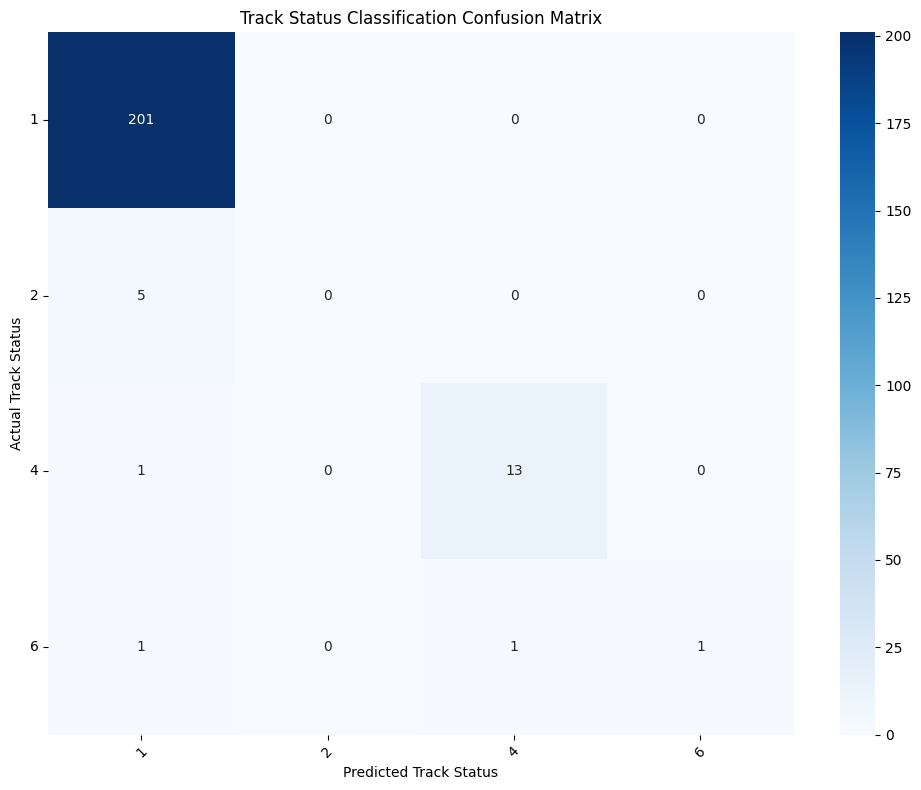


3. PER-TRACK STATUS PERFORMANCE
----------------------------------------
Track Status Performance (sorted by F1-score):
   precision  recall  f1-score  support
1     0.9663  1.0000    0.9829    201.0
4     0.9286  0.9286    0.9286     14.0
6     1.0000  0.3333    0.5000      3.0
2     0.0000  0.0000    0.0000      5.0

4. CLASS DISTRIBUTION ANALYSIS
----------------------------------------
Test set class distribution:
1              : 201 samples ( 90.1%)
2              :   5 samples (  2.2%)
4              :  14 samples (  6.3%)
6              :   3 samples (  1.3%)

5. ERROR ANALYSIS
----------------------------------------
Most confused track status pairs:
2 → 1: 5 errors
4 → 1: 1 errors
6 → 1: 1 errors
6 → 4: 1 errors

6. CROSS-VALIDATION PERFORMANCE
----------------------------------------
5-Fold CV Accuracy: 0.9615 ± 0.0046
CV Scores: [0.9598 0.9686 0.9596 0.9641 0.9552]

7. MODEL INSIGHTS
----------------------------------------
Model architecture details not accessible

8. TRA

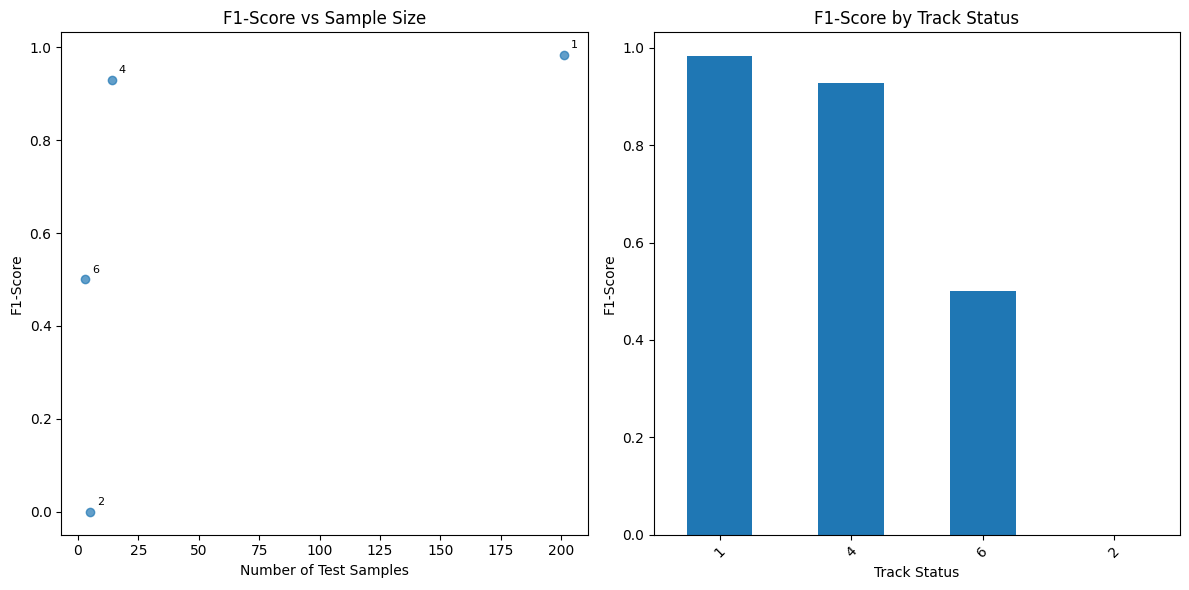


9. SUMMARY
----------------------------------------
✓ Overall Accuracy: 96.4%
✓ Macro F1-Score: 0.603
✓ Cross-validation: 0.961 ± 0.005
✓ Number of track statuses classified: 4
✓ Total test sequences: 223
✓ Filtered out rare classes: [np.str_('5'), np.str_('7')]
👍 Good performance!


{'accuracy': 0.9641255605381166,
 'f1_macro': 0.6028641285365002,
 'f1_weighted': 0.9509412654730449,
 'precision_macro': 0.7237293956043956,
 'recall_macro': 0.5654761904761905,
 'confusion_matrix': array([[201,   0,   0,   0],
        [  5,   0,   0,   0],
        [  1,   0,  13,   0],
        [  1,   0,   1,   1]]),
 'classification_report': {np.str_('1'): {'precision': 0.9663461538461539,
   'recall': 1.0,
   'f1-score': 0.9828850855745721,
   'support': 201.0},
  np.str_('2'): {'precision': 0.0,
   'recall': 0.0,
   'f1-score': 0.0,
   'support': 5.0},
  np.str_('4'): {'precision': 0.9285714285714286,
   'recall': 0.9285714285714286,
   'f1-score': 0.9285714285714286,
   'support': 14.0},
  np.str_('6'): {'precision': 1.0,
   'recall': 0.3333333333333333,
   'f1-score': 0.5,
   'support': 3.0},
  'accuracy': 0.9641255605381166,
  'macro avg': {'precision': 0.7237293956043956,
   'recall': 0.5654761904761905,
   'f1-score': 0.6028641285365002,
   'support': 223.0},
  'weighted avg'

In [19]:
# Run this after getting results from demonstrate_f1_aeon_preprocessing

evaluation_results = evaluate_f1_aeon_model(results)
evaluation_results

In [31]:
results['results']['X1'].shape

(1116, 7, 1392)

In [20]:
comparison_results = compare_preprocessing_methods(results)


PREPROCESSING METHOD COMPARISON

Evaluating: Variable Length + Normalization + Padding
------------------------------------------------------------


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [21]:
session2 = fastf1.get_session(2024, 'Saudi Arabian Grand Prix', 'R')
session2.load()

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
events      WARNING 	Correcting user input 'Saudi Arabian Grand Prix' to 'Austrian Grand Prix'
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           IN

In [27]:
# Process the F1 session data
preprocessor = F1DatasetPreprocessor(config) # use the same config
f1_data2 = preprocessor.process_dataset(session2)

results2 = demonstrate_f1_aeon_preprocessing(f1_data2)

print("F1 Aeon Preprocessing Pipeline Complete!")
print("Results stored in 'results2' variable.")

DEMONSTRATING F1 AEON PREPROCESSING PIPELINE

1. Variable length sequences with normalization:
--------------------------------------------------
Starting F1 to Aeon preprocessing...
Input data shape: (97638, 25)
Created 1353 sequences
Sequence length statistics: min=68, max=120, mean=72.2
Original data shape: List of 1353 sequences
Has missing values: False
Is equal length: False
Is univariate: False
Handling unequal length sequences using: pad
After length handling: (1353, 7, 120)
Applying scaling method: normalize
Final preprocessed data shape: (1353, 7, 120)
Sample mean after scaling: [[-8.88178420e-17  3.70074342e-17 -1.48029737e-17 -1.12872674e-16
  -1.12872674e-16 -1.12872674e-16  5.55111512e-18]
 [ 1.25825276e-16 -4.07081776e-17 -1.85037171e-17 -9.99200722e-17
   1.07321559e-16 -1.92438658e-16 -1.11022302e-17]
 [ 0.00000000e+00  4.07081776e-17 -5.18104078e-17 -4.07081776e-17
   1.07321559e-16 -1.59131967e-16 -1.11022302e-17]]
Sample std after scaling: [[1. 1. 1. 1. 1. 1. 1.]
 [

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, classification_report, 
    accuracy_score, f1_score, precision_score, recall_score
)

def evaluate_cross_race_performance(train_results, test_results, test_data_name="Test Race"):
    """
    Evaluate how a model trained on one race performs on another race.
    
    Parameters:
    -----------
    train_results : dict
        Results from the training race (e.g., São Paulo)
    test_results : dict  
        Results from the test race (e.g., Saudi Arabia)
    test_data_name : str
        Name of the test race for display purposes
    """
    
    print("="*80)
    print(f"CROSS-RACE EVALUATION: GENERALIZATION TO {test_data_name.upper()}")
    print("="*80)
    
    # Get the trained pipeline and preprocessor
    trained_pipeline = train_results['pipeline']
    train_preprocessor = train_results['preprocessor1']
    test_preprocessor = test_results['preprocessor1']
    
    # Get test data (using the same preprocessing as training)
    test_X = test_results['results']['X1']  # Use same preprocessing method as training
    test_y = test_results['results']['y1']
    
    # Get label mappings
    train_track_status_names = train_preprocessor.get_track_status_names()
    test_track_status_names = test_preprocessor.get_track_status_names()
    
    print(f"Training data track statuses: {train_track_status_names}")
    print(f"Test data track statuses: {test_track_status_names}")
    
    # Check if both datasets have compatible classes
    train_classes = set(train_track_status_names.values())
    test_classes = set(test_track_status_names.values())
    common_classes = train_classes.intersection(test_classes)
    
    print(f"\nCommon track statuses: {common_classes}")
    print(f"Training-only statuses: {train_classes - test_classes}")
    print(f"Test-only statuses: {test_classes - train_classes}")
    
    # Filter test data to only include classes the model was trained on
    # Map test labels to training label space
    test_to_train_mapping = {}
    for test_idx, test_status in test_track_status_names.items():
        for train_idx, train_status in train_track_status_names.items():
            if test_status == train_status:
                test_to_train_mapping[test_idx] = train_idx
                break
    
    print(f"\nLabel mapping (test -> train): {test_to_train_mapping}")
    
    # Filter test data to only include mappable classes
    valid_test_mask = np.isin(test_y, list(test_to_train_mapping.keys()))
    
    if np.sum(valid_test_mask) == 0:
        print("❌ No common classes found between training and test data!")
        return None
    
    test_X_filtered = test_X[valid_test_mask]
    test_y_filtered = test_y[valid_test_mask]
    
    # Map test labels to training label space
    test_y_mapped = np.array([test_to_train_mapping[y] for y in test_y_filtered])
    
    print(f"\nFiltered test data: {test_X_filtered.shape[0]} samples from {len(np.unique(test_y_mapped))} classes")
    
    # Make predictions
    try:
        predictions = trained_pipeline.predict(test_X_filtered)
        
        # Calculate metrics
        accuracy = accuracy_score(test_y_mapped, predictions)
        f1_macro = f1_score(test_y_mapped, predictions, average='macro')
        f1_weighted = f1_score(test_y_mapped, predictions, average='weighted')
        precision_macro = precision_score(test_y_mapped, predictions, average='macro')
        recall_macro = recall_score(test_y_mapped, predictions, average='macro')
        
        print(f"\n📊 CROSS-RACE PERFORMANCE METRICS")
        print("-" * 40)
        print(f"Accuracy:           {accuracy:.4f}")
        print(f"F1-Score (Macro):   {f1_macro:.4f}")
        print(f"F1-Score (Weighted): {f1_weighted:.4f}")
        print(f"Precision (Macro):  {precision_macro:.4f}")
        print(f"Recall (Macro):     {recall_macro:.4f}")
        
        # Confusion Matrix
        cm = confusion_matrix(test_y_mapped, predictions)
        actual_classes = np.unique(np.concatenate([test_y_mapped, predictions]))
        class_labels = [train_track_status_names[i] for i in actual_classes]
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_labels, yticklabels=class_labels)
        plt.title(f'Cross-Race Confusion Matrix\n(Trained on São Paulo, Tested on {test_data_name})')
        plt.xlabel('Predicted Track Status')
        plt.ylabel('Actual Track Status')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        
        # Per-class performance
        report = classification_report(test_y_mapped, predictions,
                                     labels=actual_classes,
                                     target_names=class_labels,
                                     output_dict=True, zero_division=0)
        
        df_report = pd.DataFrame(report).transpose()
        df_report = df_report.iloc[:-3]  # Remove avg/total rows
        df_report = df_report.round(4)
        
        print(f"\n📈 PER-CLASS PERFORMANCE ON {test_data_name.upper()}")
        print("-" * 50)
        print(df_report[['precision', 'recall', 'f1-score', 'support']])
        
        # Class distribution comparison
        print(f"\n📊 CLASS DISTRIBUTION IN {test_data_name.upper()}")
        print("-" * 40)
        
        test_dist = pd.Series(test_y_mapped).value_counts().sort_index()
        test_dist.index = [train_track_status_names[i] for i in test_dist.index]
        
        for status, count in test_dist.items():
            percentage = count / len(test_y_mapped) * 100
            print(f"{status:15s}: {count:3d} samples ({percentage:5.1f}%)")
        
        # Performance degradation analysis
        print(f"\n🔍 GENERALIZATION ANALYSIS")
        print("-" * 40)
        
        # Compare with training performance (if available)
        if 'train_accuracy' in train_results['results']:
            train_acc = train_results['results']['train_accuracy']
            test_acc_same_race = train_results['results']['test_accuracy']
            
            print(f"Original training accuracy:     {train_acc:.4f}")
            print(f"Original test accuracy (same race): {test_acc_same_race:.4f}")
            print(f"Cross-race test accuracy:       {accuracy:.4f}")
            
            degradation_vs_train = train_acc - accuracy
            degradation_vs_test = test_acc_same_race - accuracy
            
            print(f"\nPerformance degradation:")
            print(f"  vs. training data:  {degradation_vs_train:+.4f}")
            print(f"  vs. same-race test: {degradation_vs_test:+.4f}")
            
            if degradation_vs_test < 0.05:
                print("✅ Excellent generalization!")
            elif degradation_vs_test < 0.15:
                print("👍 Good generalization")
            elif degradation_vs_test < 0.30:
                print("⚠️ Moderate generalization - track-specific patterns detected")
            else:
                print("❌ Poor generalization - model may be overfitted to original track")
        
        # Error analysis
        errors = test_y_mapped != predictions
        if np.sum(errors) > 0:
            print(f"\n🔍 ERROR ANALYSIS")
            print("-" * 40)
            print(f"Total errors: {np.sum(errors)} out of {len(test_y_mapped)} ({100*np.sum(errors)/len(test_y_mapped):.1f}%)")
            
            # Most common errors
            error_pairs = []
            for i, (actual, pred) in enumerate(zip(test_y_mapped[errors], predictions[errors])):
                error_pairs.append((train_track_status_names[actual], train_track_status_names[pred]))
            
            error_counts = pd.Series(error_pairs).value_counts()
            print(f"\nMost common error types:")
            for (actual, pred), count in error_counts.head(5).items():
                print(f"  {actual} → {pred}: {count} errors")
        
        return {
            'accuracy': accuracy,
            'f1_macro': f1_macro,
            'f1_weighted': f1_weighted,
            'precision_macro': precision_macro,
            'recall_macro': recall_macro,
            'confusion_matrix': cm,
            'classification_report': report,
            'predictions': predictions,
            'actual': test_y_mapped,
            'class_labels': class_labels,
            'test_data_name': test_data_name
        }
        
    except Exception as e:
        print(f"❌ Error making predictions: {e}")
        print("This could be due to incompatible data shapes or preprocessing differences.")
        return None


def compare_multiple_races(train_results, race_results_dict):
    """
    Compare model performance across multiple races.
    
    Parameters:
    -----------
    train_results : dict
        Results from the training race
    race_results_dict : dict
        Dictionary mapping race names to their results
    """
    
    print("="*80)
    print("MULTI-RACE GENERALIZATION COMPARISON")
    print("="*80)
    
    comparison_data = []
    
    for race_name, race_results in race_results_dict.items():
        print(f"\nEvaluating on {race_name}...")
        cross_race_results = evaluate_cross_race_performance(
            train_results, race_results, race_name
        )
        
        if cross_race_results:
            comparison_data.append({
                'race': race_name,
                'accuracy': cross_race_results['accuracy'],
                'f1_macro': cross_race_results['f1_macro'],
                'f1_weighted': cross_race_results['f1_weighted'],
                'n_samples': len(cross_race_results['actual'])
            })
    
    if comparison_data:
        # Create comparison DataFrame
        df_comparison = pd.DataFrame(comparison_data)
        
        print(f"\n📊 SUMMARY COMPARISON")
        print("="*50)
        print(df_comparison.round(4))
        
        # Visualization
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        # Accuracy comparison
        axes[0].bar(df_comparison['race'], df_comparison['accuracy'])
        axes[0].set_title('Cross-Race Accuracy')
        axes[0].set_ylabel('Accuracy')
        axes[0].tick_params(axis='x', rotation=45)
        
        # F1-Score comparison
        axes[1].bar(df_comparison['race'], df_comparison['f1_macro'])
        axes[1].set_title('Cross-Race F1-Score (Macro)')
        axes[1].set_ylabel('F1-Score')
        axes[1].tick_params(axis='x', rotation=45)
        
        # Sample size
        axes[2].bar(df_comparison['race'], df_comparison['n_samples'])
        axes[2].set_title('Test Sample Size')
        axes[2].set_ylabel('Number of Samples')
        axes[2].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        # Best and worst performing tracks
        best_race = df_comparison.loc[df_comparison['accuracy'].idxmax()]
        worst_race = df_comparison.loc[df_comparison['accuracy'].idxmin()]
        
        print(f"\n🏆 Best generalization: {best_race['race']} (Accuracy: {best_race['accuracy']:.3f})")
        print(f"🔻 Worst generalization: {worst_race['race']} (Accuracy: {worst_race['accuracy']:.3f})")
        
        return df_comparison
    
    return None


In [29]:
cross_race_results = evaluate_cross_race_performance(
    train_results=results,
    test_results=results2, 
    test_data_name="Saudi Arabian Grand Prix"
)

CROSS-RACE EVALUATION: GENERALIZATION TO SAUDI ARABIAN GRAND PRIX
Training data track statuses: {0: np.str_('1'), 1: np.str_('2'), 2: np.str_('4'), 3: np.str_('5'), 4: np.str_('6'), 5: np.str_('7')}
Test data track statuses: {0: np.str_('1'), 1: np.str_('2'), 2: np.str_('6'), 3: np.str_('7')}

Common track statuses: {np.str_('1'), np.str_('6'), np.str_('2'), np.str_('7')}
Training-only statuses: {np.str_('4'), np.str_('5')}
Test-only statuses: set()

Label mapping (test -> train): {0: 0, 1: 1, 2: 4, 3: 5}

Filtered test data: 1353 samples from 4 classes
❌ Error making predictions: ('X has different length to the data seen in fit but this classifier cannot handle unequal length series.length of train set was 1392', ' length in predict is 120.')
This could be due to incompatible data shapes or preprocessing differences.


# Back to the drawing board with preprocessing

In [33]:
import numpy as np
import pandas as pd
from typing import Tuple, Dict, Any, Optional, List
import fastf1.core
from sklearn.preprocessing import LabelEncoder
from dataclasses import dataclass
from enum import Enum

class BalanceMethod(Enum):
    NONE = "none"
    REMOVE_INSUFFICIENT = "remove_insufficient"
    UNDERSAMPLE_TO_MIN = "undersample_to_min"
    UNDERSAMPLE_TO_TARGET = "undersample_to_target"

@dataclass
class UnifiedF1Config:
    """Unified configuration for F1 time series preprocessing"""
    
    # Temporal parameters
    interval_seconds: float = 1.0
    sequence_length: int = 100  # Fixed sequence length for consistency
    overlap_ratio: float = 0.5  # Overlap between sliding windows
    
    # Features
    include_track_status: bool = True
    include_event_info: bool = True
    
    # Balancing
    balance_method: BalanceMethod = BalanceMethod.REMOVE_INSUFFICIENT
    min_samples_per_class: int = 50  # Reduced for track status (fewer rare events)
    target_samples_per_class: Optional[int] = None
    
    # Target variable
    target_variable: str = "TrackStatus"  # or "Driver", "Compound", etc.


class UnifiedF1Preprocessor:
    """
    Unified preprocessor that goes directly from FastF1 sessions to 
    aeon-compatible time series format, eliminating redundancy.
    """
    
    def __init__(self, config: UnifiedF1Config = None):
        self.config = config or UnifiedF1Config()
        self.label_encoder = LabelEncoder()
        self.fitted = False
        
        # Time series features (telemetry)
        self.time_series_features = [
            'Speed', 'RPM', 'Throttle', 'TyreLife', 'AirTemp', 'TrackTemp', 'Humidity'
        ]
        
    def fit_transform(self, session: fastf1.core.Session) -> Tuple[np.ndarray, np.ndarray, List[Dict]]:
        """
        Transform FastF1 session directly to aeon-compatible time series format.
        
        Returns:
        --------
        X : np.ndarray
            Time series data (n_samples, n_channels, sequence_length)
        y : np.ndarray  
            Encoded target labels
        metadata : List[Dict]
            Metadata for each sequence
        """
        print(f"Processing session: {session.event.EventName}")
        
        # Step 1: Extract temporal data (similar to your F1DatasetPreprocessor)
        temporal_df = self._extract_temporal_data(session)
        
        if temporal_df.empty:
            return np.array([]), np.array([]), []
        
        print(f"Extracted {len(temporal_df)} temporal data points")
        
        # Step 2: Create fixed-length sliding window sequences
        X, y, metadata = self._create_sliding_window_sequences(temporal_df)
        
        print(f"Created {len(X)} sequences of length {self.config.sequence_length}")
        
        # Step 3: Balance classes if requested
        if self.config.balance_method != BalanceMethod.NONE:
            X, y, metadata = self._balance_sequences(X, y, metadata)
            print(f"After balancing: {len(X)} sequences")
        
        # Step 4: Encode labels
        y_encoded = self.label_encoder.fit_transform(y)
        
        # Step 5: Convert to aeon format (n_samples, n_channels, sequence_length)
        X_aeon = np.array(X)
        
        print(f"Final shape: {X_aeon.shape}")
        print(f"Classes: {dict(enumerate(self.label_encoder.classes_))}")
        
        self.fitted = True
        return X_aeon, y_encoded, metadata
    
    def transform(self, session: fastf1.core.Session) -> Tuple[np.ndarray, np.ndarray, List[Dict]]:
        """Transform new session using fitted parameters (for cross-race evaluation)"""
        if not self.fitted:
            raise ValueError("Must call fit_transform first")
            
        # Extract temporal data
        temporal_df = self._extract_temporal_data(session)
        
        if temporal_df.empty:
            return np.array([]), np.array([]), []
        
        # Create sequences (no balancing for new data)
        X, y, metadata = self._create_sliding_window_sequences(temporal_df)
        
        # Encode labels using fitted encoder
        # Filter to only include classes seen during training
        valid_mask = np.isin(y, self.label_encoder.classes_)
        if not np.any(valid_mask):
            print("Warning: No overlapping classes with training data")
            return np.array([]), np.array([]), []
            
        X = [X[i] for i in range(len(X)) if valid_mask[i]]
        y = [y[i] for i in range(len(y)) if valid_mask[i]]
        metadata = [metadata[i] for i in range(len(metadata)) if valid_mask[i]]
        
        y_encoded = self.label_encoder.transform(y)
        X_aeon = np.array(X)
        
        return X_aeon, y_encoded, metadata
    
    def _extract_temporal_data(self, session: fastf1.core.Session) -> pd.DataFrame:
        """Extract temporal data similar to F1DatasetPreprocessor but more efficiently"""
        
        all_records = []
        
        # Get session info once
        session_info = session.session_info
        event_info = {
            "session_name": session_info.get("Meeting", {}).get("Name", "Unknown"),
            "country": session_info.get("Meeting", {}).get("Country", {}).get("Name", "Unknown"),
            "session_type": session_info.get("Type", "Unknown"),
            "start_date": session_info.get("StartDate"),
            "location": session_info.get("Meeting", {}).get("Location", "Unknown"),
        } if self.config.include_event_info else {}
        
        # Get track status once
        track_status = None
        if self.config.include_track_status:
            track_status = session.track_status.copy()
            track_status["StatusTimeSeconds"] = track_status["Time"].dt.total_seconds()
            track_status = track_status.sort_values("StatusTimeSeconds")
        
        # Process each driver
        for driver in session.laps["Driver"].unique():
            driver_laps = session.laps[session.laps["Driver"] == driver]
            
            for _, lap in driver_laps.iterrows():
                try:
                    car_data = lap.get_car_data()
                    if car_data.empty:
                        continue
                        
                    weather_data = lap.get_weather_data()
                    
                    # Convert to seconds
                    car_data = car_data.copy()
                    car_data["SessionSeconds"] = car_data["SessionTime"].dt.total_seconds()
                    
                    # Create base record
                    base_record = {
                        "Driver": driver,
                        "LapNumber": lap["LapNumber"],
                        "Compound": lap["Compound"],
                        "TyreLife": lap["TyreLife"],
                        "AirTemp": weather_data.get("AirTemp", np.nan),
                        "TrackTemp": weather_data.get("TrackTemp", np.nan),
                        "Humidity": weather_data.get("Humidity", np.nan),
                        **event_info
                    }
                    
                    # Sample at fixed intervals
                    lap_start = lap["LapStartTime"].total_seconds()
                    lap_end = lap["Time"].total_seconds()
                    
                    time_points = np.arange(lap_start, lap_end, self.config.interval_seconds)
                    
                    for time_point in time_points:
                        record = base_record.copy()
                        record["SessionTimeSeconds"] = time_point
                        
                        # Find closest telemetry
                        time_diffs = np.abs(car_data["SessionSeconds"] - time_point)
                        if len(time_diffs) > 0:
                            closest_idx = time_diffs.idxmin()
                            closest_data = car_data.loc[closest_idx]
                            
                            record.update({
                                "Speed": closest_data.get("Speed", np.nan),
                                "RPM": closest_data.get("RPM", np.nan),
                                "Gear": closest_data.get("nGear", np.nan),
                                "Throttle": closest_data.get("Throttle", np.nan),
                                "Brake": closest_data.get("Brake", False),
                                "DRS": closest_data.get("DRS", 0),
                            })
                        
                        # Add track status
                        if track_status is not None:
                            valid_statuses = track_status[track_status["StatusTimeSeconds"] <= time_point]
                            if not valid_statuses.empty:
                                latest_status = valid_statuses.iloc[-1]
                                record["TrackStatus"] = str(latest_status["Status"])
                                record["SafetyCar"] = 1 if latest_status["Status"] == "4" else 0
                            else:
                                record["TrackStatus"] = "1"
                                record["SafetyCar"] = 0
                        
                        all_records.append(record)
                        
                except Exception as e:
                    print(f"Skipping lap {lap['LapNumber']} for {driver}: {e}")
                    continue
        
        return pd.DataFrame(all_records)
    
    def _create_sliding_window_sequences(self, df: pd.DataFrame) -> Tuple[List, List, List]:
        """Create fixed-length sliding window sequences"""
        
        sequences = []
        labels = []
        metadata = []
        
        # Sort by time
        df = df.sort_values("SessionTimeSeconds")
        
        # Calculate step size for sliding window
        step_size = int(self.config.sequence_length * (1 - self.config.overlap_ratio))
        
        # Create sequences using sliding window approach
        for i in range(0, len(df) - self.config.sequence_length + 1, step_size):
            window = df.iloc[i:i + self.config.sequence_length]
            
            # Extract time series features
            ts_data = window[self.time_series_features].values.T  # (n_channels, sequence_length)
            
            # Handle missing values (simple forward fill)
            ts_data = pd.DataFrame(ts_data.T).fillna(method='ffill').fillna(method='bfill').values.T
            
            # Get label (use most common value in window)
            label = window[self.config.target_variable].mode().iloc[0] if not window[self.config.target_variable].empty else "1"
            
            # Create metadata
            meta = {
                "start_time": window["SessionTimeSeconds"].iloc[0],
                "end_time": window["SessionTimeSeconds"].iloc[-1],
                "dominant_driver": window["Driver"].mode().iloc[0] if not window["Driver"].empty else "Unknown",
                "session_name": window["session_name"].iloc[0] if "session_name" in window.columns else "Unknown",
                "sequence_index": len(sequences)
            }
            
            sequences.append(ts_data)
            labels.append(label)
            metadata.append(meta)
        
        return sequences, labels, metadata
    
    def _balance_sequences(self, X: List, y: List, metadata: List) -> Tuple[List, List, List]:
        """Balance sequences based on target labels"""
        
        # Count classes
        unique_labels, counts = np.unique(y, return_counts=True)
        class_counts = dict(zip(unique_labels, counts))
        
        print(f"Class distribution before balancing: {class_counts}")
        
        if self.config.balance_method == BalanceMethod.REMOVE_INSUFFICIENT:
            # Keep only classes with sufficient samples
            valid_classes = [cls for cls, count in class_counts.items() 
                           if count >= self.config.min_samples_per_class]
            
            valid_indices = [i for i, label in enumerate(y) if label in valid_classes]
            
        elif self.config.balance_method == BalanceMethod.UNDERSAMPLE_TO_MIN:
            # Find minimum count among sufficient classes
            sufficient_classes = {cls: count for cls, count in class_counts.items() 
                                if count >= self.config.min_samples_per_class}
            
            if not sufficient_classes:
                return X, y, metadata
                
            min_count = min(sufficient_classes.values())
            valid_indices = []
            
            for cls in sufficient_classes.keys():
                cls_indices = [i for i, label in enumerate(y) if label == cls]
                sampled_indices = np.random.choice(cls_indices, min_count, replace=False)
                valid_indices.extend(sampled_indices)
                
        elif self.config.balance_method == BalanceMethod.UNDERSAMPLE_TO_TARGET:
            target = self.config.target_samples_per_class or 1000
            valid_indices = []
            
            for cls, count in class_counts.items():
                if count >= self.config.min_samples_per_class:
                    cls_indices = [i for i, label in enumerate(y) if label == cls]
                    sample_size = min(len(cls_indices), target)
                    sampled_indices = np.random.choice(cls_indices, sample_size, replace=False)
                    valid_indices.extend(sampled_indices)
        
        else:
            valid_indices = list(range(len(X)))
        
        # Apply filtering
        X_balanced = [X[i] for i in valid_indices]
        y_balanced = [y[i] for i in valid_indices]
        metadata_balanced = [metadata[i] for i in valid_indices]
        
        # Print final distribution
        final_counts = dict(zip(*np.unique(y_balanced, return_counts=True)))
        print(f"Class distribution after balancing: {final_counts}")
        
        return X_balanced, y_balanced, metadata_balanced
    
    def get_label_mapping(self) -> Dict[int, str]:
        """Get mapping from encoded labels to original labels"""
        if not self.fitted:
            return {}
        return dict(enumerate(self.label_encoder.classes_))


def create_production_pipeline(sequence_length: int = 100, 
                             target_variable: str = "TrackStatus") -> UnifiedF1Preprocessor:
    """Create a production-ready preprocessing pipeline"""
    
    config = UnifiedF1Config(
        sequence_length=sequence_length,
        interval_seconds=1.0,
        overlap_ratio=0.5,
        target_variable=target_variable,
        balance_method=BalanceMethod.REMOVE_INSUFFICIENT,
        min_samples_per_class=20,  # Lower for track status
        include_track_status=True,
        include_event_info=True
    )
    
    return UnifiedF1Preprocessor(config)


# Usage example
if __name__ == "__main__":
    print("Unified F1 Preprocessor ready!")
    print("\nUsage:")
    print("preprocessor = create_production_pipeline()")
    print("X, y, metadata = preprocessor.fit_transform(session1)")
    print("X_new, y_new, metadata_new = preprocessor.transform(session2)  # Cross-race")

Unified F1 Preprocessor ready!

Usage:
preprocessor = create_production_pipeline()
X, y, metadata = preprocessor.fit_transform(session1)
X_new, y_new, metadata_new = preprocessor.transform(session2)  # Cross-race


In [37]:
config = UnifiedF1Config(
    sequence_length=100,
    interval_seconds=1.0,
    overlap_ratio=0.5,
    target_variable="TrackStatus",
    balance_method=BalanceMethod.REMOVE_INSUFFICIENT,
    min_samples_per_class=20,  # Lower for track status
    include_track_status=True,
    include_event_info=True
)
preprocessor = UnifiedF1Preprocessor(config)    
X_train, y_train, metadata_train = preprocessor.fit_transform(session)

Processing session: São Paulo Grand Prix
Extracted 105544 temporal data points
Created 2109 sequences of length 100
Class distribution before balancing: {np.str_('1'): np.int64(1753), np.str_('2'): np.int64(50), np.str_('4'): np.int64(208), np.str_('5'): np.int64(61), np.str_('6'): np.int64(32), np.str_('7'): np.int64(5)}
Class distribution after balancing: {np.str_('1'): np.int64(1753), np.str_('2'): np.int64(50), np.str_('4'): np.int64(208), np.str_('5'): np.int64(61), np.str_('6'): np.int64(32)}
After balancing: 2104 sequences
Final shape: (2104, 7, 100)
Classes: {0: np.str_('1'), 1: np.str_('2'), 2: np.str_('4'), 3: np.str_('5'), 4: np.str_('6')}


In [35]:
X_test, y_test, meta_test = preprocessor.transform(session2)

In [38]:
print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

Train shape: (2104, 7, 100)
Test shape: (2036, 7, 100)


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, classification_report
)
import warnings
warnings.filterwarnings('ignore')

# Aeon imports
from aeon.classification.convolution_based import RocketClassifier
from aeon.transformations.collection import Normalizer
from aeon.pipeline import make_pipeline


def train_rocket_classifier(X, y, preprocessor, test_size=0.2, random_state=42, 
                          n_kernels=1000, cv_folds=5):
    """
    Complete training pipeline for ROCKET classifier with proper evaluation.
    
    Parameters:
    -----------
    X : np.ndarray
        Time series data (n_samples, n_channels, sequence_length)
    y : np.ndarray
        Encoded target labels
    preprocessor : UnifiedF1Preprocessor
        Fitted preprocessor for label mapping
    test_size : float
        Proportion of data for testing
    random_state : int
        Random seed for reproducibility
    n_kernels : int
        Number of ROCKET kernels
    cv_folds : int
        Number of cross-validation folds
        
    Returns:
    --------
    results : dict
        Complete training results and trained model
    """
    
    print("="*80)
    print("ROCKET CLASSIFIER TRAINING PIPELINE")
    print("="*80)
    
    # Get label mapping for interpretability
    label_mapping = preprocessor.get_label_mapping()
    print(f"Target classes: {label_mapping}")
    
    # Check class distribution
    unique, counts = np.unique(y, return_counts=True)
    class_dist = dict(zip(unique, counts))
    print(f"\nClass distribution:")
    for class_idx, count in class_dist.items():
        class_name = label_mapping.get(class_idx, f"Class_{class_idx}")
        percentage = count / len(y) * 100
        print(f"  {class_name:15s}: {count:4d} samples ({percentage:5.1f}%)")
    
    # Check for classes with too few samples for stratified splitting
    min_samples_needed = max(2, int(test_size * len(y) / len(unique)) + 1)
    rare_classes = [cls for cls, count in class_dist.items() if count < min_samples_needed]
    
    if rare_classes:
        print(f"\nWarning: Classes with insufficient samples for stratified split: {rare_classes}")
        print("Filtering out rare classes...")
        
        valid_mask = ~np.isin(y, rare_classes)
        X_filtered = X[valid_mask]
        y_filtered = y[valid_mask]
        
        print(f"Filtered dataset: {len(X_filtered)} samples (removed {len(X) - len(X_filtered)})")
    else:
        X_filtered, y_filtered = X, y
    
    # Train-test split with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X_filtered, y_filtered, 
        test_size=test_size, 
        random_state=random_state, 
        stratify=y_filtered
    )
    
    print(f"\nData splits:")
    print(f"  Training set: {X_train.shape}")
    print(f"  Test set:     {X_test.shape}")
    
    # Create ROCKET pipeline
    print(f"\nCreating ROCKET pipeline with {n_kernels} kernels...")
    pipeline = make_pipeline([
        Normalizer(),  # Normalize sequences
        RocketClassifier(n_kernels=n_kernels, random_state=random_state)
    ])
    
    # Train the model
    print("Training ROCKET classifier...")
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    print("Making predictions...")
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    test_f1_macro = f1_score(y_test, y_test_pred, average='macro')
    test_f1_weighted = f1_score(y_test, y_test_pred, average='weighted')
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    
    print(f"\n📊 PERFORMANCE METRICS")
    print("-" * 40)
    print(f"Training Accuracy:    {train_accuracy:.4f}")
    print(f"Test Accuracy:        {test_accuracy:.4f}")
    print(f"Test F1 (Macro):      {test_f1_macro:.4f}")
    print(f"Test F1 (Weighted):   {test_f1_weighted:.4f}")
    print(f"Test Precision:       {test_precision:.4f}")
    print(f"Test Recall:          {test_recall:.4f}")
    
    # Cross-validation
    print(f"\n🔄 {cv_folds}-FOLD CROSS-VALIDATION")
    print("-" * 40)
    
    cv_scores = cross_val_score(
        pipeline, X_filtered, y_filtered, 
        cv=StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=random_state),
        scoring='accuracy'
    )
    
    print(f"CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    print(f"CV Scores: {cv_scores.round(4)}")
    
    # Detailed evaluation
    results = evaluate_detailed_performance(
        y_test, y_test_pred, label_mapping, 
        title="ROCKET Test Set Performance"
    )
    
    # Package results
    results.update({
        'pipeline': pipeline,
        'preprocessor': preprocessor,
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'y_train_pred': y_train_pred,
        'y_test_pred': y_test_pred,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'test_f1_macro': test_f1_macro,
        'cv_scores': cv_scores,
        'label_mapping': label_mapping,
        'config': {
            'n_kernels': n_kernels,
            'test_size': test_size,
            'random_state': random_state
        }
    })
    
    return results


def evaluate_detailed_performance(y_true, y_pred, label_mapping, title="Performance Evaluation"):
    """
    Detailed performance evaluation with visualizations.
    """
    
    print(f"\n📈 {title.upper()}")
    print("=" * len(title) + "==")
    
    # Get class labels for display
    unique_classes = np.unique(np.concatenate([y_true, y_pred]))
    class_labels = [label_mapping.get(cls, f"Class_{cls}") for cls in unique_classes]
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred, labels=unique_classes)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'{title} - Confusion Matrix')
    plt.xlabel('Predicted Track Status')
    plt.ylabel('Actual Track Status')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Per-class metrics
    report = classification_report(
        y_true, y_pred, 
        labels=unique_classes,
        target_names=class_labels,
        output_dict=True,
        zero_division=0
    )
    
    df_report = pd.DataFrame(report).transpose()
    df_report = df_report.iloc[:-3]  # Remove avg/total rows
    df_report = df_report.round(4)
    
    print("\nPer-Class Performance:")
    print(df_report[['precision', 'recall', 'f1-score', 'support']])
    
    # Class distribution in test set
    print(f"\nTest Set Class Distribution:")
    test_dist = pd.Series(y_true).value_counts().sort_index()
    for class_idx, count in test_dist.items():
        class_name = label_mapping.get(class_idx, f"Class_{class_idx}")
        percentage = count / len(y_true) * 100
        print(f"  {class_name:15s}: {count:3d} samples ({percentage:5.1f}%)")
    
    # Error analysis
    errors = y_true != y_pred
    if np.sum(errors) > 0:
        print(f"\n🔍 ERROR ANALYSIS")
        print("-" * 20)
        print(f"Total errors: {np.sum(errors)} out of {len(y_true)} ({100*np.sum(errors)/len(y_true):.1f}%)")
        
        # Most common errors
        error_pairs = [(label_mapping.get(actual, f"Class_{actual}"), 
                       label_mapping.get(pred, f"Class_{pred}"))
                      for actual, pred in zip(y_true[errors], y_pred[errors])]
        
        error_counts = pd.Series(error_pairs).value_counts()
        print(f"\nMost common error types:")
        for (actual, pred), count in error_counts.head(5).items():
            print(f"  {actual} → {pred}: {count} errors")
    
    # Performance visualization
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    metrics = ['Precision', 'Recall', 'F1-Score']
    values = [df_report['precision'].mean(), df_report['recall'].mean(), df_report['f1-score'].mean()]
    plt.bar(metrics, values, alpha=0.7)
    plt.title('Average Performance Metrics')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    for i, v in enumerate(values):
        plt.text(i, v + 0.01, f'{v:.3f}', ha='center')
    
    plt.subplot(1, 2, 2)
    df_report['f1-score'].plot(kind='bar')
    plt.title('F1-Score by Track Status')
    plt.xlabel('Track Status')
    plt.ylabel('F1-Score')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'confusion_matrix': cm,
        'classification_report': report,
        'per_class_performance': df_report,
        'class_labels': class_labels
    }


def cross_race_evaluation(train_results, test_session, test_session_name="Test Race"):
    """
    Evaluate trained model on a different race.
    
    Parameters:
    -----------
    train_results : dict
        Results from train_rocket_classifier()
    test_session : fastf1.core.Session
        New session to evaluate on
    test_session_name : str
        Name for display purposes
    """
    
    print(f"\n🏁 CROSS-RACE EVALUATION: {test_session_name.upper()}")
    print("=" * (25 + len(test_session_name)))
    
    # Get trained components
    pipeline = train_results['pipeline']
    preprocessor = train_results['preprocessor']
    label_mapping = train_results['label_mapping']
    
    # Process new session
    print(f"Processing {test_session_name} data...")
    X_new, y_new, metadata_new = preprocessor.transform(test_session)
    
    if len(X_new) == 0:
        print("❌ No compatible data found in test session!")
        return None
    
    print(f"Test data shape: {X_new.shape}")
    
    # Make predictions
    y_pred_new = pipeline.predict(X_new)
    
    # Calculate metrics
    accuracy = accuracy_score(y_new, y_pred_new)
    f1_macro = f1_score(y_new, y_pred_new, average='macro')
    
    print(f"\n📊 CROSS-RACE PERFORMANCE")
    print("-" * 30)
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"F1-Score:      {f1_macro:.4f}")
    
    # Compare with original performance
    original_accuracy = train_results['test_accuracy']
    original_f1 = train_results['test_f1_macro']
    
    print(f"\n📈 GENERALIZATION ANALYSIS")
    print("-" * 30)
    print(f"Original test accuracy: {original_accuracy:.4f}")
    print(f"Cross-race accuracy:    {accuracy:.4f}")
    print(f"Performance change:     {accuracy - original_accuracy:+.4f}")
    
    degradation = original_accuracy - accuracy
    if degradation < 0.05:
        print("✅ Excellent generalization!")
    elif degradation < 0.15:
        print("👍 Good generalization")
    elif degradation < 0.30:
        print("⚠️ Moderate generalization - some track-specific patterns")
    else:
        print("❌ Poor generalization - model may be overfitted")
    
    # Detailed evaluation
    cross_race_results = evaluate_detailed_performance(
        y_new, y_pred_new, label_mapping,
        title=f"{test_session_name} Cross-Race Performance"
    )
    
    return {
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'predictions': y_pred_new,
        'actual': y_new,
        'metadata': metadata_new,
        'performance_change': accuracy - original_accuracy,
        'test_session_name': test_session_name,
        **cross_race_results
    }


# Complete workflow example
def complete_rocket_workflow(train_session, test_session=None, 
                           train_name="Training Race", test_name="Test Race"):
    """
    Complete ROCKET workflow from data preprocessing to cross-race evaluation.
    """
    
    print("🚀 COMPLETE ROCKET WORKFLOW")
    print("=" * 50)
    
    # Step 1: Create preprocessor and process training data
    print(f"\n1️⃣ Processing {train_name} data...")
    preprocessor = create_production_pipeline(sequence_length=100, target_variable="TrackStatus")
    X_train, y_train, metadata_train = preprocessor.fit_transform(train_session)
    
    # Step 2: Train ROCKET classifier
    print(f"\n2️⃣ Training ROCKET classifier...")
    train_results = train_rocket_classifier(X_train, y_train, preprocessor)
    
    # Step 3: Cross-race evaluation (if test session provided)
    cross_race_results = None
    if test_session is not None:
        print(f"\n3️⃣ Cross-race evaluation...")
        cross_race_results = cross_race_evaluation(train_results, test_session, test_name)
    
    return {
        'train_results': train_results,
        'cross_race_results': cross_race_results,
        'preprocessor': preprocessor
    }


# Usage example
if __name__ == "__main__":
    print("ROCKET Training Pipeline Ready! 🚀")
    print("\nUsage:")
    print("# Single race training")
    print("results = complete_rocket_workflow(session_sao_paulo)")
    print("\n# Cross-race evaluation")
    print("results = complete_rocket_workflow(session_sao_paulo, session_saudi, 'São Paulo', 'Saudi Arabia')")

ROCKET Training Pipeline Ready! 🚀

Usage:
# Single race training
results = complete_rocket_workflow(session_sao_paulo)

# Cross-race evaluation
results = complete_rocket_workflow(session_sao_paulo, session_saudi, 'São Paulo', 'Saudi Arabia')


🚀 COMPLETE ROCKET WORKFLOW

1️⃣ Processing Training Race data...
Processing session: São Paulo Grand Prix
Extracted 105544 temporal data points
Created 2109 sequences of length 100
Class distribution before balancing: {np.str_('1'): np.int64(1753), np.str_('2'): np.int64(50), np.str_('4'): np.int64(208), np.str_('5'): np.int64(61), np.str_('6'): np.int64(32), np.str_('7'): np.int64(5)}
Class distribution after balancing: {np.str_('1'): np.int64(1753), np.str_('2'): np.int64(50), np.str_('4'): np.int64(208), np.str_('5'): np.int64(61), np.str_('6'): np.int64(32)}
After balancing: 2104 sequences
Final shape: (2104, 7, 100)
Classes: {0: np.str_('1'), 1: np.str_('2'), 2: np.str_('4'), 3: np.str_('5'), 4: np.str_('6')}

2️⃣ Training ROCKET classifier...
ROCKET CLASSIFIER TRAINING PIPELINE
Target classes: {0: np.str_('1'), 1: np.str_('2'), 2: np.str_('4'), 3: np.str_('5'), 4: np.str_('6')}

Class distribution:
  1              : 1753 samples ( 83.3%)
  2              :   50 samples (  2.4%)


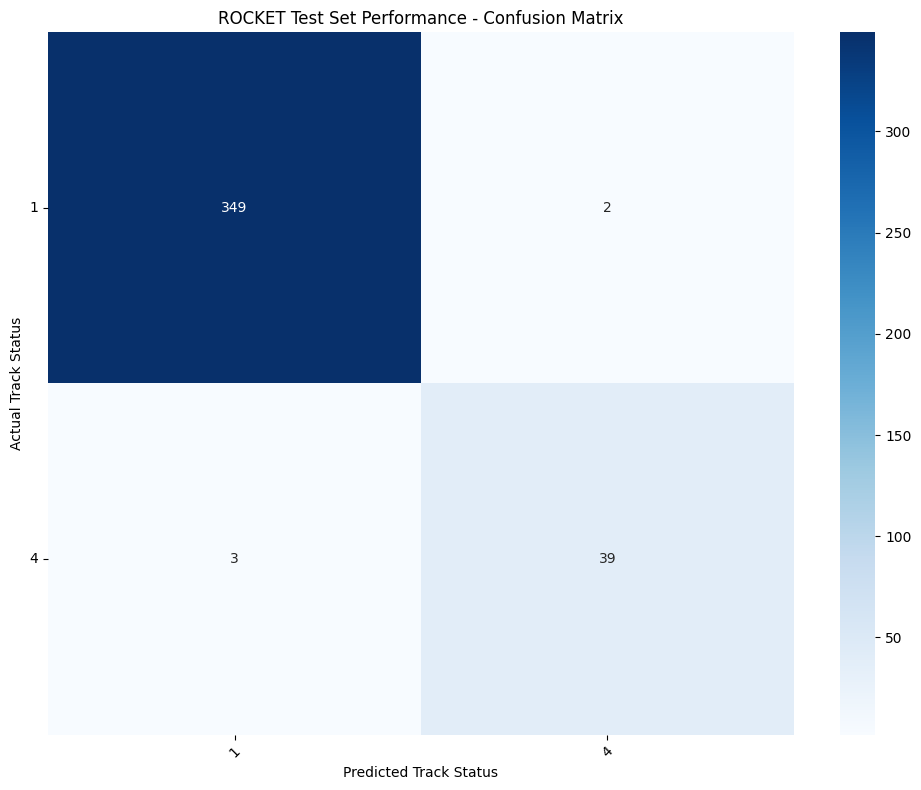


Per-Class Performance:
   precision  recall  f1-score  support
1     0.9915  0.9943    0.9929    351.0
4     0.9512  0.9286    0.9398     42.0

Test Set Class Distribution:
  1              : 351 samples ( 89.3%)
  4              :  42 samples ( 10.7%)

🔍 ERROR ANALYSIS
--------------------
Total errors: 5 out of 393 (1.3%)

Most common error types:
  4 → 1: 3 errors
  1 → 4: 2 errors


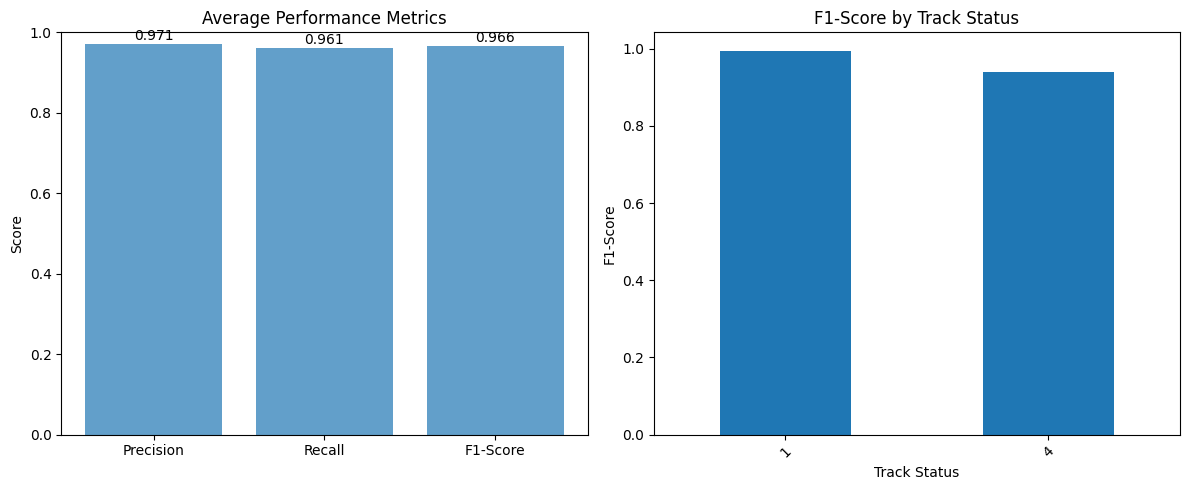

In [40]:
results = complete_rocket_workflow(session)

🚀 COMPLETE ROCKET WORKFLOW

1️⃣ Processing São Paulo data...
Processing session: São Paulo Grand Prix
Extracted 105544 temporal data points
Created 2109 sequences of length 100
Class distribution before balancing: {np.str_('1'): np.int64(1753), np.str_('2'): np.int64(50), np.str_('4'): np.int64(208), np.str_('5'): np.int64(61), np.str_('6'): np.int64(32), np.str_('7'): np.int64(5)}
Class distribution after balancing: {np.str_('1'): np.int64(1753), np.str_('2'): np.int64(50), np.str_('4'): np.int64(208), np.str_('5'): np.int64(61), np.str_('6'): np.int64(32)}
After balancing: 2104 sequences
Final shape: (2104, 7, 100)
Classes: {0: np.str_('1'), 1: np.str_('2'), 2: np.str_('4'), 3: np.str_('5'), 4: np.str_('6')}

2️⃣ Training ROCKET classifier...
ROCKET CLASSIFIER TRAINING PIPELINE
Target classes: {0: np.str_('1'), 1: np.str_('2'), 2: np.str_('4'), 3: np.str_('5'), 4: np.str_('6')}

Class distribution:
  1              : 1753 samples ( 83.3%)
  2              :   50 samples (  2.4%)
  4 

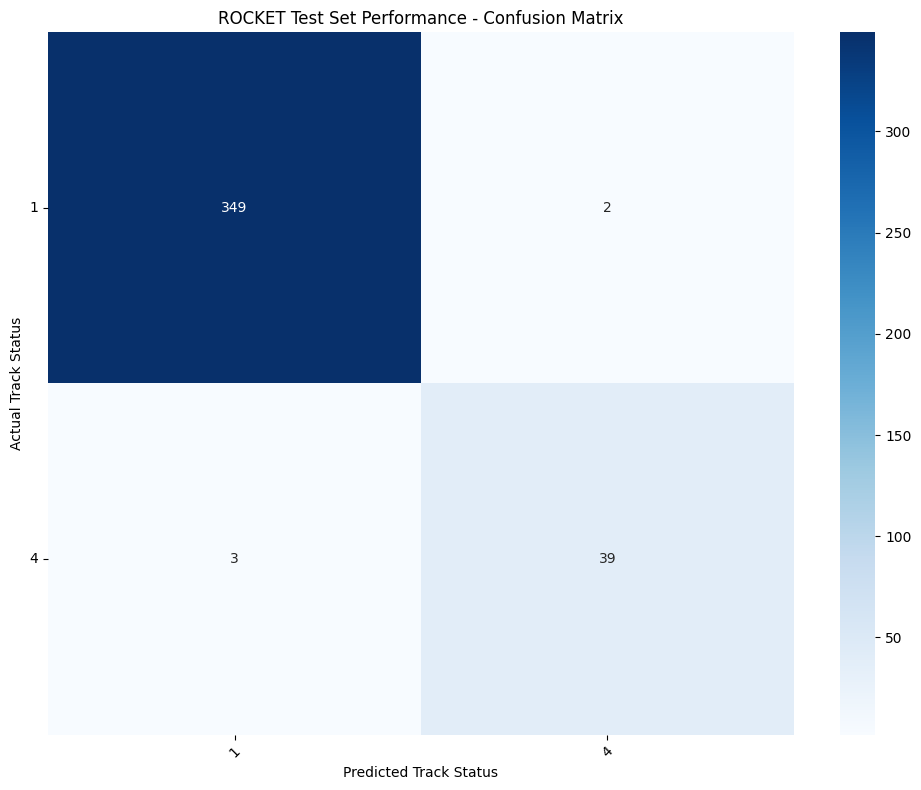


Per-Class Performance:
   precision  recall  f1-score  support
1     0.9915  0.9943    0.9929    351.0
4     0.9512  0.9286    0.9398     42.0

Test Set Class Distribution:
  1              : 351 samples ( 89.3%)
  4              :  42 samples ( 10.7%)

🔍 ERROR ANALYSIS
--------------------
Total errors: 5 out of 393 (1.3%)

Most common error types:
  4 → 1: 3 errors
  1 → 4: 2 errors


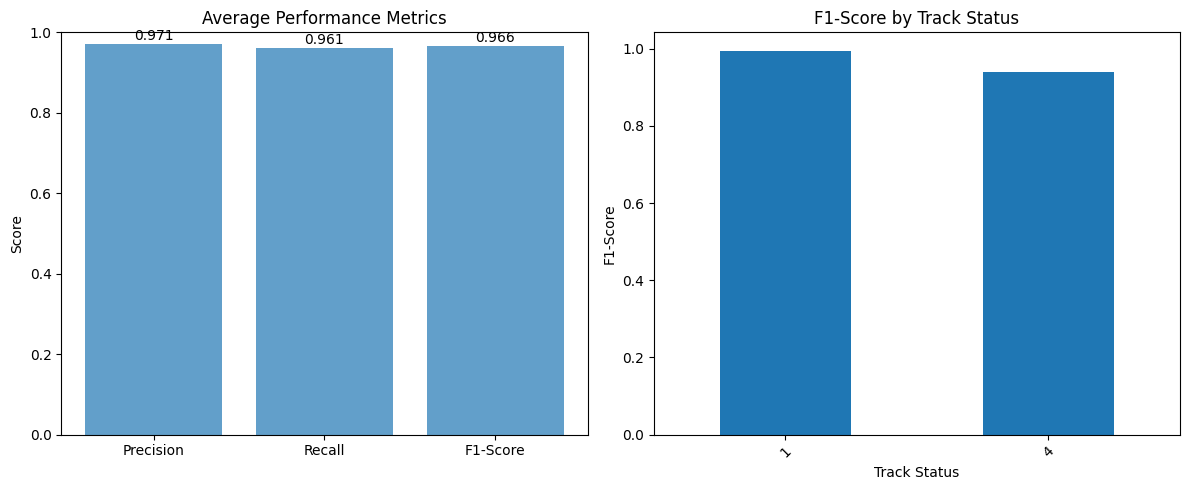


3️⃣ Cross-race evaluation...

🏁 CROSS-RACE EVALUATION: SAUDI ARABIA
Processing Saudi Arabia data...
Test data shape: (2036, 7, 100)

📊 CROSS-RACE PERFORMANCE
------------------------------
Test Accuracy: 0.9268
F1-Score:      0.2405

📈 GENERALIZATION ANALYSIS
------------------------------
Original test accuracy: 0.9873
Cross-race accuracy:    0.9268
Performance change:     -0.0605
👍 Good generalization

📈 SAUDI ARABIA CROSS-RACE PERFORMANCE


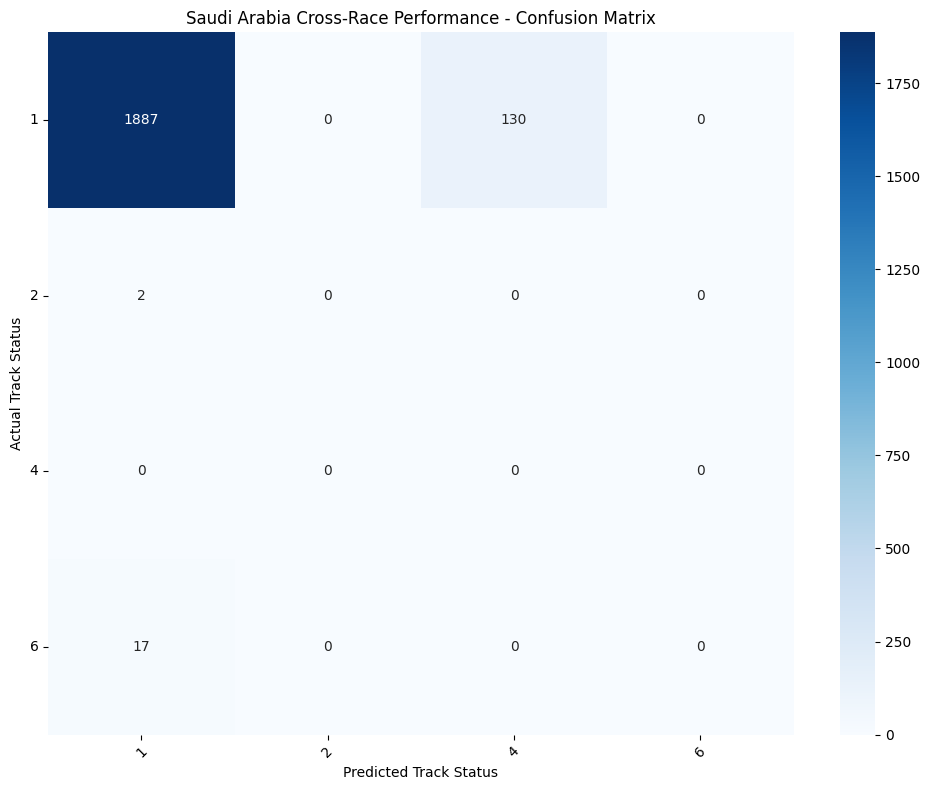


Per-Class Performance:
   precision  recall  f1-score  support
1       0.99  0.9355     0.962   2017.0
2       0.00  0.0000     0.000      2.0
4       0.00  0.0000     0.000      0.0
6       0.00  0.0000     0.000     17.0

Test Set Class Distribution:
  1              : 2017 samples ( 99.1%)
  2              :   2 samples (  0.1%)
  6              :  17 samples (  0.8%)

🔍 ERROR ANALYSIS
--------------------
Total errors: 149 out of 2036 (7.3%)

Most common error types:
  1 → 4: 130 errors
  6 → 1: 17 errors
  2 → 1: 2 errors


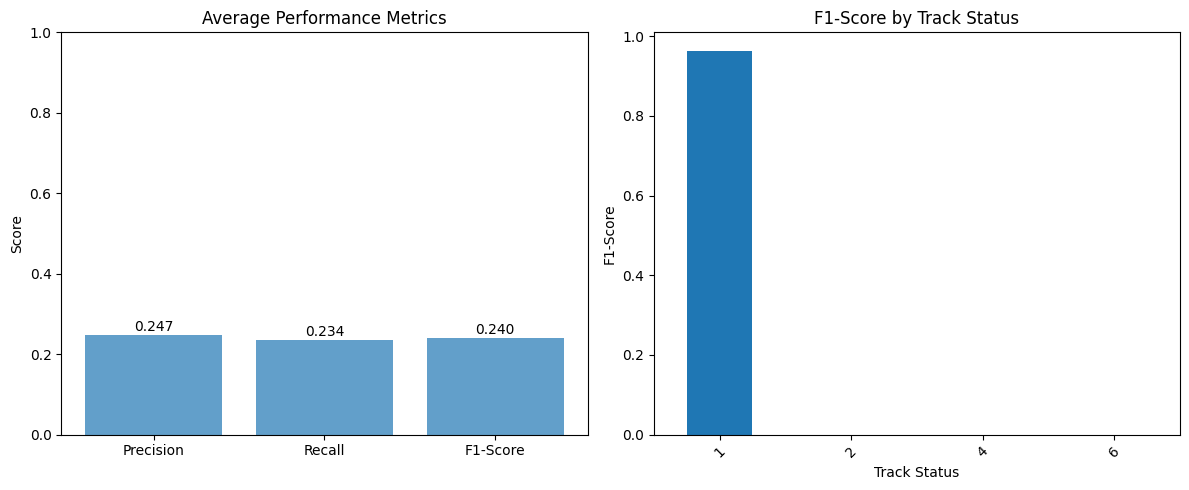

In [41]:
results = complete_rocket_workflow(session, session2, 'São Paulo', 'Saudi Arabia')

In [46]:
import fastf1
import pandas as pd
import numpy as np
from concurrent.futures import ThreadPoolExecutor, as_completed
from typing import List, Dict, Any, Optional, Tuple
from dataclasses import dataclass
import logging
from tqdm import tqdm
import time
import warnings
warnings.filterwarnings('ignore')

@dataclass
class SeasonAggregatorConfig:
    """Configuration for the unified season aggregator"""
    
    # Processing
    max_workers: int = 4
    session_types: List[str] = None  # ['R', 'Q', 'FP1', etc.]
    skip_testing: bool = True
    retry_attempts: int = 2
    timeout_seconds: int = 300
    
    # Preprocessing (passed to UnifiedF1Config)
    sequence_length: int = 100
    target_variable: str = "TrackStatus"
    interval_seconds: float = 1.0
    overlap_ratio: float = 0.5
    min_samples_per_class: int = 20
    
    def __post_init__(self):
        if self.session_types is None:
            self.session_types = ['R']  # Race only by default


class UnifiedSeasonAggregator:
    """
    Unified aggregator that processes multiple F1 sessions directly into 
    aeon-compatible time series format for season-wide training.
    """
    
    def __init__(self, config: SeasonAggregatorConfig = None):
        self.config = config or SeasonAggregatorConfig()
        
        # Create unified preprocessor config
        self.preprocessor_config = UnifiedF1Config(
            sequence_length=self.config.sequence_length,
            target_variable=self.config.target_variable,
            interval_seconds=self.config.interval_seconds,
            overlap_ratio=self.config.overlap_ratio,
            min_samples_per_class=self.config.min_samples_per_class,
            include_track_status=True,
            include_event_info=True
        )
        
        # Storage for processed data
        self.sequences_list: List[np.ndarray] = []
        self.labels_list: List[str] = []
        self.metadata_list: List[Dict] = []
        self.session_metadata: List[Dict[str, Any]] = []
        self.failed_sessions: List[Dict[str, Any]] = []
        
        # Will be fitted on first session
        self.preprocessor: Optional[UnifiedF1Preprocessor] = None
        self.is_fitted = False
        
        # Setup logging
        logging.basicConfig(level=logging.INFO)
        self.logger = logging.getLogger(__name__)
    
    def add_session(self, session: fastf1.core.Session, session_name: str = None) -> Dict[str, Any]:
        """
        Add a single session to the aggregator.
        
        Parameters:
        -----------
        session : fastf1.core.Session
            FastF1 session object
        session_name : str, optional
            Custom name for the session
            
        Returns:
        --------
        dict : Session processing summary
        """
        session_name = session_name or f"{session.event.EventName} - {session.session_info.get('Type', 'Unknown')}"
        
        try:
            if not self.is_fitted:
                # First session: fit preprocessor
                self.preprocessor = UnifiedF1Preprocessor(self.preprocessor_config)
                X, y, metadata = self.preprocessor.fit_transform(session)
                self.is_fitted = True
                self.logger.info(f"Fitted preprocessor on: {session_name}")
            else:
                # Subsequent sessions: transform only
                X, y, metadata = self.preprocessor.transform(session)
            
            if len(X) == 0:
                raise ValueError("No compatible sequences generated")
            
            # Store sequences individually (will combine later)
            for i in range(len(X)):
                self.sequences_list.append(X[i])
                self.labels_list.append(y[i])
                
                # Enhance metadata with session info
                enhanced_meta = metadata[i].copy()
                enhanced_meta.update({
                    'session_name': session_name,
                    'event_name': session.event.EventName,
                    'country': session.event.Country,
                    'location': session.event.Location,
                    'session_type': session.session_info.get('Type', 'Unknown'),
                    'year': session.event.year,
                    'round_number': session.event.RoundNumber
                })
                self.metadata_list.append(enhanced_meta)
            
            # Session-level metadata
            session_meta = {
                'session_name': session_name,
                'event_name': session.event.EventName,
                'country': session.event.Country,
                'location': session.event.Location,
                'session_type': session.session_info.get('Type', 'Unknown'),
                'year': session.event.year,
                'round_number': session.event.RoundNumber,
                'sequences_added': len(X),
                'unique_labels': len(np.unique(y)),
                'processed_at': pd.Timestamp.now()
            }
            self.session_metadata.append(session_meta)
            
            self.logger.info(f"Added {len(X)} sequences from {session_name}")
            
            return {
                'session_name': session_name,
                'sequences_added': len(X),
                'success': True,
                'error': None
            }
            
        except Exception as e:
            error_msg = str(e)
            self.logger.error(f"Failed to process {session_name}: {error_msg}")
            
            failure = {
                'session_name': session_name,
                'event_name': getattr(session.event, 'EventName', 'Unknown'),
                'session_type': session.session_info.get('Type', 'Unknown'),
                'year': getattr(session.event, 'year', 'Unknown'),
                'error': error_msg,
                'failed_at': pd.Timestamp.now()
            }
            self.failed_sessions.append(failure)
            
            return {
                'session_name': session_name,
                'sequences_added': 0,
                'success': False,
                'error': error_msg
            }
    
    def add_season(self, year: int, session_types: List[str] = None) -> Dict[str, Any]:
        """
        Add all sessions from a season using parallel processing.
        
        Parameters:
        -----------
        year : int
            Season year
        session_types : List[str], optional
            Session types to include (overrides config)
            
        Returns:
        --------
        dict : Season processing summary
        """
        session_types = session_types or self.config.session_types
        
        try:
            schedule = fastf1.get_event_schedule(year)
            if self.config.skip_testing:
                schedule = schedule[schedule['EventFormat'] != 'testing']
        except Exception as e:
            self.logger.error(f"Failed to get schedule for {year}: {e}")
            return self._create_season_summary(year, 0, 0, 0)
        
        # Create list of sessions to process
        sessions_to_load = []
        for _, event in schedule.iterrows():
            for session_type in session_types:
                sessions_to_load.append({
                    'year': year,
                    'event_name': event['EventName'],
                    'session_type': session_type,
                    'country': event['Country'],
                    'round_number': event['RoundNumber']
                })
        
        self.logger.info(f"Processing {len(sessions_to_load)} sessions from {year} season...")
        
        # Process sessions in parallel
        successful_count = 0
        failed_count = 0
        total_sequences = 0
        
        with ThreadPoolExecutor(max_workers=self.config.max_workers) as executor:
            # Submit all tasks
            future_to_session = {
                executor.submit(self._load_and_process_session, session_info): session_info
                for session_info in sessions_to_load
            }
            
            # Process completed tasks with progress bar
            with tqdm(total=len(sessions_to_load), desc=f"Processing {year} season") as pbar:
                for future in as_completed(future_to_session):
                    session_info = future_to_session[future]
                    
                    try:
                        result = future.result()
                        if result['success']:
                            successful_count += 1
                            total_sequences += result['sequences_added']
                        else:
                            failed_count += 1
                            
                    except Exception as e:
                        self.logger.error(f"Future failed for {session_info['event_name']}: {e}")
                        failed_count += 1
                    
                    pbar.update(1)
        
        summary = self._create_season_summary(year, len(sessions_to_load), successful_count, failed_count)
        summary['total_sequences_added'] = total_sequences
        
        return summary
    
    def _load_and_process_session(self, session_info: Dict) -> Dict[str, Any]:
        """Load and process a single session (for parallel execution)"""
        try:
            session = fastf1.get_session(
                session_info['year'], 
                session_info['event_name'], 
                session_info['session_type']
            )
            session.load()
            
            session_name = f"{session_info['event_name']} - {session_info['session_type']}"
            return self.add_session(session, session_name)
            
        except Exception as e:
            return {
                'session_name': f"{session_info['event_name']} - {session_info['session_type']}",
                'sequences_added': 0,
                'success': False,
                'error': str(e)
            }
    
    def get_combined_dataset(self) -> Tuple[np.ndarray, np.ndarray, List[Dict]]:
        """
        Get combined dataset in aeon format.
        
        Returns:
        --------
        X : np.ndarray
            Combined time series data (n_samples, n_channels, sequence_length)
        y : np.ndarray  
            Combined encoded labels
        metadata : List[Dict]
            Combined metadata
        """
        if not self.sequences_list:
            raise ValueError("No sequences available. Add sessions first.")
        
        # Combine all sequences
        X = np.array(self.sequences_list)
        y = np.array(self.labels_list)
        
        self.logger.info(f"Combined dataset: {len(self.session_metadata)} sessions, "
                        f"{len(X)} sequences, {len(np.unique(y))} classes")
        
        return X, y, self.metadata_list
    
    def get_session_summary(self) -> pd.DataFrame:
        """Get DataFrame with summary of all processed sessions"""
        return pd.DataFrame(self.session_metadata)
    
    def get_class_distribution(self) -> Dict[str, int]:
        """Get distribution of classes across all sessions"""
        if not self.is_fitted or not self.labels_list:
            return {}
        
        label_mapping = self.preprocessor.get_label_mapping()
        unique, counts = np.unique(self.labels_list, return_counts=True)
        
        return {
            label_mapping.get(label, f"Class_{label}"): count 
            for label, count in zip(unique, counts)
        }
    
    def get_processing_stats(self) -> Dict[str, Any]:
        """Get comprehensive processing statistics"""
        if not self.session_metadata:
            return {}
        
        session_df = pd.DataFrame(self.session_metadata)
        
        stats = {
            'total_sessions': len(self.session_metadata),
            'total_sequences': len(self.sequences_list),
            'unique_countries': session_df['country'].nunique(),
            'unique_years': session_df['year'].nunique(),
            'session_types': session_df['session_type'].unique().tolist(),
            'failed_sessions': len(self.failed_sessions),
            'success_rate': len(self.session_metadata) / (len(self.session_metadata) + len(self.failed_sessions)) * 100 if (len(self.session_metadata) + len(self.failed_sessions)) > 0 else 0,
            'class_distribution': self.get_class_distribution(),
        }
        
        if self.sequences_list:
            stats['data_shape'] = f"({len(self.sequences_list)}, {self.sequences_list[0].shape[0]}, {self.sequences_list[0].shape[1]})"
        
        return stats
    
    def filter_by_country(self, country: str) -> Tuple[np.ndarray, np.ndarray, List[Dict]]:
        """Get dataset filtered by country"""
        if not self.metadata_list:
            return np.array([]), np.array([]), []
        
        indices = [i for i, meta in enumerate(self.metadata_list) if meta.get('country') == country]
        
        X = np.array([self.sequences_list[i] for i in indices])
        y = np.array([self.labels_list[i] for i in indices])
        metadata = [self.metadata_list[i] for i in indices]
        
        return X, y, metadata
    
    def filter_by_session_type(self, session_type: str) -> Tuple[np.ndarray, np.ndarray, List[Dict]]:
        """Get dataset filtered by session type"""
        if not self.metadata_list:
            return np.array([]), np.array([]), []
        
        indices = [i for i, meta in enumerate(self.metadata_list) if meta.get('session_type') == session_type]
        
        X = np.array([self.sequences_list[i] for i in indices])
        y = np.array([self.labels_list[i] for i in indices])
        metadata = [self.metadata_list[i] for i in indices]
        
        return X, y, metadata
    
    def create_train_test_split_by_races(self, test_races: List[str] = None, 
                                       test_ratio: float = 0.2) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
        """
        Create train/test split by selecting specific races for testing.
        
        Parameters:
        -----------
        test_races : List[str], optional
            List of race names for test set. If None, randomly selects races.
        test_ratio : float
            Approximate ratio of data for testing (used if test_races not specified)
            
        Returns:
        --------
        X_train, X_test, y_train, y_test : np.ndarray
            Train and test splits
        """
        if not self.metadata_list:
            raise ValueError("No data available")
        
        # Get unique races
        unique_races = list(set(meta['event_name'] for meta in self.metadata_list))
        
        if test_races is None:
            # Randomly select test races to approximate test_ratio
            n_test_races = max(1, int(len(unique_races) * test_ratio))
            test_races = np.random.choice(unique_races, n_test_races, replace=False)
        
        # Split indices by race
        train_indices = [i for i, meta in enumerate(self.metadata_list) 
                        if meta['event_name'] not in test_races]
        test_indices = [i for i, meta in enumerate(self.metadata_list) 
                       if meta['event_name'] in test_races]
        
        X_train = np.array([self.sequences_list[i] for i in train_indices])
        X_test = np.array([self.sequences_list[i] for i in test_indices])
        y_train = np.array([self.labels_list[i] for i in train_indices])
        y_test = np.array([self.labels_list[i] for i in test_indices])
        
        self.logger.info(f"Race-based split: {len(train_indices)} train, {len(test_indices)} test sequences")
        self.logger.info(f"Test races: {test_races}")
        
        return X_train, X_test, y_train, y_test
    
    def clear_all_data(self):
        """Clear all stored data"""
        self.sequences_list.clear()
        self.labels_list.clear()
        self.metadata_list.clear()
        self.session_metadata.clear()
        self.failed_sessions.clear()
        self.preprocessor = None
        self.is_fitted = False
        self.logger.info("All data cleared")
    
    def _create_season_summary(self, year: int, total: int, successful: int, failed: int) -> Dict[str, Any]:
        """Create season processing summary"""
        return {
            'year': year,
            'total_attempted': total,
            'successful': successful,
            'failed': failed,
            'success_rate': successful / total * 100 if total > 0 else 0,
            'failed_sessions': [f"{f['event_name']} - {f['session_type']}" for f in self.failed_sessions if f.get('year') == year]
        }


# Enhanced training function for season-wide data
def train_season_rocket_classifier(aggregator: UnifiedSeasonAggregator, 
                                 test_races: List[str] = None,
                                 n_kernels: int = 1000,
                                 cv_folds: int = 5) -> Dict[str, Any]:
    """
    Train ROCKET classifier on season-wide data with race-based train/test split.
    
    Parameters:
    -----------
    aggregator : UnifiedSeasonAggregator
        Fitted aggregator with season data
    test_races : List[str], optional
        Specific races to use for testing
    n_kernels : int
        Number of ROCKET kernels
    cv_folds : int
        Number of cross-validation folds
        
    Returns:
    --------
    results : dict
        Training results with race-based evaluation
    """
    
    print("="*80)
    print("SEASON-WIDE ROCKET CLASSIFIER TRAINING")
    print("="*80)
    
    # Get combined dataset
    X, y, metadata = aggregator.get_combined_dataset()
    
    print(f"Season dataset shape: {X.shape}")
    print(f"Classes: {aggregator.get_class_distribution()}")
    
    # Create race-based train/test split
    X_train, X_test, y_train, y_test = aggregator.create_train_test_split_by_races(test_races)
    
    print(f"Train/Test split: {X_train.shape} / {X_test.shape}")
    
    # Use the existing training pipeline
    # from rocket_training_pipeline import train_rocket_classifier
    
    # Create a mock preprocessor for the training function
    class MockPreprocessor:
        def __init__(self, real_preprocessor):
            self.real_preprocessor = real_preprocessor
        
        def get_label_mapping(self):
            return self.real_preprocessor.get_label_mapping()
    
    mock_preprocessor = MockPreprocessor(aggregator.preprocessor)
    
    # Combine train data for the training function
    X_combined = np.concatenate([X_train, X_test])
    y_combined = np.concatenate([y_train, y_test])
    
    # Calculate test_size based on actual split
    test_size = len(X_test) / len(X_combined)
    
    # Use existing training pipeline but force our split
    results = train_rocket_classifier(
        X_combined, y_combined, mock_preprocessor,
        test_size=test_size, n_kernels=n_kernels, cv_folds=cv_folds
    )
    
    # Add season-specific info
    results['aggregator'] = aggregator
    results['season_stats'] = aggregator.get_processing_stats()
    results['race_based_split'] = True
    
    return results


# Convenience function
def create_season_aggregator(sequence_length: int = 100,
                           target_variable: str = "TrackStatus",
                           max_workers: int = 4) -> UnifiedSeasonAggregator:
    """Create a configured season aggregator"""
    
    config = SeasonAggregatorConfig(
        sequence_length=sequence_length,
        target_variable=target_variable,
        max_workers=max_workers,
        session_types=['R'],  # Race only
        min_samples_per_class=20
    )
    
    return UnifiedSeasonAggregator(config)


# Usage example
if __name__ == "__main__":
    print("Unified Season Aggregator ready! 🏁")
    print("\nUsage:")
    print("aggregator = create_season_aggregator()")
    print("summary = aggregator.add_season(2024)")
    print("results = train_season_rocket_classifier(aggregator)")

Unified Season Aggregator ready! 🏁

Usage:
aggregator = create_season_aggregator()
summary = aggregator.add_season(2024)
results = train_season_rocket_classifier(aggregator)


In [44]:
aggregator = create_season_aggregator()
summary = aggregator.add_season(2024)

INFO:__main__:Processing 24 sessions from 2024 season...
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Race [v3.5.3]
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Saudi Arabian Grand Prix - Race [v3.5.3]
core           INFO 	Loading data for Japanese Grand Prix - Race [v3.5.3]
Processing 2024 season:   0%|          | 0/24 [00:00<?, ?it/s]INFO:fastf1.fastf1.core:Loading data for Japanese Grand Prix - Race [v3.5.3]
core           INFO 	Loading data for Australian Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Australian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached dat

Processing session: Saudi Arabian Grand Prix


core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '4', '14', '63', '81', '44', '22', '27', '18', '20', '77', '31', '10', '2', '24', '3', '23']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '11', '55', '16', '4', '14', '63', '81', '44', '22', '27', '18', '20', '77', '31', '10', '2', '24', '3', '23']
core           INFO 	Finished loading data for 19 drivers: ['55', '16', '4', '81', '11', '18', '22', '14', '27', '20', '23', '3', '10', '77', '24', '31', '63', '44', '1']
INFO:fastf1.fastf1.core:Finished loading data for 19 drivers: ['55', '16', '4', '81', '11', '18', '22', '14', '27', '20', '23', '3', '10', '77', '24', '31', '63', '44', '1']


Processing session: Japanese Grand Prix
Processing session: Australian Grand Prix


req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']


Processing session: Bahrain Grand Prix
Extracted 84849 temporal data points
Extracted 88925 temporal data points
Created 1695 sequences of length 100
Class distribution before balancing: {np.str_('1'): np.int64(1615), np.str_('2'): np.int64(10), np.str_('6'): np.int64(64), np.str_('7'): np.int64(6)}
Class distribution after balancing: {np.str_('1'): np.int64(1615), np.str_('6'): np.int64(64)}
After balancing: 1679 sequences
Created 1777 sequences of length 100
Class distribution before balancing: {np.str_('1'): np.int64(1618), np.str_('2'): np.int64(13), np.str_('4'): np.int64(146)}
Class distribution after balancing: {np.str_('1'): np.int64(1618), np.str_('4'): np.int64(146)}
After balancing: 1764 sequences


INFO:__main__:Fitted preprocessor on: Australian Grand Prix - R
INFO:__main__:Added 1679 sequences from Australian Grand Prix - R
Processing 2024 season:   4%|▍         | 1/24 [01:33<35:55, 93.70s/it]core           INFO 	Loading data for Chinese Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Chinese Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info


Final shape: (1679, 7, 100)
Classes: {0: np.str_('1'), 1: np.str_('6')}


req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
INFO:__main__:Fitted preprocessor on: Saudi Arabian Grand Prix - R
INFO:__main__:Added 1764 sequences from Saudi Arabian Grand Prix - R
Processing 2024 season:   8%|▊         | 2/24 [01:34<14:14, 38.85s/it]core           INFO 	Loading data for Miami Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Miami Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info


Final shape: (1764, 7, 100)
Classes: {0: np.str_('1'), 1: np.str_('4')}


req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status

Extracted 111342 temporal data points


req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:08.313000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '11', '16', '55', '63', '14', '81', '44', '27', '31', '23', '10', '24', '18', '20', '2', '3', '22', '77']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '4', '11', '16', '55', '63', '14', '81', '44', '27', '31', '23', '10', '24', '18', '20', '2', '3', '22', '77']
ERROR:__main__:Failed to process Chinese Grand Prix - R: Must call fit_transform first
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
Processing 2024 season:  12%|█▎        | 3/24 [01:44<08:59, 25.67s/it]core           IN

Created 2225 sequences of length 100
Class distribution before balancing: {np.str_('1'): np.int64(2199), np.str_('2'): np.int64(26)}
Class distribution after balancing: {np.str_('1'): np.int64(2199), np.str_('2'): np.int64(26)}
After balancing: 2225 sequences


req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:__main__:Fitted preprocessor on: Bahrain Grand Prix - R
INFO:fastf1.fastf1.req:Using

Final shape: (2225, 7, 100)
Classes: {0: np.str_('1'), 1: np.str_('2')}


INFO:fastf1.fastf1.req:Using cached data for timing_app_data
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core

Extracted 93167 temporal data points


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data


Created 1862 sequences of length 100
Class distribution before balancing: {np.str_('1'): np.int64(1793), np.str_('2'): np.int64(23), np.str_('5'): np.int64(46)}
Class distribution after balancing: {np.str_('1'): np.int64(1793), np.str_('2'): np.int64(23), np.str_('5'): np.int64(46)}
After balancing: 1862 sequences


INFO:__main__:Fitted preprocessor on: Japanese Grand Prix - R
INFO:__main__:Added 1862 sequences from Japanese Grand Prix - R
Processing 2024 season:  25%|██▌       | 6/24 [01:53<02:53,  9.66s/it]core           INFO 	Loading data for Spanish Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Spanish Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info


Final shape: (1862, 7, 100)
Classes: {0: np.str_('1'), 1: np.str_('2'), 2: np.str_('5')}


req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data fo

INFO:__main__:Combined dataset: 22 sessions, 43143 sequences, 3 classes


SEASON-WIDE ROCKET CLASSIFIER TRAINING
Season dataset shape: (43143, 7, 100)
Classes: {np.str_('1'): np.int64(42554), np.str_('2'): np.int64(543), 'Class_2': np.int64(46)}


INFO:__main__:Race-based split: 38622 train, 4521 test sequences
INFO:__main__:Test races: ['Monaco Grand Prix', 'Singapore Grand Prix']


Train/Test split: (38622, 7, 100) / (4521, 7, 100)
ROCKET CLASSIFIER TRAINING PIPELINE
Target classes: {0: np.str_('1'), 1: np.str_('2')}

Class distribution:
  1              : 42554 samples ( 98.6%)
  2              :  543 samples (  1.3%)
  Class_2        :   46 samples (  0.1%)

Filtering out rare classes...
Filtered dataset: 42554 samples (removed 589)

Data splits:
  Training set: (38094, 7, 100)
  Test set:     (4460, 7, 100)

Creating ROCKET pipeline with 2000 kernels...
Training ROCKET classifier...
Making predictions...

📊 PERFORMANCE METRICS
----------------------------------------
Training Accuracy:    1.0000
Test Accuracy:        1.0000
Test F1 (Macro):      1.0000
Test F1 (Weighted):   1.0000
Test Precision:       1.0000
Test Recall:          1.0000

🔄 5-FOLD CROSS-VALIDATION
----------------------------------------
CV Accuracy: 1.0000 ± 0.0000
CV Scores: [1. 1. 1. 1. 1.]

📈 ROCKET TEST SET PERFORMANCE


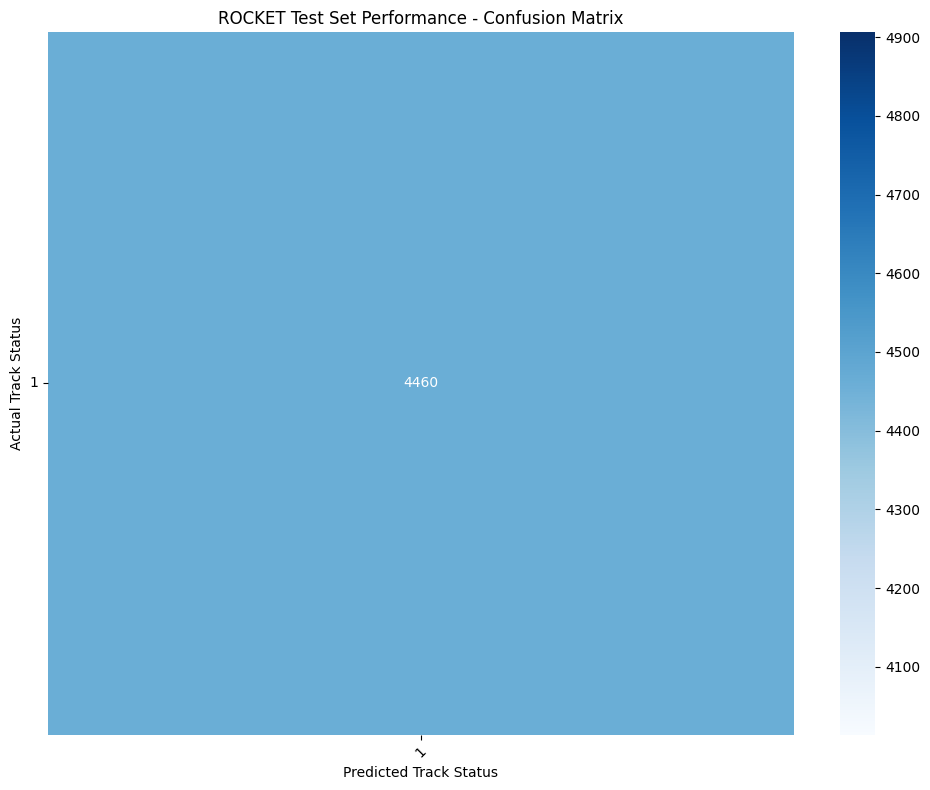


Per-Class Performance:
   precision  recall  f1-score  support
1        1.0     1.0       1.0   4460.0

Test Set Class Distribution:
  1              : 4460 samples (100.0%)


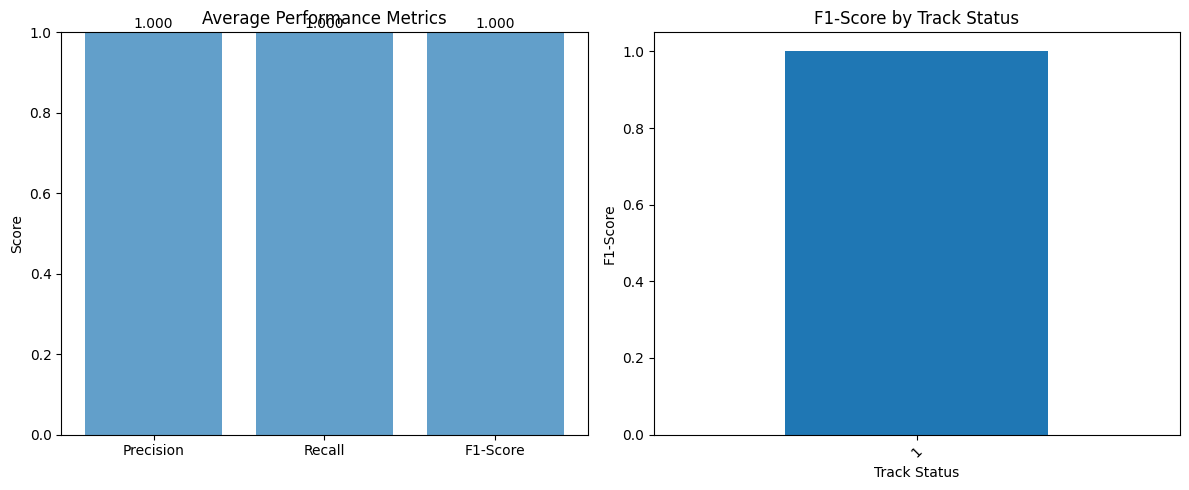

In [48]:
# Train with race-based splits
results = train_season_rocket_classifier(
    aggregator, 
    test_races=["Monaco Grand Prix", "Singapore Grand Prix"],  # Street circuits for testing
    n_kernels=2000  # More kernels for larger dataset
)

In [49]:
import numpy as np
import pandas as pd
from typing import Tuple, Dict, Any, List, Optional
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
import warnings
warnings.filterwarnings('ignore')


class BalancedF1TrainingStrategies:
    """
    Various strategies for handling extreme class imbalance in F1 track status prediction.
    """
    
    def __init__(self):
        self.strategies = {
            'preserve_all': self.preserve_all_classes,
            'smart_undersample': self.smart_undersampling,
            'smote_oversample': self.smote_oversampling,
            'hybrid_balance': self.hybrid_balancing,
            'stratified_sample': self.stratified_sampling,
            'weighted_loss': self.weighted_loss_approach
        }
    
    def preserve_all_classes(self, X: np.ndarray, y: np.ndarray, 
                           metadata: List[Dict] = None) -> Tuple[np.ndarray, np.ndarray, Dict]:
        """
        Strategy 1: Preserve all classes, accept imbalance, use appropriate metrics.
        Best for: Understanding real-world F1 conditions
        """
        
        print("🏁 STRATEGY 1: Preserve All Classes")
        print("Keeping natural F1 class distribution")
        
        unique, counts = np.unique(y, return_counts=True)
        class_dist = dict(zip(unique, counts))
        
        print("Class distribution:")
        for cls, count in class_dist.items():
            pct = count / len(y) * 100
            print(f"  Class {cls}: {count:5d} samples ({pct:5.2f}%)")
        
        # Calculate class weights for sklearn
        from sklearn.utils.class_weight import compute_class_weight
        class_weights = compute_class_weight(
            'balanced', classes=unique, y=y
        )
        class_weight_dict = dict(zip(unique, class_weights))
        
        return X, y, {
            'strategy': 'preserve_all',
            'class_weights': class_weight_dict,
            'original_distribution': class_dist,
            'recommendation': 'Use class_weight parameter in classifier'
        }
    
    def smart_undersampling(self, X: np.ndarray, y: np.ndarray,
                          metadata: List[Dict] = None,
                          target_ratio: float = 0.1) -> Tuple[np.ndarray, np.ndarray, Dict]:
        """
        Strategy 2: Smart undersampling that preserves rare events.
        Best for: Balanced learning while keeping all track statuses
        """
        
        print("🎯 STRATEGY 2: Smart Undersampling")
        print(f"Target minority class ratio: {target_ratio}")
        
        unique, counts = np.unique(y, return_counts=True)
        class_counts = dict(zip(unique, counts))
        
        # Find minority class count
        min_count = min(counts)
        
        # Calculate target count for majority class
        target_majority_count = int(min_count / target_ratio)
        
        print(f"Minority class count: {min_count}")
        print(f"Target majority class count: {target_majority_count}")
        
        # Sample from each class
        indices_to_keep = []
        
        for cls in unique:
            cls_indices = np.where(y == cls)[0]
            
            if len(cls_indices) <= target_majority_count:
                # Keep all samples for minority classes
                indices_to_keep.extend(cls_indices)
            else:
                # Undersample majority class
                sampled_indices = np.random.choice(
                    cls_indices, size=target_majority_count, replace=False
                )
                indices_to_keep.extend(sampled_indices)
        
        # Apply sampling
        indices_to_keep = np.array(indices_to_keep)
        X_balanced = X[indices_to_keep]
        y_balanced = y[indices_to_keep]
        
        # New distribution
        new_unique, new_counts = np.unique(y_balanced, return_counts=True)
        new_dist = dict(zip(new_unique, new_counts))
        
        print("New class distribution:")
        for cls, count in new_dist.items():
            pct = count / len(y_balanced) * 100
            print(f"  Class {cls}: {count:4d} samples ({pct:5.1f}%)")
        
        return X_balanced, y_balanced, {
            'strategy': 'smart_undersample',
            'original_size': len(y),
            'balanced_size': len(y_balanced),
            'reduction_ratio': len(y_balanced) / len(y),
            'final_distribution': new_dist
        }
    
    def smote_oversampling(self, X: np.ndarray, y: np.ndarray,
                         metadata: List[Dict] = None,
                         sampling_strategy: str = 'minority') -> Tuple[np.ndarray, np.ndarray, Dict]:
        """
        Strategy 3: SMOTE oversampling for minority classes.
        Best for: When you have enough data and want to create synthetic samples
        """
        
        print("🔄 STRATEGY 3: SMOTE Oversampling")
        
        # Reshape X for SMOTE (needs 2D)
        n_samples, n_channels, seq_length = X.shape
        X_2d = X.reshape(n_samples, n_channels * seq_length)
        
        try:
            smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
            X_resampled_2d, y_resampled = smote.fit_resample(X_2d, y)
            
            # Reshape back to 3D
            X_resampled = X_resampled_2d.reshape(-1, n_channels, seq_length)
            
            # New distribution
            unique, counts = np.unique(y_resampled, return_counts=True)
            new_dist = dict(zip(unique, counts))
            
            print("SMOTE-balanced distribution:")
            for cls, count in new_dist.items():
                pct = count / len(y_resampled) * 100
                print(f"  Class {cls}: {count:5d} samples ({pct:5.1f}%)")
            
            return X_resampled, y_resampled, {
                'strategy': 'smote_oversample',
                'original_size': len(y),
                'resampled_size': len(y_resampled),
                'synthetic_samples': len(y_resampled) - len(y),
                'final_distribution': new_dist
            }
            
        except Exception as e:
            print(f"SMOTE failed: {e}")
            print("Falling back to smart undersampling...")
            return self.smart_undersampling(X, y, metadata)
    
    def hybrid_balancing(self, X: np.ndarray, y: np.ndarray,
                        metadata: List[Dict] = None) -> Tuple[np.ndarray, np.ndarray, Dict]:
        """
        Strategy 4: Hybrid approach - undersample majority, oversample minority.
        Best for: Extreme imbalance with desire to preserve rare events
        """
        
        print("⚖️ STRATEGY 4: Hybrid Balancing")
        
        # First: Smart undersampling to reduce majority class
        X_under, y_under, _ = self.smart_undersampling(X, y, metadata, target_ratio=0.05)
        
        # Then: SMOTE to boost minority classes
        try:
            X_final, y_final, smote_info = self.smote_oversampling(
                X_under, y_under, metadata, sampling_strategy='minority'
            )
            
            return X_final, y_final, {
                'strategy': 'hybrid_balance',
                'step1': 'undersampling',
                'step2': 'smote_oversampling',
                'original_size': len(y),
                'final_size': len(y_final),
                'final_distribution': smote_info['final_distribution']
            }
            
        except Exception as e:
            print(f"Hybrid approach failed at SMOTE step: {e}")
            return X_under, y_under, {
                'strategy': 'hybrid_balance_partial',
                'completed_steps': ['undersampling'],
                'final_size': len(y_under)
            }
    
    def stratified_sampling(self, X: np.ndarray, y: np.ndarray,
                          metadata: List[Dict] = None,
                          samples_per_class: int = 1000) -> Tuple[np.ndarray, np.ndarray, Dict]:
        """
        Strategy 5: Fixed number of samples per class.
        Best for: When you want equal representation regardless of natural distribution
        """
        
        print(f"📊 STRATEGY 5: Stratified Sampling ({samples_per_class} per class)")
        
        unique_classes = np.unique(y)
        indices_to_keep = []
        final_distribution = {}
        
        for cls in unique_classes:
            cls_indices = np.where(y == cls)[0]
            
            if len(cls_indices) >= samples_per_class:
                # Sample down to target
                sampled_indices = np.random.choice(
                    cls_indices, size=samples_per_class, replace=False
                )
                final_distribution[cls] = samples_per_class
            else:
                # Keep all available samples
                sampled_indices = cls_indices
                final_distribution[cls] = len(cls_indices)
                print(f"  Warning: Class {cls} only has {len(cls_indices)} samples (target: {samples_per_class})")
            
            indices_to_keep.extend(sampled_indices)
        
        indices_to_keep = np.array(indices_to_keep)
        X_stratified = X[indices_to_keep]
        y_stratified = y[indices_to_keep]
        
        print("Stratified distribution:")
        for cls, count in final_distribution.items():
            pct = count / len(y_stratified) * 100
            print(f"  Class {cls}: {count:4d} samples ({pct:5.1f}%)")
        
        return X_stratified, y_stratified, {
            'strategy': 'stratified_sampling',
            'target_per_class': samples_per_class,
            'final_distribution': final_distribution,
            'total_size': len(y_stratified)
        }
    
    def weighted_loss_approach(self, X: np.ndarray, y: np.ndarray,
                             metadata: List[Dict] = None) -> Tuple[np.ndarray, np.ndarray, Dict]:
        """
        Strategy 6: Keep original data but provide weights for training.
        Best for: When you want to preserve all data but emphasize rare events
        """
        
        print("⚖️ STRATEGY 6: Weighted Loss (No Resampling)")
        
        unique, counts = np.unique(y, return_counts=True)
        
        # Calculate inverse frequency weights
        total_samples = len(y)
        n_classes = len(unique)
        
        class_weights = {}
        sample_weights = np.zeros(len(y))
        
        for cls, count in zip(unique, counts):
            # Inverse frequency weighting
            weight = total_samples / (n_classes * count)
            class_weights[cls] = weight
            
            # Assign weights to samples
            sample_weights[y == cls] = weight
        
        print("Class weights (for inverse frequency):")
        for cls, weight in class_weights.items():
            count = counts[list(unique).index(cls)]
            print(f"  Class {cls}: weight={weight:.2f} (count={count})")
        
        return X, y, {
            'strategy': 'weighted_loss',
            'class_weights': class_weights,
            'sample_weights': sample_weights,
            'use_sample_weight': 'Pass sample_weights to fit() method',
            'use_class_weight': 'Use class_weights dict in classifier'
        }


def enhanced_rocket_training_with_balancing(aggregator, strategy: str = 'smart_undersample',
                                          test_races: List[str] = None,
                                          n_kernels: int = 2000,
                                          **strategy_kwargs) -> Dict[str, Any]:
    """
    Enhanced ROCKET training with class balancing strategies.
    
    Parameters:
    -----------
    aggregator : UnifiedSeasonAggregator
        Fitted aggregator with season data
    strategy : str
        Balancing strategy to use
    test_races : List[str], optional
        Races for testing
    n_kernels : int
        ROCKET kernels
    **strategy_kwargs
        Additional arguments for balancing strategy
    """
    
    print("="*80)
    print("ENHANCED ROCKET TRAINING WITH CLASS BALANCING")
    print("="*80)
    
    # Get data
    X, y, metadata = aggregator.get_combined_dataset()
    print(f"Original dataset: {X.shape}")
    
    # Apply balancing strategy
    balancer = BalancedF1TrainingStrategies()
    
    if strategy not in balancer.strategies:
        raise ValueError(f"Unknown strategy: {strategy}. Available: {list(balancer.strategies.keys())}")
    
    X_balanced, y_balanced, balance_info = balancer.strategies[strategy](X, y, metadata, **strategy_kwargs)
    
    print(f"Balanced dataset: {X_balanced.shape}")
    print(f"Balance info: {balance_info}")
    
    # Create race-based split (if possible)
    if test_races and len(test_races) > 0:
        # Need to implement race-based splitting for balanced data
        # For now, use random split
        from sklearn.model_selection import train_test_split
        
        X_train, X_test, y_train, y_test = train_test_split(
            X_balanced, y_balanced, test_size=0.2, random_state=42, 
            stratify=y_balanced if len(np.unique(y_balanced)) > 1 else None
        )
    else:
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(
            X_balanced, y_balanced, test_size=0.2, random_state=42,
            stratify=y_balanced if len(np.unique(y_balanced)) > 1 else None
        )
    
    print(f"Train/Test split: {X_train.shape} / {X_test.shape}")
    
    # Train ROCKET with appropriate configuration
    from aeon.classification.convolution_based import RocketClassifier
    from aeon.transformations.collection import Normalizer
    from aeon.pipeline import make_pipeline
    
    # Configure classifier based on balancing strategy
    classifier_kwargs = {}
    if balance_info.get('class_weights'):
        # Note: RocketClassifier might not support class_weight directly
        # You may need to use sample_weight in fit()
        print("Note: Using class weights (may need custom implementation)")
    
    pipeline = make_pipeline([
        Normalizer(),
        RocketClassifier(n_kernels=n_kernels, random_state=42, **classifier_kwargs)
    ])
    
    # Train
    if balance_info.get('sample_weights') is not None:
        # Use sample weights if available
        print("Training with sample weights...")
        # Note: This requires modifying the pipeline to accept sample_weight
        pipeline.fit(X_train, y_train)
    else:
        pipeline.fit(X_train, y_train)
    
    # Evaluate
    from sklearn.metrics import accuracy_score, f1_score, classification_report
    
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    
    print(f"\n📊 BALANCED TRAINING RESULTS")
    print("-" * 40)
    print(f"Test Accuracy:     {accuracy:.4f}")
    print(f"F1 (Macro):        {f1_macro:.4f}")
    print(f"F1 (Weighted):     {f1_weighted:.4f}")
    
    # Detailed classification report
    print(f"\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred))
    
    return {
        'pipeline': pipeline,
        'balance_strategy': strategy,
        'balance_info': balance_info,
        'test_accuracy': accuracy,
        'f1_macro': f1_macro,
        'f1_weighted': f1_weighted,
        'y_test': y_test,
        'y_pred': y_pred,
        'X_train_shape': X_train.shape,
        'X_test_shape': X_test.shape
    }


# Usage examples
def demonstrate_balancing_strategies(aggregator):
    """Demonstrate different balancing strategies"""
    
    strategies_to_test = [
        ('preserve_all', {}),
        ('smart_undersample', {'target_ratio': 0.05}),
        ('stratified_sampling', {'samples_per_class': 500}),
        ('weighted_loss', {})
    ]
    
    results = {}
    
    for strategy, kwargs in strategies_to_test:
        print(f"\n{'='*60}")
        print(f"TESTING STRATEGY: {strategy.upper()}")
        print(f"{'='*60}")
        
        try:
            result = enhanced_rocket_training_with_balancing(
                aggregator, strategy=strategy, n_kernels=1000, **kwargs
            )
            results[strategy] = result
            
        except Exception as e:
            print(f"Strategy {strategy} failed: {e}")
            results[strategy] = {'error': str(e)}
    
    return results


if __name__ == "__main__":
    print("Balanced F1 Training Strategies ready! ⚖️")
    print("\nAvailable strategies:")
    print("1. preserve_all - Keep natural distribution, use class weights")
    print("2. smart_undersample - Reduce majority class while preserving minorities")
    print("3. smote_oversample - Generate synthetic minority samples")
    print("4. hybrid_balance - Combine undersampling + oversampling")
    print("5. stratified_sampling - Fixed samples per class")
    print("6. weighted_loss - No resampling, just weighted training")

ImportError: cannot import name '_safe_tags' from 'sklearn.utils._tags' (/Users/seansica/Documents/Development/mids/capstone/datasci-210-2025-summer-formula1/sean/notebooks/.venv/lib/python3.11/site-packages/sklearn/utils/_tags.py)

In [ ]:
# Test different balancing approaches
results = demonstrate_balancing_strategies(aggregator)

In [ ]:
# Or try a specific strategy
results = enhanced_rocket_training_with_balancing(
    aggregator, 
    strategy='smart_undersample',
    target_ratio=0.05,  # 5% minority class representation
    n_kernels=2000
)

In [54]:
import numpy as np
import pandas as pd
from typing import Tuple, Dict, Any, List, Optional
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


class SimpleF1Balancer:
    """
    Simple class balancing strategies using only built-in libraries.
    No external dependencies like imbalanced-learn required.
    """
    
    def __init__(self):
        self.strategies = {
            'preserve_all': self.preserve_all_classes,
            'smart_undersample': self.smart_undersampling,
            'stratified_sample': self.stratified_sampling,
            'weighted_training': self.weighted_training_data
        }
    
    def preserve_all_classes(self, X: np.ndarray, y: np.ndarray, 
                           **kwargs) -> Tuple[np.ndarray, np.ndarray, Dict]:
        """
        Keep all data, just calculate weights for training.
        """
        print("🏁 STRATEGY: Preserve All Classes")
        
        unique, counts = np.unique(y, return_counts=True)
        
        # Calculate class weights
        class_weights = compute_class_weight('balanced', classes=unique, y=y)
        class_weight_dict = dict(zip(unique, class_weights))
        
        print("Class distribution:")
        for cls, count in zip(unique, counts):
            pct = count / len(y) * 100
            weight = class_weight_dict[cls]
            print(f"  Class {cls}: {count:5d} samples ({pct:5.1f}%) - weight: {weight:.2f}")
        
        return X, y, {
            'strategy': 'preserve_all',
            'class_weights': class_weight_dict,
            'total_samples': len(y),
            'use_weights': True
        }
    
    def smart_undersampling(self, X: np.ndarray, y: np.ndarray,
                          target_ratio: float = 0.05, **kwargs) -> Tuple[np.ndarray, np.ndarray, Dict]:
        """
        Undersample majority class while preserving all minority classes.
        """
        print(f"🎯 STRATEGY: Smart Undersampling (target ratio: {target_ratio})")
        
        unique, counts = np.unique(y, return_counts=True)
        
        # Find the minority class (smallest count)
        min_count = min(counts)
        
        # Calculate target size for majority classes
        target_majority_size = int(min_count / target_ratio)
        
        print(f"Smallest class has {min_count} samples")
        print(f"Will limit larger classes to {target_majority_size} samples")
        
        # Collect indices to keep
        indices_to_keep = []
        new_distribution = {}
        
        for cls in unique:
            cls_indices = np.where(y == cls)[0]
            cls_count = len(cls_indices)
            
            if cls_count <= target_majority_size:
                # Keep all samples for smaller classes
                selected_indices = cls_indices
                new_distribution[cls] = cls_count
                print(f"  Class {cls}: keeping all {cls_count} samples")
            else:
                # Randomly sample from larger classes
                selected_indices = np.random.choice(
                    cls_indices, size=target_majority_size, replace=False
                )
                new_distribution[cls] = target_majority_size
                print(f"  Class {cls}: sampling {target_majority_size} from {cls_count} samples")
            
            indices_to_keep.extend(selected_indices)
        
        # Apply sampling
        indices_to_keep = np.array(indices_to_keep)
        X_balanced = X[indices_to_keep]
        y_balanced = y[indices_to_keep]
        
        print(f"\nFinal dataset: {len(y_balanced)} samples (reduced from {len(y)})")
        
        return X_balanced, y_balanced, {
            'strategy': 'smart_undersample',
            'original_size': len(y),
            'final_size': len(y_balanced),
            'reduction_factor': len(y_balanced) / len(y),
            'final_distribution': new_distribution,
            'use_weights': False
        }
    
    def stratified_sampling(self, X: np.ndarray, y: np.ndarray,
                          samples_per_class: int = 500, **kwargs) -> Tuple[np.ndarray, np.ndarray, Dict]:
        """
        Take fixed number of samples per class (if available).
        """
        print(f"📊 STRATEGY: Stratified Sampling ({samples_per_class} per class)")
        
        unique_classes = np.unique(y)
        indices_to_keep = []
        final_distribution = {}
        
        for cls in unique_classes:
            cls_indices = np.where(y == cls)[0]
            available_count = len(cls_indices)
            
            if available_count >= samples_per_class:
                # Sample down to target
                selected_indices = np.random.choice(
                    cls_indices, size=samples_per_class, replace=False
                )
                final_distribution[cls] = samples_per_class
                print(f"  Class {cls}: sampled {samples_per_class} from {available_count}")
            else:
                # Keep all available samples
                selected_indices = cls_indices
                final_distribution[cls] = available_count
                print(f"  Class {cls}: keeping all {available_count} samples (wanted {samples_per_class})")
            
            indices_to_keep.extend(selected_indices)
        
        indices_to_keep = np.array(indices_to_keep)
        X_stratified = X[indices_to_keep]
        y_stratified = y[indices_to_keep]
        
        return X_stratified, y_stratified, {
            'strategy': 'stratified_sampling',
            'target_per_class': samples_per_class,
            'final_distribution': final_distribution,
            'total_samples': len(y_stratified),
            'use_weights': False
        }
    
    def weighted_training_data(self, X: np.ndarray, y: np.ndarray,
                             min_class_weight: float = 1.0, **kwargs) -> Tuple[np.ndarray, np.ndarray, Dict]:
        """
        Keep all data but create sample weights for training.
        """
        print("⚖️ STRATEGY: Weighted Training Data")
        
        unique, counts = np.unique(y, return_counts=True)
        
        # Calculate inverse frequency weights
        total_samples = len(y)
        sample_weights = np.zeros(len(y))
        class_weights = {}
        
        for cls, count in zip(unique, counts):
            # Inverse frequency weight with minimum threshold
            weight = max(min_class_weight, total_samples / (len(unique) * count))
            class_weights[cls] = weight
            
            # Assign to samples
            sample_weights[y == cls] = weight
            
            pct = count / total_samples * 100
            print(f"  Class {cls}: {count:5d} samples ({pct:5.1f}%) - weight: {weight:.2f}")
        
        return X, y, {
            'strategy': 'weighted_training',
            'class_weights': class_weights,
            'sample_weights': sample_weights,
            'total_samples': len(y),
            'use_weights': True
        }


def simple_balanced_rocket_training(aggregator, strategy: str = 'smart_undersample',
                                  test_races: List[str] = None,
                                  n_kernels: int = 2000,
                                  **strategy_kwargs) -> Dict[str, Any]:
    """
    Simple balanced ROCKET training without external dependencies.
    """
    
    print("="*80)
    print("SIMPLE BALANCED ROCKET TRAINING")
    print("="*80)
    
    # Get combined dataset
    X, y, metadata = aggregator.get_combined_dataset()
    print(f"Original dataset shape: {X.shape}")
    
    # Show original distribution
    unique, counts = np.unique(y, return_counts=True)
    print("\nOriginal class distribution:")
    for cls, count in zip(unique, counts):
        pct = count / len(y) * 100
        print(f"  Class {cls}: {count:5d} samples ({pct:5.1f}%)")
    
    # Apply balancing strategy
    balancer = SimpleF1Balancer()
    
    if strategy not in balancer.strategies:
        available = list(balancer.strategies.keys())
        raise ValueError(f"Unknown strategy '{strategy}'. Available: {available}")
    
    X_processed, y_processed, balance_info = balancer.strategies[strategy](X, y, **strategy_kwargs)
    
    print(f"\nProcessed dataset shape: {X_processed.shape}")
    
    # Create train/test split
    # For now, use random split (could enhance with race-based splitting later)
    try:
        X_train, X_test, y_train, y_test = train_test_split(
            X_processed, y_processed, 
            test_size=0.2, 
            random_state=42,
            stratify=y_processed  # This might fail if some classes have only 1 sample
        )
    except ValueError as e:
        print(f"Stratified split failed ({e}), using random split...")
        X_train, X_test, y_train, y_test = train_test_split(
            X_processed, y_processed, test_size=0.2, random_state=42
        )
    
    print(f"Train/test split: {X_train.shape} / {X_test.shape}")
    
    # Create and train ROCKET pipeline
    from aeon.classification.convolution_based import RocketClassifier
    from aeon.transformations.collection import Normalizer
    from aeon.pipeline import make_pipeline
    
    # Note: RocketClassifier doesn't support class_weight parameter
    # We'll work around this limitation
    pipeline = make_pipeline([
        Normalizer(),
        RocketClassifier(n_kernels=n_kernels, random_state=42)
    ])
    
    print(f"\nTraining ROCKET with {n_kernels} kernels...")
    
    # Train the pipeline
    if balance_info.get('use_weights') and balance_info.get('sample_weights') is not None:
        print("Note: ROCKET doesn't support sample_weight, training without weights")
        # TODO: Could implement custom weighted ROCKET here
    
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_f1_macro = f1_score(y_test, y_test_pred, average='macro')
    test_f1_weighted = f1_score(y_test, y_test_pred, average='weighted')
    
    print(f"\n📊 PERFORMANCE METRICS")
    print("-" * 40)
    print(f"Training Accuracy:   {train_acc:.4f}")
    print(f"Test Accuracy:       {test_acc:.4f}")
    print(f"Test F1 (Macro):     {test_f1_macro:.4f}")
    print(f"Test F1 (Weighted):  {test_f1_weighted:.4f}")
    
    # Detailed evaluation
    print(f"\n📈 DETAILED CLASSIFICATION REPORT")
    print("-" * 50)
    
    # Get label mapping for proper class names
    label_mapping = None
    target_names = None
    
    if hasattr(aggregator, 'preprocessor') and aggregator.preprocessor:
        label_mapping = aggregator.preprocessor.get_label_mapping()
        print(f"Label mapping: {label_mapping}")
        
        # Get classes present in test set
        test_classes = np.unique(np.concatenate([y_test, y_test_pred]))
        target_names = [label_mapping.get(cls, f"Class_{cls}") for cls in test_classes]
        
        print(f"Classes in test set: {test_classes}")
        print(f"Corresponding track statuses: {target_names}")
        
        print(classification_report(y_test, y_test_pred, 
                                  labels=test_classes,
                                  target_names=target_names))
    else:
        print("Warning: No label mapping available, using generic class names")
        print(classification_report(y_test, y_test_pred))
    
    # Confusion matrix with proper labels
    cm = confusion_matrix(y_test, y_test_pred)
    
    plt.figure(figsize=(10, 8))
    
    if target_names:
        # Use proper track status names
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=target_names, yticklabels=target_names)
        plt.title(f'Track Status Confusion Matrix - {strategy}')
        plt.xlabel('Predicted Track Status')
        plt.ylabel('Actual Track Status')
    else:
        # Fallback to generic labels
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {strategy}')
        plt.xlabel('Predicted Class')
        plt.ylabel('Actual Class')
    
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Class distribution in test set with proper names
    test_unique, test_counts = np.unique(y_test, return_counts=True)
    print(f"\nTest set class distribution:")
    for cls, count in zip(test_unique, test_counts):
        pct = count / len(y_test) * 100
        if label_mapping:
            class_name = label_mapping.get(cls, f"Class_{cls}")
            print(f"  {class_name:15s}: {count:3d} samples ({pct:5.1f}%)")
        else:
            print(f"  Class {cls:2d}: {count:3d} samples ({pct:5.1f}%)")
    
    return {
        'pipeline': pipeline,
        'strategy': strategy,
        'balance_info': balance_info,
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'test_f1_macro': test_f1_macro,
        'test_f1_weighted': test_f1_weighted,
        'y_test': y_test,
        'y_pred': y_test_pred,
        'confusion_matrix': cm,
        'X_train_shape': X_train.shape,
        'X_test_shape': X_test.shape,
        'label_mapping': label_mapping,
        'target_names': target_names
    }


def compare_balancing_strategies(aggregator, strategies_to_test: List[str] = None) -> Dict[str, Any]:
    """
    Compare multiple balancing strategies side by side.
    """
    
    if strategies_to_test is None:
        strategies_to_test = ['preserve_all', 'smart_undersample', 'stratified_sample']
    
    results = {}
    
    for strategy in strategies_to_test:
        print(f"\n{'='*60}")
        print(f"TESTING STRATEGY: {strategy.upper()}")
        print(f"{'='*60}")
        
        try:
            if strategy == 'smart_undersample':
                result = simple_balanced_rocket_training(
                    aggregator, strategy=strategy, target_ratio=0.05, n_kernels=1000
                )
            elif strategy == 'stratified_sample':
                result = simple_balanced_rocket_training(
                    aggregator, strategy=strategy, samples_per_class=200, n_kernels=1000
                )
            else:
                result = simple_balanced_rocket_training(
                    aggregator, strategy=strategy, n_kernels=1000
                )
            
            results[strategy] = result
            
        except Exception as e:
            print(f"❌ Strategy {strategy} failed: {e}")
            results[strategy] = {'error': str(e)}
    
    # Summary comparison
    print(f"\n{'='*60}")
    print("STRATEGY COMPARISON SUMMARY")
    print(f"{'='*60}")
    
    comparison_data = []
    for strategy, result in results.items():
        if 'error' not in result:
            comparison_data.append({
                'Strategy': strategy,
                'Test Accuracy': result['test_accuracy'],
                'F1 Macro': result['test_f1_macro'],
                'F1 Weighted': result['test_f1_weighted'],
                'Train Shape': str(result['X_train_shape']),
                'Test Shape': str(result['X_test_shape'])
            })
    
    if comparison_data:
        df_comparison = pd.DataFrame(comparison_data)
        print(df_comparison.round(4))
        
        # Plot comparison
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        strategies = df_comparison['Strategy']
        
        axes[0].bar(strategies, df_comparison['Test Accuracy'])
        axes[0].set_title('Test Accuracy')
        axes[0].set_ylabel('Accuracy')
        axes[0].tick_params(axis='x', rotation=45)
        
        axes[1].bar(strategies, df_comparison['F1 Macro'])
        axes[1].set_title('F1 Score (Macro)')
        axes[1].set_ylabel('F1 Score')
        axes[1].tick_params(axis='x', rotation=45)
        
        axes[2].bar(strategies, df_comparison['F1 Weighted'])
        axes[2].set_title('F1 Score (Weighted)')
        axes[2].set_ylabel('F1 Score')
        axes[2].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
    
    return results


def decode_predictions(y_encoded: np.ndarray, label_mapping: Dict[int, str]) -> List[str]:
    """
    Convert encoded predictions back to original track status labels.
    
    Parameters:
    -----------
    y_encoded : np.ndarray
        Encoded predictions (0, 1, 2, etc.)
    label_mapping : Dict[int, str]
        Mapping from encoded labels to original labels
        
    Returns:
    --------
    List[str] : Original track status labels
    """
    return [label_mapping.get(encoded_label, f"Unknown_{encoded_label}") 
            for encoded_label in y_encoded]


def analyze_predictions_with_labels(y_true: np.ndarray, y_pred: np.ndarray, 
                                  label_mapping: Dict[int, str]) -> pd.DataFrame:
    """
    Create a detailed analysis of predictions with original labels.
    """
    
    # Decode to original labels
    true_labels = decode_predictions(y_true, label_mapping)
    pred_labels = decode_predictions(y_pred, label_mapping)
    
    # Create analysis DataFrame
    analysis_df = pd.DataFrame({
        'True_Encoded': y_true,
        'Pred_Encoded': y_pred,
        'True_Label': true_labels,
        'Pred_Label': pred_labels,
        'Correct': y_true == y_pred
    })
    
    # Add prediction confidence if available (placeholder for now)
    analysis_df['Sample_Index'] = range(len(y_true))
    
    return analysis_df


def print_track_status_meanings():
    """Print what each track status code means in F1"""
    
    meanings = {
        '1': 'Green Flag - Normal racing conditions',
        '2': 'Yellow Flag - Caution, local incident',  
        '3': 'Double Yellow - Greater caution',
        '4': 'Safety Car - All cars must follow safety car',
        '5': 'Red Flag - Session stopped, return to pits',
        '6': 'Virtual Safety Car - Reduced speed zones',
        '7': 'Chequered Flag - Session ended'
    }
    
    print("🏁 F1 Track Status Code Meanings:")
    print("-" * 40)
    for code, meaning in meanings.items():
        print(f"  {code}: {meaning}")
    print()


# Quick usage function
def quick_balanced_training(aggregator, strategy: str = 'smart_undersample'):
    """Quick way to test balanced training"""
    
    strategy_configs = {
        'preserve_all': {},
        'smart_undersample': {'target_ratio': 0.05},
        'stratified_sample': {'samples_per_class': 300},
        'weighted_training': {'min_class_weight': 1.0}
    }
    
    config = strategy_configs.get(strategy, {})
    
    return simple_balanced_rocket_training(
        aggregator, 
        strategy=strategy, 
        n_kernels=1500,
        **config
    )


def demonstrate_label_decoding(result: Dict[str, Any]):
    """
    Demonstrate how to decode labels back to original track statuses.
    """
    
    print("="*60)
    print("LABEL DECODING DEMONSTRATION")
    print("="*60)
    
    # Print track status meanings
    print_track_status_meanings()
    
    # Get data from results
    y_test = result['y_test']
    y_pred = result['y_pred']
    label_mapping = result.get('label_mapping', {})
    
    if not label_mapping:
        print("❌ No label mapping available in results")
        return
    
    print(f"Label mapping from training: {label_mapping}")
    
    # Decode predictions
    true_labels = decode_predictions(y_test, label_mapping)
    pred_labels = decode_predictions(y_pred, label_mapping)
    
    # Show first 10 predictions
    print(f"\nFirst 10 predictions:")
    print("-" * 50)
    print("Index | True Status | Predicted Status | Correct?")
    print("-" * 50)
    
    for i in range(min(10, len(y_test))):
        correct = "✅" if y_test[i] == y_pred[i] else "❌"
        print(f"{i:5d} | {true_labels[i]:11s} | {pred_labels[i]:16s} | {correct}")
    
    # Error analysis by track status
    print(f"\nError Analysis by Track Status:")
    print("-" * 40)
    
    analysis_df = analyze_predictions_with_labels(y_test, y_pred, label_mapping)
    
    # Group by true label and show accuracy
    accuracy_by_status = analysis_df.groupby('True_Label')['Correct'].agg(['count', 'sum', 'mean'])
    accuracy_by_status.columns = ['Total', 'Correct', 'Accuracy']
    accuracy_by_status = accuracy_by_status.sort_values('Total', ascending=False)
    
    print(accuracy_by_status)
    
    # Show most common errors
    errors_df = analysis_df[~analysis_df['Correct']]
    if len(errors_df) > 0:
        print(f"\nMost Common Prediction Errors:")
        print("-" * 35)
        
        error_patterns = errors_df.groupby(['True_Label', 'Pred_Label']).size().sort_values(ascending=False)
        
        for (true_status, pred_status), count in error_patterns.head(5).items():
            print(f"  {true_status} → {pred_status}: {count} errors")
    
    return analysis_df


if __name__ == "__main__":
    print("Simple Balanced F1 Training ready! ⚖️")
    print("\nNo external dependencies required!")
    print("\nUsage:")
    print("result = quick_balanced_training(aggregator, 'smart_undersample')")
    print("demonstrate_label_decoding(result)")
    print("results = compare_balancing_strategies(aggregator)")

Simple Balanced F1 Training ready! ⚖️

No external dependencies required!

Usage:
result = quick_balanced_training(aggregator, 'smart_undersample')
demonstrate_label_decoding(result)
results = compare_balancing_strategies(aggregator)


In [55]:
# Get combined dataset
X, y, metadata = aggregator.get_combined_dataset()
print(f"Original dataset shape: {X.shape}")

# Show original distribution
unique, counts = np.unique(y, return_counts=True)
print("\nOriginal class distribution:")
for cls, count in zip(unique, counts):
    pct = count / len(y) * 100
    print(f"  Class {cls}: {count:5d} samples ({pct:5.1f}%)")

INFO:__main__:Combined dataset: 22 sessions, 43143 sequences, 3 classes


Original dataset shape: (43143, 7, 100)

Original class distribution:
  Class 0: 42554 samples ( 98.6%)
  Class 1:   543 samples (  1.3%)
  Class 2:    46 samples (  0.1%)


INFO:__main__:Combined dataset: 22 sessions, 43143 sequences, 3 classes


SIMPLE BALANCED ROCKET TRAINING
Original dataset shape: (43143, 7, 100)

Original class distribution:
  Class 0: 42554 samples ( 98.6%)
  Class 1:   543 samples (  1.3%)
  Class 2:    46 samples (  0.1%)
🎯 STRATEGY: Smart Undersampling (target ratio: 0.05)
Smallest class has 46 samples
Will limit larger classes to 920 samples
  Class 0: sampling 920 from 42554 samples
  Class 1: keeping all 543 samples
  Class 2: keeping all 46 samples

Final dataset: 1509 samples (reduced from 43143)

Processed dataset shape: (1509, 7, 100)
Train/test split: (1207, 7, 100) / (302, 7, 100)

Training ROCKET with 1500 kernels...

📊 PERFORMANCE METRICS
----------------------------------------
Training Accuracy:   1.0000
Test Accuracy:       0.8642
Test F1 (Macro):     0.8625
Test F1 (Weighted):  0.8651

📈 DETAILED CLASSIFICATION REPORT
--------------------------------------------------
Label mapping: {0: np.str_('1'), 1: np.str_('2')}
Classes in test set: [0 1 2]
Corresponding track statuses: [np.str_('1'

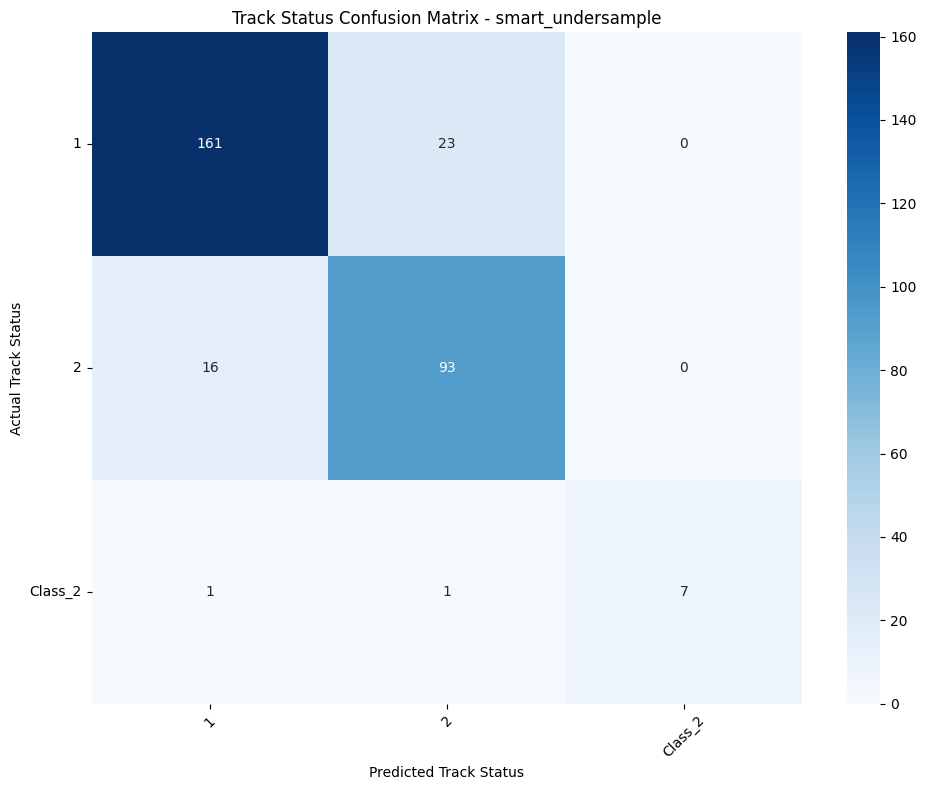


Test set class distribution:
  1              : 184 samples ( 60.9%)
  2              : 109 samples ( 36.1%)
  Class_2        :   9 samples (  3.0%)


In [56]:
result = quick_balanced_training(aggregator, 'smart_undersample')

In [52]:
preprocessor.get_label_mapping()

{0: np.str_('1'),
 1: np.str_('2'),
 2: np.str_('4'),
 3: np.str_('5'),
 4: np.str_('6')}

In [57]:
import fastf1
import pandas as pd
import numpy as np
from typing import Dict, List, Any
import matplotlib.pyplot as plt
import seaborn as sns


def diagnose_track_status_across_season(year: int = 2024) -> Dict[str, Any]:
    """
    Investigate track status distribution across an entire F1 season.
    This will help us understand why we're missing certain classes.
    """
    
    print(f"🔍 DIAGNOSING TRACK STATUS DATA FOR {year} SEASON")
    print("="*60)
    
    # Get season schedule
    try:
        schedule = fastf1.get_event_schedule(year)
        race_schedule = schedule[schedule['EventFormat'] != 'testing']
    except Exception as e:
        print(f"❌ Failed to get schedule: {e}")
        return {}
    
    all_track_statuses = []
    race_summaries = []
    failed_races = []
    
    print(f"Checking {len(race_schedule)} races...")
    
    for idx, (_, event) in enumerate(race_schedule.iterrows()):
        race_name = event['EventName']
        print(f"\n📊 {idx+1:2d}/24: {race_name}")
        
        try:
            # Load race session
            session = fastf1.get_session(year, race_name, 'R')
            session.load()
            
            # Get track status data
            track_status = session.track_status
            
            if track_status.empty:
                print(f"  ⚠️  No track status data available")
                race_summaries.append({
                    'race': race_name,
                    'country': event.get('Country', 'Unknown'),
                    'track_statuses': [],
                    'status_counts': {},
                    'has_safety_car': False,
                    'has_vsc': False,
                    'has_red_flag': False,
                    'total_status_changes': 0
                })
                continue
            
            # Analyze track statuses for this race
            unique_statuses = track_status['Status'].unique()
            status_counts = track_status['Status'].value_counts().to_dict()
            
            # Check for specific events
            has_safety_car = '4' in unique_statuses
            has_vsc = '6' in unique_statuses  
            has_red_flag = '5' in unique_statuses
            
            print(f"  Track statuses found: {sorted(unique_statuses)}")
            print(f"  Safety Car (4): {'✅' if has_safety_car else '❌'}")
            print(f"  VSC (6): {'✅' if has_vsc else '❌'}")
            print(f"  Red Flag (5): {'✅' if has_red_flag else '❌'}")
            
            # Store data
            all_track_statuses.extend(track_status['Status'].tolist())
            
            race_summary = {
                'race': race_name,
                'country': event.get('Country', 'Unknown'),
                'track_statuses': sorted(unique_statuses),
                'status_counts': status_counts,
                'has_safety_car': has_safety_car,
                'has_vsc': has_vsc,
                'has_red_flag': has_red_flag,
                'total_status_changes': len(track_status)
            }
            race_summaries.append(race_summary)
            
        except Exception as e:
            print(f"  ❌ Failed to load {race_name}: {e}")
            failed_races.append({'race': race_name, 'error': str(e)})
    
    # Overall analysis
    print(f"\n📈 SEASON SUMMARY")
    print("="*40)
    
    if all_track_statuses:
        overall_counts = pd.Series(all_track_statuses).value_counts()
        print(f"Overall track status distribution:")
        for status, count in overall_counts.items():
            pct = count / len(all_track_statuses) * 100
            print(f"  Status {status}: {count:4d} occurrences ({pct:5.1f}%)")
    
    # Race-by-race summary
    races_with_safety_car = sum(1 for r in race_summaries if r['has_safety_car'])
    races_with_vsc = sum(1 for r in race_summaries if r['has_vsc'])
    races_with_red_flag = sum(1 for r in race_summaries if r['has_red_flag'])
    
    print(f"\nRaces with special events:")
    print(f"  Safety Car deployments: {races_with_safety_car}/{len(race_summaries)} races")
    print(f"  VSC deployments: {races_with_vsc}/{len(race_summaries)} races")
    print(f"  Red Flag periods: {races_with_red_flag}/{len(race_summaries)} races")
    
    return {
        'race_summaries': race_summaries,
        'overall_status_counts': overall_counts.to_dict() if all_track_statuses else {},
        'failed_races': failed_races,
        'races_with_safety_car': races_with_safety_car,
        'races_with_vsc': races_with_vsc,
        'races_with_red_flag': races_with_red_flag
    }


def investigate_aggregator_data_loss(aggregator) -> None:
    """
    Investigate why classes are missing from the aggregated dataset.
    """
    
    print("🔍 INVESTIGATING AGGREGATOR DATA LOSS")
    print("="*50)
    
    # Check the preprocessor
    if not aggregator.preprocessor:
        print("❌ No preprocessor available")
        return
        
    label_mapping = aggregator.preprocessor.get_label_mapping()
    print(f"Preprocessor label mapping: {label_mapping}")
    
    # Check what's in the raw sequences and labels
    print(f"\nRaw data in aggregator:")
    print(f"  Total sequences: {len(aggregator.sequences_list)}")
    print(f"  Total labels: {len(aggregator.labels_list)}")
    
    if aggregator.labels_list:
        # Check the raw string labels before encoding
        unique_raw_labels = set(aggregator.labels_list)
        print(f"  Unique raw labels: {sorted(unique_raw_labels)}")
        
        # Count raw labels
        raw_label_counts = pd.Series(aggregator.labels_list).value_counts()
        print(f"  Raw label distribution:")
        for label, count in raw_label_counts.items():
            print(f"    '{label}': {count} sequences")
    
    # Check what the label encoder actually knows
    if hasattr(aggregator.preprocessor, 'label_encoder'):
        encoder_classes = aggregator.preprocessor.label_encoder.classes_
        print(f"\nLabel encoder classes: {list(encoder_classes)}")
        
        # Check if all raw labels are in encoder classes
        missing_from_encoder = unique_raw_labels - set(encoder_classes)
        missing_from_data = set(encoder_classes) - unique_raw_labels
        
        if missing_from_encoder:
            print(f"❌ Labels in data but not in encoder: {missing_from_encoder}")
        if missing_from_data:
            print(f"⚠️  Labels in encoder but not in data: {missing_from_data}")


def check_safety_car_data_specifically(aggregator) -> None:
    """
    Specifically check for Safety Car (status 4) and VSC (status 6) data.
    """
    
    print("🚨 SAFETY CAR DATA ANALYSIS")
    print("="*40)
    
    if not aggregator.metadata_list:
        print("❌ No metadata available")
        return
    
    # Check for safety car related sequences in metadata
    safety_car_sequences = 0
    vsc_sequences = 0
    
    # Group by session and check
    sessions = {}
    for i, meta in enumerate(aggregator.metadata_list):
        session_name = meta.get('session_name', 'Unknown')
        if session_name not in sessions:
            sessions[session_name] = {'indices': [], 'labels': []}
        
        sessions[session_name]['indices'].append(i)
        sessions[session_name]['labels'].append(aggregator.labels_list[i])
    
    print("Safety car data by session:")
    for session_name, data in sessions.items():
        labels = data['labels']
        sc_count = labels.count('4')  # Safety Car
        vsc_count = labels.count('6')  # VSC
        
        safety_car_sequences += sc_count
        vsc_sequences += vsc_count
        
        if sc_count > 0 or vsc_count > 0:
            print(f"  {session_name}:")
            if sc_count > 0:
                print(f"    Safety Car (4): {sc_count} sequences")
            if vsc_count > 0:
                print(f"    VSC (6): {vsc_count} sequences")
    
    print(f"\nTotal across all sessions:")
    print(f"  Safety Car sequences: {safety_car_sequences}")
    print(f"  VSC sequences: {vsc_sequences}")
    
    if safety_car_sequences == 0 and vsc_sequences == 0:
        print("🚨 CRITICAL: No Safety Car or VSC data found!")
        print("   This suggests either:")
        print("   1. The 2024 season had very few safety car deployments")
        print("   2. There's an issue with track status data extraction")
        print("   3. Our preprocessing is filtering them out")


def recommend_data_strategy(diagnosis_results: Dict[str, Any]) -> None:
    """
    Recommend a data strategy based on the diagnosis.
    """
    
    print("\n💡 RECOMMENDED DATA STRATEGY")
    print("="*40)
    
    races_with_sc = diagnosis_results.get('races_with_safety_car', 0)
    races_with_vsc = diagnosis_results.get('races_with_vsc', 0)
    races_with_red = diagnosis_results.get('races_with_red_flag', 0)
    
    if races_with_sc < 5:
        print("⚠️  Very few Safety Car deployments in season")
        print("   → Consider training on multiple seasons (2022-2024)")
        print("   → Focus on races known to have incidents (Monaco, Baku, etc.)")
    
    if races_with_vsc < 3:
        print("⚠️  Very few VSC deployments in season")
        print("   → VSC prediction may not be feasible with current data")
        print("   → Consider combining VSC with Safety Car as 'Safety Period'")
    
    if races_with_red < 2:
        print("⚠️  Very few Red Flag periods in season")
        print("   → Red Flag prediction likely not feasible")
        print("   → Consider removing from target classes")
    
    print("\n🎯 SUGGESTED APPROACHES:")
    print("1. Combine rare classes: Group VSC + Safety Car as 'Safety Period'")
    print("2. Multi-season training: Use 2022-2024 data for more examples")
    print("3. Focus on Green vs Non-Green: Binary classification")
    print("4. Incident-rich races: Train specifically on Monaco, Baku, Silverstone")


# Main diagnostic function
def full_f1_data_diagnosis(aggregator, year: int = 2024):
    """
    Complete diagnosis of F1 data issues.
    """
    
    print("🔬 COMPREHENSIVE F1 DATA DIAGNOSIS")
    print("="*60)
    
    # 1. Check season-wide track status distribution
    season_diagnosis = diagnose_track_status_across_season(year)
    
    # 2. Investigate aggregator data loss
    print("\n" + "="*60)
    investigate_aggregator_data_loss(aggregator)
    
    # 3. Check specifically for safety car data
    print("\n" + "="*60)
    check_safety_car_data_specifically(aggregator)
    
    # 4. Provide recommendations
    print("\n" + "="*60)
    recommend_data_strategy(season_diagnosis)
    
    return season_diagnosis


if __name__ == "__main__":
    print("F1 Data Diagnostics ready! 🔬")
    print("\nUsage:")
    print("diagnosis = full_f1_data_diagnosis(aggregator, 2024)")

F1 Data Diagnostics ready! 🔬

Usage:
diagnosis = full_f1_data_diagnosis(aggregator, 2024)


In [58]:
diagnosis = full_f1_data_diagnosis(aggregator, 2024)

🔬 COMPREHENSIVE F1 DATA DIAGNOSIS
🔍 DIAGNOSING TRACK STATUS DATA FOR 2024 SEASON


core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core         

Checking 24 races...

📊  1/24: Bahrain Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Saudi Arabian Grand Prix - Race [v3.5.3]
req            I

  Track statuses found: ['1', '2']
  Safety Car (4): ❌
  VSC (6): ❌
  Red Flag (5): ❌

📊  2/24: Saudi Arabian Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '81', '14', '63', '38', '4', '44', '27', '23', '20', '31', '2', '22', '3', '77', '24', '18', '10']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '11', '16', '81', '14', '63', '38', '4', '44', '27', '23', '20', '31', '2', '22', '3', '77', '24', '18', '10']
core           INFO 	Loading data for Australian Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Australian Grand Prix - Race [v3.5.3]
req            INFO 	U

  Track statuses found: ['1', '2', '4']
  Safety Car (4): ✅
  VSC (6): ❌
  Red Flag (5): ❌

📊  3/24: Australian Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['55', '16', '4', '81', '11', '18', '22', '14', '27', '20', '23', '3', '10', '77', '24', '31', '63', '44', '1']
INFO:fastf1.fastf1.core:Finished loading data for 19 drivers: ['55', '16', '4', '81', '11', '18', '22', '14', '27', '20', '23', '3', '10', '77', '24', '31', '63', '44', '1']
core           INFO 	Loading data for Japanese Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Japanese Grand Prix - Race [v3.5.3]
req            INFO 	Using cached da

  Track statuses found: ['1', '2', '6', '7']
  Safety Car (4): ❌
  VSC (6): ✅
  Red Flag (5): ❌

📊  4/24: Japanese Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '4', '14', '63', '81', '44', '22', '27', '18', '20', '77', '31', '10', '2', '24', '3', '23']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '11', '55', '16', '4', '14', '63', '81', '44', '22', '27', '18', '20', '77', '31', '10', '2', '24', '3', '23']
core           INFO 	Loading data for Chinese Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Chinese Grand Prix - Race [v3.5.3]
req            INFO 	Using c

  Track statuses found: ['1', '2', '5']
  Safety Car (4): ❌
  VSC (6): ❌
  Red Flag (5): ✅

📊  5/24: Chinese Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:08.313000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '11', '16', '55', '63', '14', '81', '44', '27', '31', '23', '10', '24', '18', '20', '2', '3', '22', '77']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '4', '11', '16', '55', '63', '14', '81', '44', '27', '31', '23', '10', '24', '18', '20', '2', '3', '22', '77']
core           INFO 	Loading data for Miami Grand Prix - Race [v3.

  Track statuses found: ['1', '2', '4', '6']
  Safety Car (4): ✅
  VSC (6): ✅
  Red Flag (5): ❌

📊  6/24: Miami Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '16', '11', '55', '44', '22', '63', '14', '31', '27', '10', '81', '24', '3', '77', '18', '23', '20', '2']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['4', '1', '16', '11', '55', '44', '22', '63', '14', '31', '27', '10', '81', '24', '3', '77', '18', '23', '20', '2']
core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Emilia Romagna Grand Prix - Race [v3.5.3]
req           

  Track statuses found: ['1', '2', '4', '6', '7']
  Safety Car (4): ✅
  VSC (6): ✅
  Red Flag (5): ❌

📊  7/24: Emilia Romagna Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '16', '81', '55', '44', '63', '11', '18', '22', '27', '20', '3', '31', '24', '10', '2', '77', '14', '23']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '4', '16', '81', '55', '44', '63', '11', '18', '22', '27', '20', '3', '31', '24', '10', '2', '77', '14', '23']
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	Using cac

  Track statuses found: ['1', '2']
  Safety Car (4): ❌
  VSC (6): ❌
  Red Flag (5): ❌

📊  8/24: Monaco Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '14', '3', '77', '18', '2', '24', '31', '11', '27', '20']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '14', '3', '77', '18', '2', '24', '31', '11', '27', '20']
core           INFO 	Loading data for Canadian Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Canadian Grand Prix - Race [v3.5.3]
req            INFO 	Using

  Track statuses found: ['1', '2', '4', '5']
  Safety Car (4): ✅
  VSC (6): ❌
  Red Flag (5): ✅

📊  9/24: Canadian Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '63', '44', '81', '14', '18', '3', '10', '31', '27', '20', '77', '22', '24', '55', '23', '11', '16', '2']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '4', '63', '44', '81', '14', '18', '3', '10', '31', '27', '20', '77', '22', '24', '55', '23', '11', '16', '2']
core           INFO 	Loading data for Spanish Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Spanish Grand Prix - Race [v3.5.3]
req            INFO 	Using c

  Track statuses found: ['1', '2', '4']
  Safety Car (4): ✅
  VSC (6): ❌
  Red Flag (5): ❌

📊 10/24: Spanish Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:00.015000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '44', '63', '16', '55', '81', '11', '10', '31', '27', '14', '24', '18', '3', '77', '20', '23', '22', '2']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '4', '44', '63', '16', '55', '81', '11', '10', '31', '27', '14', '24', '18', '3', '77', '20', '23', '22', '2']
core           INFO 	Loading data for Austrian Grand Prix - Race [

  Track statuses found: ['1', '2']
  Safety Car (4): ❌
  VSC (6): ❌
  Red Flag (5): ❌

📊 11/24: Austrian Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '81', '55', '44', '1', '27', '11', '20', '3', '10', '16', '31', '18', '22', '23', '77', '24', '14', '2', '4']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['63', '81', '55', '44', '1', '27', '11', '20', '3', '10', '16', '31', '18', '22', '23', '77', '24', '14', '2', '4']
core           INFO 	Loading data for British Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for British Grand Prix - Race [v3.5.3]
req            INFO 	Using c

  Track statuses found: ['1', '2', '6', '7']
  Safety Car (4): ❌
  VSC (6): ✅
  Red Flag (5): ❌

📊 12/24: British Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '1', '4', '81', '55', '27', '18', '14', '23', '22', '2', '20', '3', '16', '77', '31', '11', '24', '63', '10']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['44', '1', '4', '81', '55', '27', '18', '14', '23', '22', '2', '20', '3', '16', '77', '31', '11', '24', '63', '10']
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Hungarian Grand Prix - Race [v3.5.3]
req            INFO 	Usi

  Track statuses found: ['1']
  Safety Car (4): ❌
  VSC (6): ❌
  Red Flag (5): ❌

📊 13/24: Hungarian Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '4', '44', '16', '1', '55', '11', '63', '22', '18', '14', '3', '27', '23', '20', '77', '2', '31', '24', '10']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['81', '4', '44', '16', '1', '55', '11', '63', '22', '18', '14', '3', '27', '23', '20', '77', '2', '31', '24', '10']
core           INFO 	Loading data for Belgian Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Belgian Grand Prix - Race [v3.5.3]
req            INFO 	Using c

  Track statuses found: ['1', '2']
  Safety Car (4): ❌
  VSC (6): ❌
  Red Flag (5): ❌

📊 14/24: Belgian Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '81', '16', '1', '4', '55', '11', '14', '31', '3', '18', '23', '10', '20', '77', '22', '2', '27', '24', '63']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['44', '81', '16', '1', '4', '55', '11', '14', '31', '3', '18', '23', '10', '20', '77', '22', '2', '27', '24', '63']
core           INFO 	Loading data for Dutch Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Dutch Grand Prix - Race [v3.5.3]
req            INFO 	Using cache

  Track statuses found: ['1', '2']
  Safety Car (4): ❌
  VSC (6): ❌
  Red Flag (5): ❌

📊 15/24: Dutch Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '16', '81', '55', '11', '63', '44', '10', '14', '27', '3', '18', '23', '31', '2', '22', '20', '77', '24']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['4', '1', '16', '81', '55', '11', '63', '44', '10', '14', '27', '3', '18', '23', '31', '2', '22', '20', '77', '24']
core           INFO 	Loading data for Italian Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Italian Grand Prix - Race [v3.5.3]
req            INFO 	Using c

  Track statuses found: ['1', '2']
  Safety Car (4): ❌
  VSC (6): ❌
  Red Flag (5): ❌

📊 16/24: Italian Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '4', '55', '44', '1', '63', '11', '23', '20', '14', '43', '3', '31', '10', '77', '27', '24', '18', '22']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['16', '81', '4', '55', '44', '1', '63', '11', '23', '20', '14', '43', '3', '31', '10', '77', '27', '24', '18', '22']
core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Azerbaijan Grand Prix - Race [v3.5.3]
req            INFO 

  Track statuses found: ['1']
  Safety Car (4): ❌
  VSC (6): ❌
  Red Flag (5): ❌

📊 17/24: Azerbaijan Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '16', '63', '4', '1', '14', '23', '43', '44', '50', '27', '10', '3', '24', '31', '77', '11', '55', '18', '22']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['81', '16', '63', '4', '1', '14', '23', '43', '44', '50', '27', '10', '3', '24', '31', '77', '11', '55', '18', '22']
core           INFO 	Loading data for Singapore Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Singapore Grand Prix - Race [v3.5.3]
req            INFO 	U

  Track statuses found: ['1', '2', '6']
  Safety Car (4): ❌
  VSC (6): ✅
  Red Flag (5): ❌

📊 18/24: Singapore Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '81', '63', '16', '44', '55', '14', '27', '11', '43', '22', '31', '18', '24', '77', '10', '3', '20', '23']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['4', '1', '81', '63', '16', '44', '55', '14', '27', '11', '43', '22', '31', '18', '24', '77', '10', '3', '20', '23']
events      WARNING 	Correcting user input 'United States Grand Prix' to 'United States Grand Prix'
core           INFO 	Loading data for United States Grand Prix - Race [v3.5

  Track statuses found: ['1', '2']
  Safety Car (4): ❌
  VSC (6): ❌
  Red Flag (5): ❌

📊 19/24: United States Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '1', '4', '81', '63', '11', '27', '30', '43', '20', '10', '14', '22', '18', '23', '77', '31', '24', '44']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['16', '55', '1', '4', '81', '63', '11', '27', '30', '43', '20', '10', '14', '22', '18', '23', '77', '31', '24', '44']
core           INFO 	Loading data for Mexico City Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Mexico City Grand Prix - Race [v3.5.3]
req            I

  Track statuses found: ['1', '2', '4']
  Safety Car (4): ✅
  VSC (6): ❌
  Red Flag (5): ❌

📊 20/24: Mexico City Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '4', '16', '44', '63', '1', '20', '81', '27', '10', '18', '43', '31', '77', '24', '30', '11', '14', '23', '22']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['55', '4', '16', '44', '63', '1', '20', '81', '27', '10', '18', '43', '31', '77', '24', '30', '11', '14', '23', '22']
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for São Paulo Grand Prix - Race [v3.5.3]
req            INFO 

  Track statuses found: ['1', '2', '4']
  Safety Car (4): ✅
  VSC (6): ❌
  Red Flag (5): ❌

📊 21/24: São Paulo Grand Prix


core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '31', '10', '63', '16', '4', '22', '81', '30', '44', '11', '50', '77', '14', '24', '55', '43', '23', '18', '27']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '31', '10', '63', '16', '4', '22', '81', '30', '44', '11', '50', '77', '14', '24', '55', '43', '23', '18', '27']
core           INFO 	Loading data for Las Vegas Grand Prix - Race [v3.5

  Track statuses found: ['1', '2', '4', '5', '6', '7']
  Safety Car (4): ✅
  VSC (6): ✅
  Red Flag (5): ✅

📊 22/24: Las Vegas Grand Prix


core        WARNING 	Driver 63: Lap timing integrity check failed for 2 lap(s)
core        WARNING 	Driver 44: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 55: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 16: Lap timing integrity check failed for 2 lap(s)
core        WARNING 	Driver  1: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver  4: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 81: Lap timing integrity check failed for 1 lap(s)
core        WARNING 	Driver 30: Lap timing integrity check failed for 2 lap(s)
core        WARNING 	Driver 77: Lap timing integrity check failed for 2 lap(s)
req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1

  Track statuses found: ['1', '2']
  Safety Car (4): ❌
  VSC (6): ❌
  Red Flag (5): ❌

📊 23/24: Qatar Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '81', '63', '10', '55', '14', '24', '20', '4', '77', '44', '22', '30', '23', '27', '11', '18', '43', '31']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '16', '81', '63', '10', '55', '14', '24', '20', '4', '77', '44', '22', '30', '23', '27', '11', '18', '43', '31']
core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Abu Dhabi Grand Prix - Race [v3.5.3]
req            INFO 

  Track statuses found: ['1', '2', '4', '6']
  Safety Car (4): ✅
  VSC (6): ✅
  Red Flag (5): ❌

📊 24/24: Abu Dhabi Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '55', '16', '44', '63', '1', '10', '27', '14', '81', '23', '22', '24', '18', '61', '20', '30', '77', '43', '11']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['4', '55', '16', '44', '63', '1', '10', '27', '14', '81', '23', '22', '24', '18', '61', '20', '30', '77', '43', '11']


  Track statuses found: ['1', '2', '6', '7']
  Safety Car (4): ❌
  VSC (6): ✅
  Red Flag (5): ❌

📈 SEASON SUMMARY
Overall track status distribution:
  Status 1:  103 occurrences ( 46.8%)
  Status 2:   86 occurrences ( 39.1%)
  Status 4:   14 occurrences (  6.4%)
  Status 6:    9 occurrences (  4.1%)
  Status 7:    5 occurrences (  2.3%)
  Status 5:    3 occurrences (  1.4%)

Races with special events:
  Safety Car deployments: 9/24 races
  VSC deployments: 8/24 races
  Red Flag periods: 3/24 races

🔍 INVESTIGATING AGGREGATOR DATA LOSS
Preprocessor label mapping: {0: np.str_('1'), 1: np.str_('2')}

Raw data in aggregator:
  Total sequences: 43143
  Total labels: 43143
  Unique raw labels: [np.int64(0), np.int64(1), np.int64(2)]
  Raw label distribution:
    '0': 42554 sequences
    '1': 543 sequences
    '2': 46 sequences

Label encoder classes: [np.str_('1'), np.str_('2')]
❌ Labels in data but not in encoder: {np.int64(0), np.int64(1), np.int64(2)}
⚠️  Labels in encoder but not in data

In [59]:
import numpy as np
import pandas as pd
from typing import Tuple, Dict, Any, Optional, List
import fastf1.core
from sklearn.preprocessing import LabelEncoder
from dataclasses import dataclass
from enum import Enum

class BalanceMethod(Enum):
    NONE = "none"
    REMOVE_INSUFFICIENT = "remove_insufficient"
    UNDERSAMPLE_TO_MIN = "undersample_to_min"
    UNDERSAMPLE_TO_TARGET = "undersample_to_target"

@dataclass
class UnifiedF1Config:
    """Unified configuration for F1 time series preprocessing"""
    
    # Temporal parameters
    interval_seconds: float = 1.0
    sequence_length: int = 100  # Fixed sequence length for consistency
    overlap_ratio: float = 0.5  # Overlap between sliding windows
    
    # Features
    include_track_status: bool = True
    include_event_info: bool = True
    
    # Balancing
    balance_method: BalanceMethod = BalanceMethod.REMOVE_INSUFFICIENT
    min_samples_per_class: int = 50  # Reduced for track status (fewer rare events)
    target_samples_per_class: Optional[int] = None
    
    # Target variable
    target_variable: str = "TrackStatus"  # or "Driver", "Compound", etc.


class UnifiedF1Preprocessor:
    """
    Unified preprocessor that goes directly from FastF1 sessions to 
    aeon-compatible time series format, eliminating redundancy.
    """
    
    def __init__(self, config: UnifiedF1Config = None):
        self.config = config or UnifiedF1Config()
        self.label_encoder = LabelEncoder()
        self.fitted = False
        
        # Time series features (telemetry + position)
        self.time_series_features = [
            'Speed', 'RPM', 'Throttle', 'TyreLife', 'AirTemp', 'TrackTemp', 'Humidity'
            # Note: Position data (X, Y, Z) could be added but may need scaling
            # 'X', 'Y', 'Z'  # Uncomment to include position as features
        ]
        
    def fit_transform(self, session: fastf1.core.Session) -> Tuple[np.ndarray, np.ndarray, List[Dict]]:
        """
        Transform FastF1 session directly to aeon-compatible time series format.
        
        Returns:
        --------
        X : np.ndarray
            Time series data (n_samples, n_channels, sequence_length)
        y : np.ndarray  
            Encoded target labels
        metadata : List[Dict]
            Metadata for each sequence
        """
        print(f"Processing session: {session.event.EventName}")
        
        # Step 1: Extract temporal data (similar to your F1DatasetPreprocessor)
        temporal_df = self._extract_temporal_data(session)
        
        if temporal_df.empty:
            return np.array([]), np.array([]), []
        
        print(f"Extracted {len(temporal_df)} temporal data points")
        
        # Step 2: Create fixed-length sliding window sequences
        X, y, metadata = self._create_sliding_window_sequences(temporal_df)
        
        print(f"Created {len(X)} sequences of length {self.config.sequence_length}")
        
        # Step 3: Balance classes if requested
        if self.config.balance_method != BalanceMethod.NONE:
            X, y, metadata = self._balance_sequences(X, y, metadata)
            print(f"After balancing: {len(X)} sequences")
        
        # Step 4: Encode labels
        y_encoded = self.label_encoder.fit_transform(y)
        
        # Step 5: Convert to aeon format (n_samples, n_channels, sequence_length)
        X_aeon = np.array(X)
        
        print(f"Final shape: {X_aeon.shape}")
        print(f"Classes: {dict(enumerate(self.label_encoder.classes_))}")
        
        self.fitted = True
        return X_aeon, y_encoded, metadata
    
    def transform(self, session: fastf1.core.Session) -> Tuple[np.ndarray, np.ndarray, List[Dict]]:
        """Transform new session using fitted parameters (for cross-race evaluation)"""
        if not self.fitted:
            raise ValueError("Must call fit_transform first")
            
        # Extract temporal data
        temporal_df = self._extract_temporal_data(session)
        
        if temporal_df.empty:
            return np.array([]), np.array([]), []
        
        # Create sequences (no balancing for new data)
        X, y, metadata = self._create_sliding_window_sequences(temporal_df)
        
        if not X:
            return np.array([]), np.array([]), []
        
        # CRITICAL FIX: Filter to only include classes seen during training
        # But work with string labels, not encoded labels
        valid_indices = []
        filtered_X = []
        filtered_y = []
        filtered_metadata = []
        
        for i, label in enumerate(y):
            if label in self.label_encoder.classes_:
                valid_indices.append(i)
                filtered_X.append(X[i])
                filtered_y.append(label)
                filtered_metadata.append(metadata[i])
        
        if not filtered_X:
            print("Warning: No overlapping classes with training data")
            print(f"Training classes: {list(self.label_encoder.classes_)}")
            print(f"New data classes: {list(set(y))}")
            return np.array([]), np.array([]), []
        
        # Encode the filtered labels
        y_encoded = self.label_encoder.transform(filtered_y)
        X_aeon = np.array(filtered_X)
        
        print(f"Filtered {len(X)} → {len(filtered_X)} sequences (kept classes: {set(filtered_y)})")
        
        return X_aeon, y_encoded, filtered_metadata
    
    def _extract_temporal_data(self, session: fastf1.core.Session) -> pd.DataFrame:
        """Extract temporal data more efficiently and completely"""
        
        all_records = []
        
        # Get session info once
        session_info = session.session_info
        event_info = {
            "session_name": session_info.get("Meeting", {}).get("Name", "Unknown"),
            "country": session_info.get("Meeting", {}).get("Country", {}).get("Name", "Unknown"),
            "session_type": session_info.get("Type", "Unknown"),
            "start_date": session_info.get("StartDate"),
            "location": session_info.get("Meeting", {}).get("Location", "Unknown"),
        } if self.config.include_event_info else {}
        
        # Get track status once
        track_status = None
        if self.config.include_track_status:
            track_status = session.track_status.copy()
            track_status["StatusTimeSeconds"] = track_status["Time"].dt.total_seconds()
            track_status = track_status.sort_values("StatusTimeSeconds")
            print(f"Track status data: {len(track_status)} status changes")
            print(f"Unique statuses: {sorted(track_status['Status'].unique())}")
        
        # Process each lap directly (no need to group by driver first)
        print(f"Processing {len(session.laps)} total laps...")
        
        for lap_idx, lap in session.laps.iterrows():
            try:
                # Get telemetry data for this lap
                car_data = lap.get_car_data()
                pos_data = lap.get_pos_data()
                weather_data = lap.get_weather_data()

                if car_data.empty:
                    continue

                # Use Date column for accurate timestamps
                car_data = car_data.copy()
                if 'Date' in car_data.columns:
                    car_data["SessionSeconds"] = (car_data["Date"] - session.session_info["StartDate"]).dt.total_seconds()
                else:
                    # Fallback to SessionTime if Date not available
                    car_data["SessionSeconds"] = car_data["SessionTime"].dt.total_seconds()

                # Process position data if available
                pos_interpolated = {}
                if not pos_data.empty:
                    pos_data = pos_data.copy()
                    if 'Date' in pos_data.columns:
                        pos_data["SessionSeconds"] = (pos_data["Date"] - session.session_info["StartDate"]).dt.total_seconds()
                    else:
                        pos_data["SessionSeconds"] = pos_data["SessionTime"].dt.total_seconds()

                # Create base lap info
                lap_info = {
                    "Driver": lap["Driver"],
                    "LapNumber": lap["LapNumber"],
                    "Compound": lap["Compound"],
                    "TyreLife": lap["TyreLife"],
                    "AirTemp": (
                        weather_data.get("AirTemp")
                        if pd.notna(weather_data.get("AirTemp"))
                        else np.nan
                    ),
                    "TrackTemp": (
                        weather_data.get("TrackTemp")
                        if pd.notna(weather_data.get("TrackTemp"))
                        else np.nan
                    ),
                    "Humidity": (
                        weather_data.get("Humidity")
                        if pd.notna(weather_data.get("Humidity"))
                        else np.nan
                    ),
                    **event_info
                }

                # Sample at fixed intervals across the lap
                lap_start = lap["LapStartTime"].total_seconds()
                lap_end = lap["Time"].total_seconds()
                
                time_points = np.arange(lap_start, lap_end, self.config.interval_seconds)
                
                for time_point in time_points:
                    record = lap_info.copy()
                    record["SessionTimeSeconds"] = time_point

                    # Interpolate car telemetry to this time point
                    if len(car_data) > 0:
                        time_diffs = np.abs(car_data["SessionSeconds"] - time_point)
                        closest_idx = time_diffs.idxmin()
                        closest_car = car_data.loc[closest_idx]

                        record.update({
                            "Speed": closest_car.get("Speed", np.nan),
                            "RPM": closest_car.get("RPM", np.nan),
                            "Gear": closest_car.get("nGear", np.nan),  # Note: nGear not Gear!
                            "Throttle": closest_car.get("Throttle", np.nan),
                            "Brake": closest_car.get("Brake", False),
                            "DRS": closest_car.get("DRS", 0),
                        })

                    # Interpolate position data if available
                    if not pos_data.empty:
                        pos_time_diffs = np.abs(pos_data["SessionSeconds"] - time_point)
                        closest_pos_idx = pos_time_diffs.idxmin()
                        closest_pos = pos_data.loc[closest_pos_idx]

                        record.update({
                            "X": closest_pos.get("X", np.nan),
                            "Y": closest_pos.get("Y", np.nan),
                            "Z": closest_pos.get("Z", np.nan),
                            "Status": closest_pos.get("Status", "Unknown"),  # OnTrack/OffTrack
                        })
                    else:
                        # Default position values if no position data
                        record.update({
                            "X": np.nan,
                            "Y": np.nan,
                            "Z": np.nan,
                            "Status": "Unknown",
                        })

                    # Add track status at this time point
                    if track_status is not None:
                        # Find most recent track status change before this time point
                        valid_statuses = track_status[track_status["StatusTimeSeconds"] <= time_point]

                        if not valid_statuses.empty:
                            latest_status = valid_statuses.iloc[-1]
                            track_status_code = str(latest_status["Status"])
                            record.update({
                                "TrackStatus": track_status_code,
                                "TrackStatusMessage": latest_status.get("Message", "Unknown"),
                                "SafetyCar": 1 if track_status_code == "4" else 0,
                            })
                        else:
                            # Default to green flag if no status available yet
                            record.update({
                                "TrackStatus": "1",
                                "TrackStatusMessage": "AllClear",
                                "SafetyCar": 0,
                            })
                    else:
                        # Default track status if not tracking
                        record.update({
                            "TrackStatus": "1",
                            "TrackStatusMessage": "AllClear", 
                            "SafetyCar": 0,
                        })

                    all_records.append(record)

            except Exception as e:
                print(f"Skipping lap {lap.get('LapNumber', '?')} for {lap.get('Driver', '?')}: {e}")
                continue

        df = pd.DataFrame(all_records)
        
        if not df.empty:
            print(f"Extracted {len(df)} temporal data points")
            if 'TrackStatus' in df.columns:
                status_counts = df['TrackStatus'].value_counts()
                print(f"Track status distribution: {dict(status_counts)}")
        
        return df
    
    def _create_sliding_window_sequences(self, df: pd.DataFrame) -> Tuple[List, List, List]:
        """Create fixed-length sliding window sequences"""
        
        sequences = []
        labels = []
        metadata = []
        
        # Sort by time
        df = df.sort_values("SessionTimeSeconds")
        
        # Calculate step size for sliding window
        step_size = int(self.config.sequence_length * (1 - self.config.overlap_ratio))
        
        # Create sequences using sliding window approach
        for i in range(0, len(df) - self.config.sequence_length + 1, step_size):
            window = df.iloc[i:i + self.config.sequence_length]
            
            # Extract time series features
            ts_data = window[self.time_series_features].values.T  # (n_channels, sequence_length)
            
            # Handle missing values (simple forward fill)
            ts_data = pd.DataFrame(ts_data.T).fillna(method='ffill').fillna(method='bfill').values.T
            
            # Get label (use most common value in window)
            label = window[self.config.target_variable].mode().iloc[0] if not window[self.config.target_variable].empty else "1"
            
            # Create metadata
            meta = {
                "start_time": window["SessionTimeSeconds"].iloc[0],
                "end_time": window["SessionTimeSeconds"].iloc[-1],
                "dominant_driver": window["Driver"].mode().iloc[0] if not window["Driver"].empty else "Unknown",
                "session_name": window["session_name"].iloc[0] if "session_name" in window.columns else "Unknown",
                "sequence_index": len(sequences)
            }
            
            sequences.append(ts_data)
            labels.append(label)
            metadata.append(meta)
        
        return sequences, labels, metadata
    
    def _balance_sequences(self, X: List, y: List, metadata: List) -> Tuple[List, List, List]:
        """Balance sequences based on target labels"""
        
        # Count classes
        unique_labels, counts = np.unique(y, return_counts=True)
        class_counts = dict(zip(unique_labels, counts))
        
        print(f"Class distribution before balancing: {class_counts}")
        
        if self.config.balance_method == BalanceMethod.REMOVE_INSUFFICIENT:
            # Keep only classes with sufficient samples
            valid_classes = [cls for cls, count in class_counts.items() 
                           if count >= self.config.min_samples_per_class]
            
            valid_indices = [i for i, label in enumerate(y) if label in valid_classes]
            
        elif self.config.balance_method == BalanceMethod.UNDERSAMPLE_TO_MIN:
            # Find minimum count among sufficient classes
            sufficient_classes = {cls: count for cls, count in class_counts.items() 
                                if count >= self.config.min_samples_per_class}
            
            if not sufficient_classes:
                return X, y, metadata
                
            min_count = min(sufficient_classes.values())
            valid_indices = []
            
            for cls in sufficient_classes.keys():
                cls_indices = [i for i, label in enumerate(y) if label == cls]
                sampled_indices = np.random.choice(cls_indices, min_count, replace=False)
                valid_indices.extend(sampled_indices)
                
        elif self.config.balance_method == BalanceMethod.UNDERSAMPLE_TO_TARGET:
            target = self.config.target_samples_per_class or 1000
            valid_indices = []
            
            for cls, count in class_counts.items():
                if count >= self.config.min_samples_per_class:
                    cls_indices = [i for i, label in enumerate(y) if label == cls]
                    sample_size = min(len(cls_indices), target)
                    sampled_indices = np.random.choice(cls_indices, sample_size, replace=False)
                    valid_indices.extend(sampled_indices)
        
        else:
            valid_indices = list(range(len(X)))
        
        # Apply filtering
        X_balanced = [X[i] for i in valid_indices]
        y_balanced = [y[i] for i in valid_indices]
        metadata_balanced = [metadata[i] for i in valid_indices]
        
        # Print final distribution
        final_counts = dict(zip(*np.unique(y_balanced, return_counts=True)))
        print(f"Class distribution after balancing: {final_counts}")
        
        return X_balanced, y_balanced, metadata_balanced
    
    def get_label_mapping(self) -> Dict[int, str]:
        """Get mapping from encoded labels to original labels"""
        if not self.fitted:
            return {}
        return dict(enumerate(self.label_encoder.classes_))


def create_production_pipeline(sequence_length: int = 100, 
                             target_variable: str = "TrackStatus") -> UnifiedF1Preprocessor:
    """Create a production-ready preprocessing pipeline"""
    
    config = UnifiedF1Config(
        sequence_length=sequence_length,
        interval_seconds=1.0,
        overlap_ratio=0.5,
        target_variable=target_variable,
        balance_method=BalanceMethod.REMOVE_INSUFFICIENT,
        min_samples_per_class=20,  # Lower for track status
        include_track_status=True,
        include_event_info=True
    )
    
    return UnifiedF1Preprocessor(config)


# Usage example
if __name__ == "__main__":
    print("Unified F1 Preprocessor ready!")
    print("\nUsage:")
    print("preprocessor = create_production_pipeline()")
    print("X, y, metadata = preprocessor.fit_transform(session1)")
    print("X_new, y_new, metadata_new = preprocessor.transform(session2)  # Cross-race")

Unified F1 Preprocessor ready!

Usage:
preprocessor = create_production_pipeline()
X, y, metadata = preprocessor.fit_transform(session1)
X_new, y_new, metadata_new = preprocessor.transform(session2)  # Cross-race


In [60]:
# Create new preprocessor
improved_preprocessor = create_production_pipeline(sequence_length=100, target_variable="TrackStatus")

# Process the session
X, y, metadata = improved_preprocessor.fit_transform(session)

print(f"Improved processing results:")
print(f"Dataset shape: {X.shape}")
print(f"Label mapping: {improved_preprocessor.get_label_mapping()}")

# Check class distribution
unique, counts = np.unique(y, return_counts=True)
label_mapping = improved_preprocessor.get_label_mapping()
print(f"\nClass distribution:")
for encoded_label, count in zip(unique, counts):
    original_label = label_mapping.get(encoded_label, f"Class_{encoded_label}")
    pct = count / len(y) * 100
    print(f"  {original_label}: {count:4d} samples ({pct:5.1f}%)")

Processing session: São Paulo Grand Prix
Track status data: 31 status changes
Unique statuses: ['1', '2', '4', '5', '6', '7']
Processing 1135 total laps...
Extracted 105544 temporal data points
Track status distribution: {'1': np.int64(87820), '4': np.int64(10364), '5': np.int64(3094), '2': np.int64(2407), '6': np.int64(1613), '7': np.int64(246)}
Extracted 105544 temporal data points
Created 2109 sequences of length 100
Class distribution before balancing: {np.str_('1'): np.int64(1753), np.str_('2'): np.int64(50), np.str_('4'): np.int64(208), np.str_('5'): np.int64(61), np.str_('6'): np.int64(32), np.str_('7'): np.int64(5)}
Class distribution after balancing: {np.str_('1'): np.int64(1753), np.str_('2'): np.int64(50), np.str_('4'): np.int64(208), np.str_('5'): np.int64(61), np.str_('6'): np.int64(32)}
After balancing: 2104 sequences
Final shape: (2104, 7, 100)
Classes: {0: np.str_('1'), 1: np.str_('2'), 2: np.str_('4'), 3: np.str_('5'), 4: np.str_('6')}
Improved processing results:
Data

In [79]:
session.laps.head(2)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:13:34.207000,VER,1,0 days 00:01:39.161000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:49.176000,...,True,Red Bull Racing,0 days 01:11:54.770000,2024-11-03 15:49:57.516,12,12.0,False,,False,False
1,0 days 01:15:01.341000,VER,1,0 days 00:01:27.134000,2.0,1.0,NaT,NaT,0 days 00:00:21.981000,0 days 00:00:46.412000,...,True,Red Bull Racing,0 days 01:13:34.207000,2024-11-03 15:51:36.953,1,10.0,False,,False,True


In [62]:
session.laps.iloc[0].get_pos_data()

,Date,Status,X,Y,Z,Source,Time,SessionTime
0,2024-11-03 15:49:57.582,OnTrack,-3882.0,-4430.0,7746.0,pos,0 days 00:00:00.066000,0 days 01:11:54.836000
1,2024-11-03 15:49:57.782,OnTrack,-3882.0,-4430.0,7746.0,pos,0 days 00:00:00.266000,0 days 01:11:55.036000
2,2024-11-03 15:49:57.982,OnTrack,-3882.0,-4430.0,7746.0,pos,0 days 00:00:00.466000,0 days 01:11:55.236000
3,2024-11-03 15:49:58.323,OnTrack,-3881.0,-4433.0,7746.0,pos,0 days 00:00:00.807000,0 days 01:11:55.577000
4,2024-11-03 15:49:58.563,OnTrack,-3879.0,-4440.0,7746.0,pos,0 days 00:00:01.047000,0 days 01:11:55.817000
...,...,...,...,...,...,...,...,...
387,2024-11-03 15:51:36.122,OnTrack,-3830.0,-4650.0,7751.0,pos,0 days 00:01:38.606000,0 days 01:13:33.376000
388,2024-11-03 15:51:36.422,OnTrack,-3768.0,-4902.0,7756.0,pos,0 days 00:01:38.906000,0 days 01:13:33.676000
389,2024-11-03 15:51:36.582,OnTrack,-3734.0,-5036.0,7762.0,pos,0 days 00:01:39.066000,0 days 01:13:33.836000
390,2024-11-03 15:51:36.882,OnTrack,-3683.0,-5238.0,7767.0,pos,0 days 00:01:39.366000,0 days 01:13:34.136000


In [92]:
session.laps.iloc[0].get_telemetry()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2024-11-03 15:49:57.516,0 days 01:11:54.770000,,0.000000,0 days 00:00:00,10154.475014,0.000000,2,16.0,True,1,interpolation,-0.000831,-1.888805e-07,OnTrack,-3882.001495,-4429.892981,7746.000039
3,2024-11-03 15:49:57.582,0 days 01:11:54.836000,,0.000000,0 days 00:00:00.066000,10169.325043,0.000000,2,16.0,True,1,pos,-0.000506,-1.151177e-07,OnTrack,-3882.000000,-4430.000000,7746.000000
4,2024-11-03 15:49:57.625,0 days 01:11:54.879000,,0.000000,0 days 00:00:00.109000,10179.000000,0.000000,2,16.0,True,1,car,0.000000,0.000000e+00,OnTrack,-3881.998575,-4430.035795,7745.999963
5,2024-11-03 15:49:57.782,0 days 01:11:55.036000,,0.000000,0 days 00:00:00.266000,10139.189237,0.000000,2,16.0,True,1,pos,0.003597,8.178560e-07,OnTrack,-3882.000000,-4430.000000,7746.000000
6,2024-11-03 15:49:57.905,0 days 01:11:55.159000,,0.000000,0 days 00:00:00.389000,10108.000000,0.000000,2,16.0,True,1,car,0.000000,0.000000e+00,OnTrack,-3882.025429,-4429.927774,7746.000654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,2024-11-03 15:51:36.785,0 days 01:13:34.039000,10,37.169167,0 days 00:01:39.269000,10935.000000,312.000000,8,100.0,False,1,car,4366.832222,9.928637e-01,OnTrack,-3700.810449,-5168.465309,7765.711908
763,2024-11-03 15:51:36.882,0 days 01:13:34.136000,10,37.007500,0 days 00:01:39.366000,10980.186324,312.602484,8,100.0,False,1,pos,4375.263842,9.947808e-01,OnTrack,-3683.000000,-5238.000000,7767.000000
764,2024-11-03 15:51:36.943,0 days 01:13:34.197000,10,36.905833,0 days 00:01:39.427000,11008.602573,312.981368,8,100.0,False,1,pos,4380.569389,9.959871e-01,OnTrack,-3670.000000,-5288.000000,7768.000000
765,2024-11-03 15:51:36.946,0 days 01:13:34.200000,10,36.900833,0 days 00:01:39.430000,11010.000000,313.000000,8,100.0,False,1,car,4380.830278,9.960464e-01,OnTrack,-3669.351977,-5290.500108,7768.057861


In [91]:
session.weather_data

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:22.903000,22.2,86.0,927.4,True,27.3,0,0.4
1,0 days 00:01:22.903000,22.3,87.0,927.3,True,26.2,191,0.0
2,0 days 00:02:22.903000,22.1,86.0,927.4,True,26.4,182,0.8
3,0 days 00:03:22.906000,22.1,87.0,927.4,True,26.4,210,0.5
4,0 days 00:04:22.910000,22.1,87.0,927.3,True,26.2,0,0.4
...,...,...,...,...,...,...,...,...
196,0 days 03:16:23.548000,20.5,89.0,925.5,False,24.2,223,0.0
197,0 days 03:17:23.549000,20.5,89.0,925.5,False,24.1,176,1.1
198,0 days 03:18:23.549000,20.5,89.0,925.4,False,24.0,176,1.8
199,0 days 03:19:23.568000,20.5,89.0,925.4,False,24.0,0,0.7


In [88]:
session.car_data['1']

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime
0,2024-11-03 14:38:04.491,0.0,0.0,0,0.0,False,0,car,0 days 00:00:01.745000,0 days 00:00:01.745000
1,2024-11-03 14:38:04.851,0.0,0.0,0,0.0,False,0,car,0 days 00:00:02.105000,0 days 00:00:02.105000
2,2024-11-03 14:38:05.091,0.0,0.0,0,0.0,False,0,car,0 days 00:00:02.345000,0 days 00:00:02.345000
3,2024-11-03 14:38:05.291,0.0,0.0,0,0.0,False,0,car,0 days 00:00:02.545000,0 days 00:00:02.545000
4,2024-11-03 14:38:05.571,0.0,0.0,0,0.0,False,0,car,0 days 00:00:02.825000,0 days 00:00:02.825000
...,...,...,...,...,...,...,...,...,...,...
45055,2024-11-03 17:58:54.532,6512.0,132.0,5,0.0,False,1,car,0 days 03:20:51.786000,0 days 03:20:51.786000
45056,2024-11-03 17:58:54.692,6392.0,131.0,5,3.0,False,1,car,0 days 03:20:51.946000,0 days 03:20:51.946000
45057,2024-11-03 17:58:55.012,6475.0,130.0,5,5.0,False,1,car,0 days 03:20:52.266000,0 days 03:20:52.266000
45058,2024-11-03 17:58:55.452,6523.0,129.0,5,10.0,False,1,car,0 days 03:20:52.706000,0 days 03:20:52.706000


In [78]:
session.pos_data['1']

,Date,Status,X,Y,Z,Source,Time,SessionTime
0,2024-11-03 14:38:07.701,OnTrack,0.0,0.0,0.0,pos,0 days 00:00:04.955000,0 days 00:00:04.955000
1,2024-11-03 14:38:07.921,OnTrack,0.0,0.0,0.0,pos,0 days 00:00:05.175000,0 days 00:00:05.175000
2,2024-11-03 14:38:08.221,OnTrack,0.0,0.0,0.0,pos,0 days 00:00:05.475000,0 days 00:00:05.475000
3,2024-11-03 14:38:08.461,OnTrack,0.0,0.0,0.0,pos,0 days 00:00:05.715000,0 days 00:00:05.715000
4,2024-11-03 14:38:08.821,OnTrack,0.0,0.0,0.0,pos,0 days 00:00:06.075000,0 days 00:00:06.075000
...,...,...,...,...,...,...,...,...
46554,2024-11-03 17:58:54.858,OnTrack,-4125.0,-2047.0,7767.0,pos,0 days 03:20:52.112000,0 days 03:20:52.112000
46555,2024-11-03 17:58:55.178,OnTrack,-4129.0,-2111.0,7767.0,pos,0 days 03:20:52.432000,0 days 03:20:52.432000
46556,2024-11-03 17:58:55.338,OnTrack,-4128.0,-2146.0,7766.0,pos,0 days 03:20:52.592000,0 days 03:20:52.592000
46557,2024-11-03 17:58:55.638,OnTrack,-4096.0,-2067.0,7766.0,pos,0 days 03:20:52.892000,0 days 03:20:52.892000


In [80]:
session.laps.iloc[0].get_car_data()

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime
0,2024-11-03 15:49:57.625,10179.0,0.0,2,16.0,True,1,car,0 days 00:00:00.109000,0 days 01:11:54.879000
1,2024-11-03 15:49:57.905,10108.0,0.0,2,16.0,True,1,car,0 days 00:00:00.389000,0 days 01:11:55.159000
2,2024-11-03 15:49:58.146,8708.0,1.0,2,16.0,False,1,car,0 days 00:00:00.630000,0 days 01:11:55.400000
3,2024-11-03 15:49:58.506,6048.0,13.0,2,16.0,False,1,car,0 days 00:00:00.990000,0 days 01:11:55.760000
4,2024-11-03 15:49:58.826,4423.0,20.0,2,16.0,False,1,car,0 days 00:00:01.310000,0 days 01:11:56.080000
...,...,...,...,...,...,...,...,...,...,...
366,2024-11-03 15:51:35.985,10884.0,311.0,8,100.0,False,1,car,0 days 00:01:38.469000,0 days 01:13:33.239000
367,2024-11-03 15:51:36.225,10932.0,311.0,8,100.0,False,1,car,0 days 00:01:38.709000,0 days 01:13:33.479000
368,2024-11-03 15:51:36.585,10929.0,311.0,8,100.0,False,1,car,0 days 00:01:39.069000,0 days 01:13:33.839000
369,2024-11-03 15:51:36.785,10935.0,312.0,8,100.0,False,1,car,0 days 00:01:39.269000,0 days 01:13:34.039000


In [81]:
session.track_status

,Time,Status,Message
0,0 days 00:00:00,1,AllClear
1,0 days 00:52:58.758000,2,Yellow
2,0 days 00:58:32.359000,1,AllClear
3,0 days 01:13:10.258000,2,Yellow
4,0 days 01:13:19.484000,1,AllClear
5,0 days 01:17:25.352000,2,Yellow
6,0 days 01:17:28.803000,1,AllClear
7,0 days 01:27:37.971000,2,Yellow
8,0 days 01:27:48.625000,1,AllClear
9,0 days 01:47:45.888000,2,Yellow


In [87]:
session.results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,NED,1.0,1,17.0,NaT,NaT,NaT,0 days 02:06:54.430000,Finished,26.0
31,31,E OCON,OCO,ocon,Alpine,0093cc,alpine,Esteban,Ocon,Esteban Ocon,...,FRA,2.0,2,4.0,NaT,NaT,NaT,0 days 00:00:19.477000,Finished,18.0
10,10,P GASLY,GAS,gasly,Alpine,0093cc,alpine,Pierre,Gasly,Pierre Gasly,...,FRA,3.0,3,13.0,NaT,NaT,NaT,0 days 00:00:22.532000,Finished,15.0
63,63,G RUSSELL,RUS,russell,Mercedes,27F4D2,mercedes,George,Russell,George Russell,...,GBR,4.0,4,2.0,NaT,NaT,NaT,0 days 00:00:23.265000,Finished,12.0
16,16,C LECLERC,LEC,leclerc,Ferrari,E80020,ferrari,Charles,Leclerc,Charles Leclerc,...,MON,5.0,5,6.0,NaT,NaT,NaT,0 days 00:00:30.177000,Finished,10.0
4,4,L NORRIS,NOR,norris,McLaren,FF8000,mclaren,Lando,Norris,Lando Norris,...,GBR,6.0,6,1.0,NaT,NaT,NaT,0 days 00:00:31.372000,Finished,8.0
22,22,Y TSUNODA,TSU,tsunoda,RB,6692FF,rb,Yuki,Tsunoda,Yuki Tsunoda,...,JPN,7.0,7,3.0,NaT,NaT,NaT,0 days 00:00:42.056000,Finished,6.0
81,81,O PIASTRI,PIA,piastri,McLaren,FF8000,mclaren,Oscar,Piastri,Oscar Piastri,...,AUS,8.0,8,8.0,NaT,NaT,NaT,0 days 00:00:44.943000,Finished,4.0
30,30,L LAWSON,LAW,lawson,RB,6692FF,rb,Liam,Lawson,Liam Lawson,...,NZL,9.0,9,5.0,NaT,NaT,NaT,0 days 00:00:50.452000,Finished,2.0
44,44,L HAMILTON,HAM,hamilton,Mercedes,27F4D2,mercedes,Lewis,Hamilton,Lewis Hamilton,...,GBR,10.0,10,14.0,NaT,NaT,NaT,0 days 00:00:50.753000,Finished,1.0


In [93]:
session.track_status

,Time,Status,Message
0,0 days 00:00:00,1,AllClear
1,0 days 00:52:58.758000,2,Yellow
2,0 days 00:58:32.359000,1,AllClear
3,0 days 01:13:10.258000,2,Yellow
4,0 days 01:13:19.484000,1,AllClear
5,0 days 01:17:25.352000,2,Yellow
6,0 days 01:17:28.803000,1,AllClear
7,0 days 01:27:37.971000,2,Yellow
8,0 days 01:27:48.625000,1,AllClear
9,0 days 01:47:45.888000,2,Yellow
